# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path, convert_to_knot= './data/NCDC/europe/france/pau_pyrenees/dat.txt', True # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3
# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.7, 4 #good 
# file_path, bandwidth = 'data/ECMWF/venezuela/8N67W/dat.csv', 0.7 # good, but the data might be problematic.
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.9 # good
file_path, bandwidth= 'data/ECMWF/iceland/65N17W/dat.csv', 1.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 0.9, 4 # good
# file_path, bandwdith = 'data/ECMWF/sudan/18N32E/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/china/24N121E/dat.csv', 0.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 0.7, 4 # miss the peak, force bandwidth 0.7, default 0.9

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [4]:
df

time  lat         lon          x          y      speed  \
0     1979-01-01 00:00:00   65  343.000031   2.996943  -3.457226   4.575378   
1     1979-01-01 06:00:00   65  343.000031  -2.193672  -4.385333   4.903401   
2     1979-01-01 12:00:00   65  343.000031  -4.433072  -2.061148   4.888809   
3     1979-01-01 18:00:00   65  343.000031  -4.157208  -2.246067   4.725167   
4     1979-01-02 00:00:00   65  343.000031  -4.872523  -1.081300   4.991061   
5     1979-01-02 06:00:00   65  343.000031  -3.227111   2.885703   4.329148   
6     1979-01-02 12:00:00   65  343.000031  -2.028041   4.688952   5.108740   
7     1979-01-02 18:00:00   65  343.000031  -1.652262   4.283667   4.591271   
8     1979-01-03 00:00:00   65  343.000031  -1.525646   4.676796   4.919351   
9     1979-01-03 06:00:00   65  343.000031  -1.577995   4.715952   4.972954   
10    1979-01-03 12:00:00   65  343.000031  -2.738277   4.465901   5.238553   
11    1979-01-03 18:00:00   65  343.000031  -3.138281   4.856441   5.782199   
12    1979-01-04 00:00:00   65  343.000031  -3.535910   4.507853   5.729170   
13    1979-01-04 06:00:00   65  343.000031  -3.611661   2.877676   4.617912   
14    1979-01-04 12:00:00   65  343.000031  -2.884345   1.004909   3.054388   
15    1979-01-04 18:00:00   65  343.000031  -1.430514  -3.102942   3.416814   
16    1979-01-05 00:00:00   65  343.000031   0.980112  -6.298757   6.374555   
17    1979-01-05 06:00:00   65  343.000031   1.534270 -12.789835  12.881532   
18    1979-01-05 12:00:00   65  343.000031  -7.140457  -4.682608   8.538907   
19    1979-01-05 18:00:00   65  343.000031  -8.020713  -4.761621   9.327640   
20    1979-01-06 00:00:00   65  343.000031  -8.235364  -5.161573   9.719210   
21    1979-01-06 06:00:00   65  343.000031  -5.187931  -5.064006   7.249744   
22    1979-01-06 12:00:00   65  343.000031  -2.137869  -4.088437   4.613654   
23    1979-01-06 18:00:00   65  343.000031  -3.846806  -3.893791   5.473529   
24    1979-01-07 00:00:00   65  343.000031  -4.155158  -4.144693   5.868886   
25    1979-01-07 06:00:00   65  343.000031  -4.170610  -3.977174   5.762976   
26    1979-01-07 12:00:00   65  343.000031  -3.819017  -3.757629   5.357673   
27    1979-01-07 18:00:00   65  343.000031  -1.811088  -2.871051   3.394551   
28    1979-01-08 00:00:00   65  343.000031  -1.352200  -1.926409   2.353614   
29    1979-01-08 06:00:00   65  343.000031   0.207886  -1.336228   1.352302   
...                   ...  ...         ...        ...        ...        ...   
55614 2017-01-24 12:00:00   65  343.000031  -0.165245  -6.605115   6.607182   
55615 2017-01-24 18:00:00   65  343.000031  -2.838706  -4.637261   5.437136   
55616 2017-01-25 00:00:00   65  343.000031  -2.409530  -5.999752   6.465513   
55617 2017-01-25 06:00:00   65  343.000031  -1.602565  -3.398220   3.757142   
55618 2017-01-25 12:00:00   65  343.000031   2.667529  -1.905289   3.278084   
55619 2017-01-25 18:00:00   65  343.000031   4.426334  -0.766867   4.492273   
55620 2017-01-26 00:00:00   65  343.000031   3.676063   0.509302   3.711176   
55621 2017-01-26 06:00:00   65  343.000031  -0.274176  -3.492162   3.502908   
55622 2017-01-26 12:00:00   65  343.000031  -1.022701  -3.072741   3.238464   
55623 2017-01-26 18:00:00   65  343.000031  -2.870008  -2.398921   3.740557   
55624 2017-01-27 00:00:00   65  343.000031  -0.144590  -1.398442   1.405897   
55625 2017-01-27 06:00:00   65  343.000031   3.632129   0.568574   3.676362   
55626 2017-01-27 12:00:00   65  343.000031   3.236383   1.329411   3.498787   
55627 2017-01-27 18:00:00   65  343.000031   2.461930   3.030152   3.904219   
55628 2017-01-28 00:00:00   65  343.000031   0.565131   6.157453   6.183332   
55629 2017-01-28 06:00:00   65  343.000031  -0.331880   4.436214   4.448611   
55630 2017-01-28 12:00:00   65  343.000031  -0.649061   6.578882   6.610822   
55631 2017-01-28 18:00:00   65  343.000031  -0.083426   5.270872   5.271532   
55632 2017-01-29 00:00:00   65  343.000031   0.749373   3.175866   3.26

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


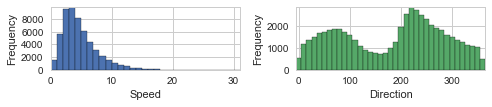

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

lat           lon             x             y         speed  \
count  55520.0  5.552000e+04  55520.000000  55520.000000  55520.000000   
mean      65.0  3.430000e+02     -0.230782     -0.592836      4.778637   
std        0.0  2.016254e-10      3.572082      4.264011      2.917276   
min       65.0  3.430000e+02    -20.849628    -23.541390      0.028523   
25%       65.0  3.430000e+02     -2.423727     -3.251630      2.723079   
50%       65.0  3.430000e+02     -0.188524     -0.847650      4.118928   
75%       65.0  3.430000e+02      2.016138      2.214674      6.163192   
max       65.0  3.430000e+02     23.970337     26.644073     30.070961   

                dir          date          HrMn  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  
mean     182.757230  1.997567e+07    900.000000    173.961790  
std      100.057787  1.096640e+05    670.826435     99.771442  
min        0.001702  1.979010e+07      0.000000      0.002976  
25%       87.226079  1.988070e+07    450.000000     85.345926  
50%      206.734111  1.997567e+07    900.000000    186.253211  
75%      261.271464  2.007070e+07   1350.000000    241.177701  
max      359.991463  2.016123e+07   1800.000000    359.996389

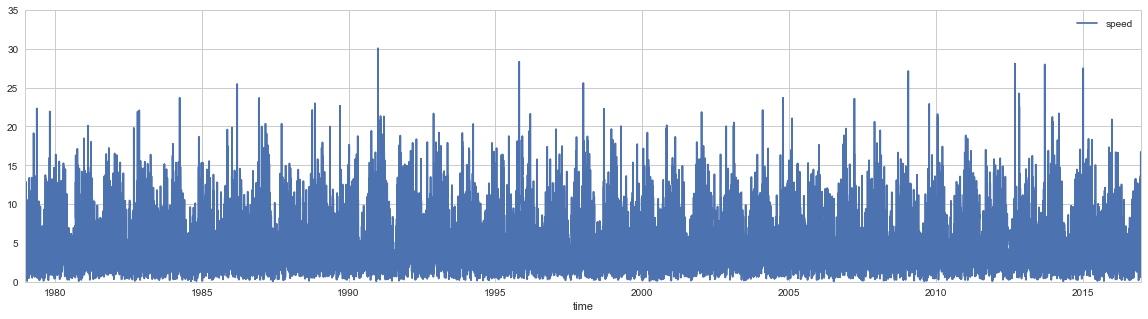

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

True


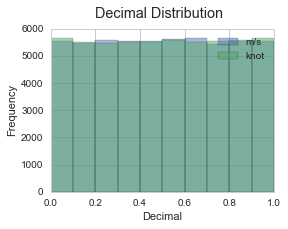

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    if 'knot_unit' not in globals():
        knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

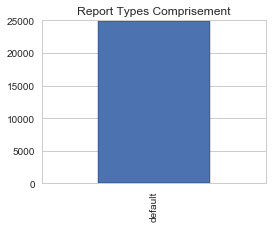

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

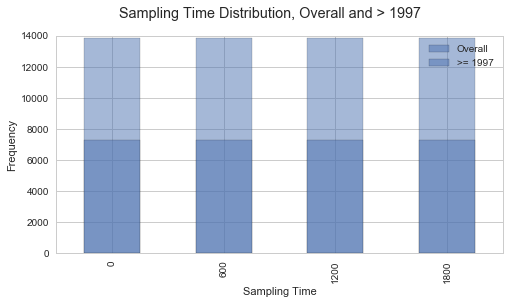

In [12]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


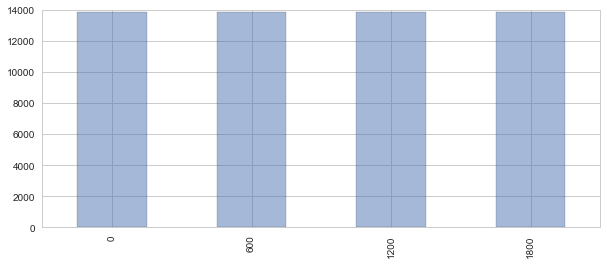

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df['2000':]['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat         lon          x          y      speed  \
time                                                                    
1991-01-02 18:00:00   65  343.000031  18.314285  23.850570  58.453288   
1995-10-24 18:00:00   65  343.000031  23.742188  15.478631  55.092817   
2012-09-10 06:00:00   65  343.000031  -8.936379  26.644073  54.627423   
2013-09-16 00:00:00   65  343.000031  -9.815932  26.209000  54.402113   
2015-01-07 00:00:00   65  343.000031  17.416245 -21.280487  53.453430   
2009-01-22 18:00:00   65  343.000031  19.867386  18.489014  52.755132   
2012-09-10 12:00:00   65  343.000031 -10.814438  24.731857  52.470020   
1997-12-30 12:00:00   65  343.000031  23.110580 -11.002760  49.754824   
1986-03-18 06:00:00   65  343.000031  23.970337  -8.614207  49.512049   
1995-10-25 18:00:00   65  343.000031   4.228579  24.705154  48.721362   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1991-01-02 18:00:00   52.480199  19910102  1800  default   default   
1995-10-24 18:00:00   33.102190  19951024  1800  default   default   
2012-09-10 06:00:00  108.541370  20120910   600  default   default   
2013-09-16 00:00:00  110.532193  20130916     0  default   default   
2015-01-07 00:00:00  309.297369  20150107     0  default   default   
2009-01-22 18:00:00   42.941910  20090122  1800  default   default   
2012-09-10 12:00:00  113.618197  20120910  1200  default   default   
1997-12-30 12:00:00  334.541259  19971230  1200  default   default   
1986-03-18 06:00:00  340.233113  19860318   600  default   default   
1995-10-25 18:00:00   80.287269  19951025  1800  default   default   

                     dir_windrose      incre  incre_reverse  
time                                                         
1991-01-02 18:00:00     37.519801  32.384675      15.999985  
1995-10-24 18:00:00     56.897810  22.795383      28.595756  
2012-09-10 06:00:00    341.458630  30.640124       2.157403  
2013-09-16 00:00:00    339.467807  17.903662      27.397684  
2015-01-07 00:00:00    140.702631  40.042780      29.211947  
2009-01-22 18:00:00     47.058090   6.475815      21.634660  
2012-09-10 12:00:00    336.381803  -2.157403       7.400105  
1997-12-30 12:00:00    115.458741  24.571942      22.325605  
1986-03-18 06:00:00    109.766887  20.879060      20.628067  
1995-10-25 18:00:00      9.712731   9.870557      32.036621

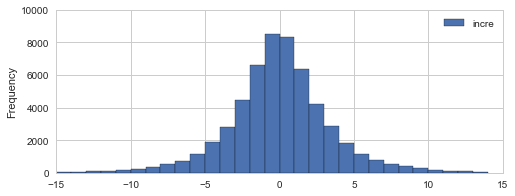

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 15


lat         lon          x          y      speed  \
time                                                                    
1991-01-02 18:00:00   65  343.000031  18.314285  23.850570  58.453288   
2012-09-10 06:00:00   65  343.000031  -8.936379  26.644073  54.627423   
2013-09-16 00:00:00   65  343.000031  -9.815932  26.209000  54.402113   
2009-01-22 18:00:00   65  343.000031  19.867386  18.489014  52.755132   
2012-09-10 12:00:00   65  343.000031 -10.814438  24.731857  52.470020   
1995-10-25 18:00:00   65  343.000031   4.228579  24.705154  48.721362   
2012-11-02 00:00:00   65  343.000031  -0.347980  24.245880  47.135086   
2009-01-22 12:00:00   65  343.000031  19.560272  13.572873  46.279317   
2004-10-18 18:00:00   65  343.000031   5.716962  23.000717  46.070219   
1984-04-02 00:00:00   65  343.000031   4.958695 -23.170446  46.059621   

                            dir      date  HrMn     type wind_type  \
time                                                                 
1991-01-02 18:00:00   52.480199  19910102  1800  default   default   
2012-09-10 06:00:00  108.541370  20120910   600  default   default   
2013-09-16 00:00:00  110.532193  20130916     0  default   default   
2009-01-22 18:00:00   42.941910  20090122  1800  default   default   
2012-09-10 12:00:00  113.618197  20120910  1200  default   default   
1995-10-25 18:00:00   80.287269  19951025  1800  default   default   
2012-11-02 00:00:00   90.822261  20121102     0  default   default   
2009-01-22 12:00:00   34.756781  20090122  1200  default   default   
2004-10-18 18:00:00   76.041661  20041018  1800  default   default   
1984-04-02 00:00:00  282.079625  19840402     0  default   default   

                     dir_windrose      incre  incre_reverse  
time                                                         
1991-01-02 18:00:00     37.519801  32.384675      15.999985  
2012-09-10 06:00:00    341.458630  30.640124       2.157403  
2013-09-16 00:00:00    339.467807  17.903662      27.397684  
2009-01-22 18:00:00     47.058090   6.475815      21.634660  
2012-09-10 12:00:00    336.381803  -2.157403       7.400105  
1995-10-25 18:00:00      9.712731   9.870557      32.036621  
2012-11-02 00:00:00    359.177739  24.529507       3.708093  
2009-01-22 12:00:00     55.243219  29.263350      -6.475815  
2004-10-18 18:00:00     13.958339   2.189017       6.774447  
1984-04-02 00:00:00    167.920375  12.147504      20.879665

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.001702      1
0.001944      1
0.019061      1
0.032245      1
0.037256      1
0.038840      1
0.049842      1
0.052882      1
0.068794      1
0.073793      1
0.074284      1
0.075643      1
0.086986      1
0.111855      1
0.115354      1
0.117910      1
0.127409      1
0.129620      1
0.131602      1
0.142822      1
0.150208      1
0.151014      1
0.163204      1
0.175587      1
0.181728      1
0.196112      1
0.202506      1
0.203111      1
0.203281      1
0.205811      1
             ..
359.732775    1
359.742086    1
359.743877    1
359.749181    1
359.754023    1
359.754383    1
359.771053    1
359.780491    1
359.785102    1
359.793778    1
359.797635    1
359.807354    1
359.813311    1
359.816142    1
359.818612    1
359.824299    1
359.838468    1
359.843062    1
359.849120    1
359.883348    1
359.890778    1
359.897522    1
359.916152    1
359.919041    1
359.920052    1
359.928583    1
359.942398    1
359.953246    1
359.979242    1
359.991463    1
Name: dir, dtype: int64

0 10


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0075308078503


Series([], Name: speed, dtype: int64)


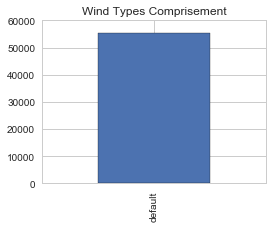

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

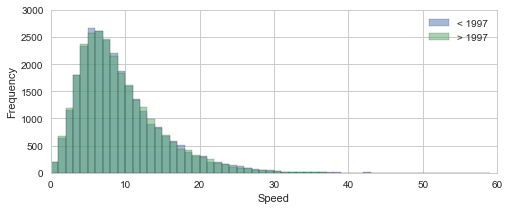

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df[:str(MID_YEAR)]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

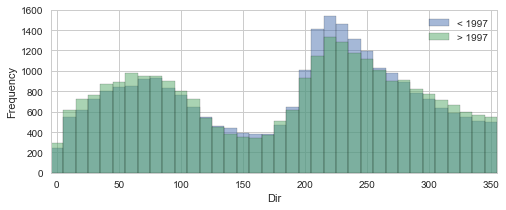

In [22]:
df[:str(MID_YEAR)]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, dir_windrose]
Index: []

1979 - 1980


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


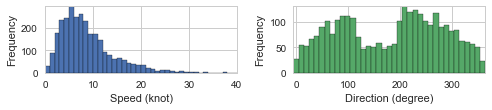

1981 - 1985


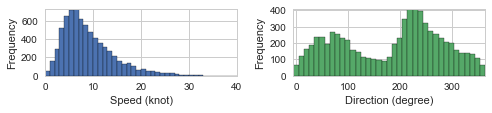

1986 - 1990


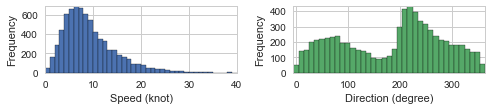

1991 - 1995


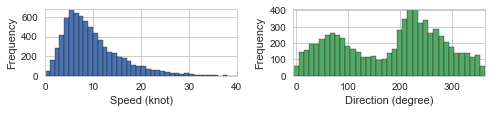

1996 - 2000


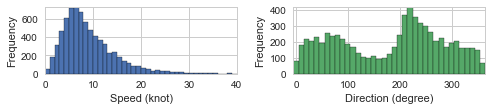

2001 - 2005


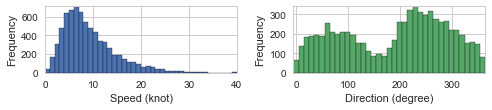

2006 - 2010


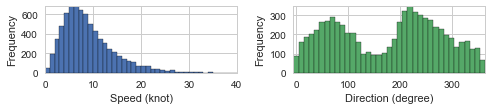

2011 - 2015


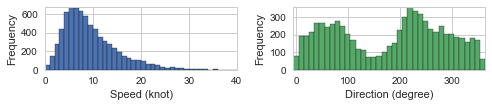

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 16.0)

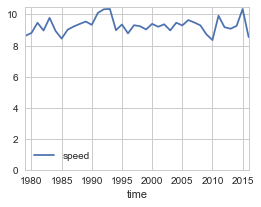

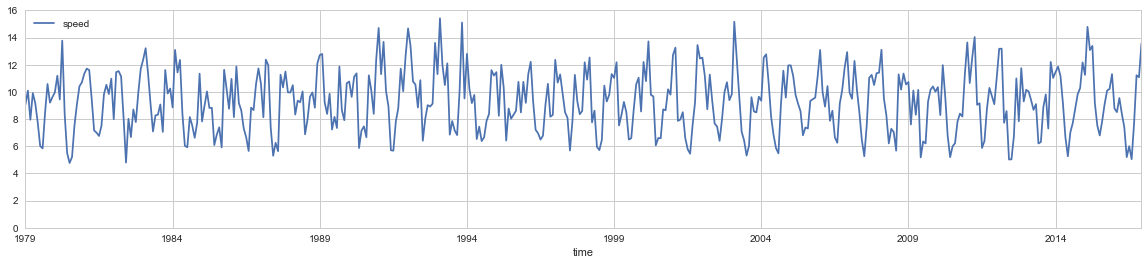

In [25]:
df.resample('A').mean().plot(y='speed', figsize=(4,3))
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
%%time
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEI5JREFUeJzt3XtsVNW+wPHvPOhM2+mb8hBKbUFERK1QKSTIPWIUEyJG
QSmS8gdoohERgQZE5VEaWoiPKCGERMghRbwmyD0BvWJEvAFEUZDmUEDh4IGWkZYy02nn1c6j+/7R
08lU6GvK7jz6+/y1mb3XzFohv6691/6ttTSKoigIIe4obbgrIEQsksASQgUSWEKoQAJLCBVIYAmh
AgksIVQggRWhFEXhpZdeYs+ePYHPbDYbK1eupKCggGnTpvHxxx/T2toaOO9wOFizZg1TpkxhypQp
rFq1ioaGhsB5r9dLSUkJBQUFFBQUsGXLFvx+f7+2a6CQwIpAfr+f9evXc+zYsQ6fv/766/z2229s
376dbdu28e233/Lee+8Fzm/YsIFLly6xa9cudu7cyaVLl3jnnXcC5z/44AOOHz/Ojh07+PDDDzlw
4AA7duzot3YNKIqIKNXV1UphYaHy2GOPKfn5+UpFRYWiKIpSVVWljB07Vjl37lzg2jNnzij333+/
4nQ6FUVRlIkTJyoHDx4MnD9w4ICSl5enKIqiNDc3Kw899JBy+PDhwPn9+/crU6dOVfx+f380bUCR
HivCnDlzhtzcXPbv309SUlLg8+rqaoxGI+PHjw98Nm7cOLxeL1VVVQCkpaVx8OBB7HY7DoeDL7/8
kgkTJgBw4cIF3G43kydPDpTPz8/HYrFQXV3dT60bOPThroDoaPbs2cyePfuWzzMzM2lubsZqtZKe
ng6A2WwGwGq1ArBx40aKi4t55JFHAMjKymLv3r0A1NXVER8f3yFYMzMzAaitreXuu+9WrU0DkfRY
UeLBBx8kOzubdevW0djYSENDA+Xl5ej1erxeLwB//PEHOTk57N69m927d5OUlERxcTGKouB2uzEY
DB2+My4uDgCPx9Pv7Yl10mNFibi4OLZu3cry5cspKCggPj6eJUuWcO7cOUwmE9XV1ZSWlnLo0CGy
s7MB2Lp1K48//jg///wzRqPxlgBq/3d8fHy/tyfWSWBFkXvvvZevvvoKi8WCyWTC7/ezZcsWsrKy
qKqqwmg0BoIKYMSIEaSlpVFTU8OYMWNwuVw4HA5MJhMA9fX1AAwdOjQs7YllcisYJRobG3nxxRcx
m81kZGRgMBj4/vvvyczMZPTo0QwdOhSXy8W1a9cCZW7evInNZmPUqFGMGzeO+Ph4Tp8+HTh/6tQp
Bg8ezKhRo8LRpJgmgRUlUlJSaGlpoaysjCtXrnDs2DFKSkpYsmQJGo2GvLw8JkyYQHFxMVVVVZw/
f57ly5czYcIE8vPzMRqNzJ07l5KSEk6fPs2PP/7I+++/z8KFC8PdtJikUZTImOgY/JdUtFm6dCmz
Zs1i5syZANy4cYOdO3dy8eJFkpOTmTVrFk8++WTg+sbGRvbs2cPZs2cBeOCBBygqKiI5ORloe6ba
vXs3P/30E4MGDWL69OkUFhai1crf1+5MmjSpV9dHVGD1tvIWi4VPT35BYrIJZ5ODBQVzyMjIUKmG
fRNK+6JFLLcNQmtf1A9eJCabSEpNDnc1hOhA7gGEUIEElhAqkMASQgUSWEKooNvAam1tZe3atcyb
N4+ioiKuXr16yzVut5vCwkIuX77c4zJCxLJuA+vw4cN4PB4+//xzVqxYQXl5eYfzZ8+eZcGCBdTU
1PS4jBCxrtvAOn36NI8++igAeXl5gbk/7TweD9u2bSM3N7fHZYSIdd2+xwpO2gTQ6XT4fD70+rai
t3tx1l2ZzvQ2+8Jms1HXUIvD5cDZ5KCypZLU1NRefUd/iuXsklhuWyi6DSyTyYTT6Qz8u7W1tdsA
CaUM9D5txGKxcOVCHUmpydgTmsi7L08yL8IgltsGof3R6PZWcOLEiRw9ehSAyspKxo4d2+2XhlJG
iFjSbTfyxBNP8MMPP1BYWIiiKGzatImDBw/icrmYN29ej8uoQVEUvB4vXo8Hj8eLw+HAaDSSkJCA
RqNR5TeF6IluA0ur1VJSUtLhs9GjR99yXUVFRZdl1OByuTDXNZLs1WK9cZNjtn+RmWln2sQcEhMT
Vf99IToT9S+IdXo9+kGD0OkHYTDEYzQmhLtKQkR/YAkRiaJ+2kg7pbUVe1Mjer2eq1ebA8P9I0aM
QKfThbl2YqCJmcByO91Uen/GV+vj24swZNhwHLZGls5cIGs6iH4XM4EFYDQl4GvxoTfoSclID3d1
xAAWdYHl9/sDK8CazWZaI2NlASE6iLrAMpvNfPzNp5hSU7h+tYaUzHQgMrMtxMAVlaOCptQUUjLS
SUyWtS5EZIrKwBIi0kXFrWBra2tgZ8KGhgZ6+lil0Jad0Z4QLKlOor9ERWA1NDQE1g80/7sGD4N6
VM7v83HqvJk6exzNzS5JdRL9JmpuBdvXD0wImufVEwZDPPEJCZLqJPpV1ASWENFEAksIFUTFM1ao
2vMHG21W3C43ra2Z4a6SGCBiOrDa8wf/NF7DbmskryGzwx68QqglpgML2vIHE1OS8Pm84a6KGEDk
GUsIFcR8j9VOXhaL/hQVgRW8aIzPH9otnbwsFv0pKgIreNGY2htNxCXGh/Q97S+LhVBb1DxjtS8a
o9X3LJ1JiHCKmsASIppIYAmhgoh9xgp1qkhPKIrSYW15GSEUd1rEBlaoU0U6E5ze1GC1YrNZSUvL
kBFCoYqIDSzoOFXE7Wjp03cFpzc13LzJlLv+S0YIhWoiOrDutPb0puZmd7irImJct4HV2trK+vXr
+f3334mLi6O0tJTs7OzA+SNHjrBt2zb0ej1z5szhhRdeAODZZ58NrEY7cuRIysrKVGpC70nWu1Bb
t4EVvJ9wZWUl5eXlbN++HQCv10tZWRn79u0jPj6e+fPnM2PGDJKSklAUpcMOJJFEst6F2roNrK72
E758+TKjRo0iJSUFaNuR8ZdffuGuu+7C7XazaNEifD4fy5cvJy8vT6UmhEay3oWa+rQHscPh6PCX
PjExMbD52+LFi3n++ee5cuUKL7/8MocOHerVHsTB+wvX37yB3Qt6q5Gmpkb0hkEYrNbbHvtavF2e
v+XYauXIkSNkZmaSmZmp6gYKsbxPbyy3LRR92oP4r+ecTidJSUnk5OSQnZ2NRqMhJyeH1NRU6uvr
GT58eJe/FbyPbfD+wl6nF62jhfT0dJzWRvQGfafH7Wu39+Ta9uOf7ZdJ8F5n6QPqbaAQy/v0xnLb
IAx7EI8ePZqrV69is9nweDycOnWKhx9+mH379lFeXg5AXV0dDoeDzMzIHSAwJSdjSk0JdzVEDOnz
HsSrV69m8eLFKIrCnDlzGDp0KHPnzuWtt95i/vz5aDQaNm3a1O1toBCxpM97EM+YMYMZM2Z0OB8X
F8f777/fp4rdiTlYvfo9ZCKkuHMithu5U3OwekomQoo7KWIDC/p/DpZMhBR3ikwbEUIFElhCqEAC
SwgVRPQzVrjIREjRVxJYt9Hc7Oanf9pISUmTEUIREgmsThiMMkIoQhdxgdW+1sWdXuciVHJbKEIR
cYHVvtaFzdLQ53UueiN48qOtwYpGq0WrQdbHECGJuMCCtrUuPC3ePq9z0RvBkx//vFKNPk7PEN9d
sj6GCElEBla4tE9+NCYmoDfoZX0METIJrF4Ift6SZy3RlYh7Qdye1d4fGe291TYMX8PxX/+Ny+UK
d3VEBIu4Hqs9q93eoH5Ge2+1trbS0tICStuxEJ2JuMCCtqz2SNlVJHi08Lq5hvOuf6LT6xlrTiQr
KwuQ20Jxq4gMrEjSYbTwRjWm9GTi4gwyd0t0SQKrB4JHC6GtF/O0ePB4mmlubsZutweuld5LgARW
SP66DrzdPpm

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFcFJREFUeJztnX1wU1X6xz9tQ5ukaVpeCusPKStF8QWQNwVnXNjFRVxQ
d2ZhbYGps7Puju6OosNupyAiLJQFnBVnZB2mOjrLFJyFQX6u+LIKwk8URKClyqsgakuLpW2apHlr
Xs/vj9hLE9KklDSv5zOTmdx7c3Kfc5PvPec+5znPyRBCCCQSSUzJjLcBEkk6IoUnkcQBKTyJJA5I
4UkkcUAKTyKJA1J4EkkckMJLMoQQ/OEPf2Dr1q3KPpPJxF//+lemTp3Kvffey8svv4zP51OOW61W
nn32WaZNm8a0adOoqKjAaDQqx91uN6tXr2bq1KlMnTqVF154Aa/XG9N6pRtSeEmE1+tl1apVfPrp
pwH7n3rqKc6ePcvmzZt55ZVX2LNnD//4xz+U43/72984f/48b7zxBq+//jrnz5/nueeeU45v3LiR
zz77jKqqKl566SXeeecdqqqqYlavtERIkoKGhgZRWloqfvGLX4gpU6aI6upqIYQQJ0+eFLfccos4
deqU8tnjx4+LO+64Q9hsNiGEEJMmTRK7d+9Wjr/zzjtiwoQJQgghOjs7xZ133in27t2rHN+1a5e4
5557hNfrjUXV0hLZ4iUJx48fZ9SoUezatYu8vDxlf0NDA2q1mttvv13Zd+utt+J2uzl58iQAAwcO
ZPfu3VgsFqxWK++++y5jx44F4MyZMzgcDu6++26l/JQpUzAYDDQ0NMSodumHKt4GSHrHww8/zMMP
P3zV/sLCQjo7O2lvb2fQoEEANDU1AdDe3g7AmjVrKC8v56677gJgxIgRvPnmmwBcvnwZjUYTIObC
wkIAmpub+elPf9pvdUpnZIuX5IwfP56RI0eycuVKzGYzRqOR9evXo1KpcLvdAHz77bfcdNNNbNmy
hS1btpCXl0d5eTlCCBwOBzk5OQHfmZ2dDYDL5Yp5fdIF2eIlOdnZ2WzatIklS5YwdepUNBoNTz75
JKdOnUKn09HQ0EBlZSX//e9/GTlyJACbNm3ivvvu48iRI6jV6qsE1rWt0WhiXp90QQovBRgzZgzv
vfceBoMBnU6H1+vlhRdeYMSIEZw8eRK1Wq2IDmD48OEMHDiQixcvMnr0aOx2O1arFZ1OB0BraysA
w4YNi0t90gHZ1UxyzGYzCxcupKmpicGDB5OTk8P+/fspLCykuLiYYcOGYbfbaWxsVMq0tbVhMpko
Kiri1ltvRaPRUFNToxw/duwYQ4YMoaioKB5VSgsiCs/n8/H8889TUlJCWVkZ9fX1Acf37dvHvHnz
KCkpYceOHWHLGAwG/vSnP7Fo0SJKS0ul1ywK5Ofn43Q6WbduHd9//z2ffvopq1ev5sknnyQjI4MJ
EyYwduxYysvLOXnyJKdPn2bJkiWMHTuWKVOmoFarmT9/PqtXr6ampobPP/+cF198kUcffTTeVUtp
MoQIPxH2o48+Yt++faxfv566ujqqqqrYvHkz4I94mDNnDjt37kSj0bBgwQKqqqqora0NWWbp0qVM
nz6dOXPmcPjwYTo7O/n5z3/e47m734UlV1i8eDFz585l9uzZALS0tPD6669z7tw59Ho9c+fO5f77
71c+bzab2bp1KydOnABg3LhxlJWVodfrAf8z3ZYtWzh8+DADBgxg+vTplJaWkpkpO0SRmDx5cp/K
RXzGq6mp4Wc/+xkAEyZMUMaGAC5cuEBRURH5+fmKEUePHqWuri5kmdraWsaMGcPvfvc7hg8fzvLl
yyMa2NeKxZKampqY2nnw4MGr9v3qV78KW2bmzJlh7bznnnuiYls0iPX17CvX0zBEFF73h26ArKws
PB4PKpUKq9UaMP6Tm5uL1WrtsUxTUxN6vZ5//etf/POf/+S1117j6aefDnv+ZGn1pJ3RJVns7CsR
hafT6bDZbMq2z+dDpVKFPGaz2cjLy+uxTEFBATNnzgT8d+CXXnopooHJcueTdkaPZLKzr0TsxE+a
NIkDBw4AUFdXxy233KIcKy4upr6+HpPJhMvl4tixY0ycOLHHMpMnT+aTTz4B4OjRo4wePbrPhksk
yUzEFm/WrFkcPHiQ0tJShBD8/e9/Z/fu3djtdkpKSli6dCmPPfYYQgjmzZvHsGHDQpYBqKio4Lnn
nuPf//43Op2OF198sd8rKJEkIhG9mvEkmboc0s7okQ52Sn+xRBIHpPAkkjgghSeRxAEpPIkkDkjh
SSRxQApPIokDcj6eREEIgd1uD9in1WrJyMiIk0WpixRemhJKZDabjdqzLWg0WgA6O+3cO+kmcnNz
42FiSiOFl6bY7XY+q/0OtVqr7DMZ21BrdWi02jAlJdFACi+NUau1ASJzOKTgYoV0rkgkcUC2eBIF
n8+HzdJB5o++FIfdgc9XGF+jUhQpPImC1dLBkcufUeAaDIDFZGaCsTBgsrMkOkjhSQLQ6HLJzfcL
ze1xY7fbAyY1y+GF6CCFJ+kRj8vF/i9OM/yiX3hOp4MHZtyptIA+ny9guS/wr9MgkyRFRgovTfD5
fJhMJgwGA+Afs+u+hl4oHDYHZ9wnMFj9ZTpMJsY1DWHEiBGAP13j2yc+UFpIW4eVRVPnMXjw4H6s
SWoghZcmGI1G9jd8zvc5lwEwGYzcrJ1GbrekVKFQ67SKsDo7HRw73cRli39thZbLl8jWqskr0Pev
8SmIFF4aoc3TKiJxdjrpMJvQaK+sj2DpMCMywyckyMnRKGN/OTlybYW+IoWXptgtds61fs6QzCvr
I1xqaUA3SLZesSCmKdy72L17NyUlJVGshqQvaHL93ciulzq3/yNXfD4fBoMh4BXpWTMVidji7d27
F5fLxfbt26mrq2P9+vUBKdzXrVsXkMJ95syZ1NbW9ljm9OnT7Ny5kwTOsSTpR4xGI9u+eItcvf/Z
Ml0dMhFbvN6mcM/OzlZSuPdUxmg0snHjRp599tn+qIskDEII3B4PbpcLt8uFx+uOmy25eh15BXry
CvSKANONmKVwd7lcLF++nGXLll21Amk4kiWVd6Lb2dzcTJupk87zFwG4XN9ItkaDSqNWPtPRYUaV
M4CcH5dwDt42m000GOtxe/xdw9aWZtrUTVg7/eN8FlMHn7R8oqylAaDX6wPG9UwmE5eNzVjtVsDf
4tU56ygoKAiwN9Gv5/USsxTuZ8+epb6+nlWrVuF0Ovnmm29Yu3ZtxIVLUj2/YqxoaGhgzw9fMrTQ
70xxmu2oclTKuukAtnZzwL7gbZ/TxcDMAgqH+LcdVjM/+HIQWf6br9Vq5kzWd/wk5wbAL8S5RfcF
nKO9vZ3vspvRD/SL06LtYMJtEwK6mslwPaGfFy2ZNGkS+/fvZ86cOWFTuGu1Wo4dO8Zjjz1GRkbG
VWXGjx/Pe++9B0BjYyNLlizp1WpBksTBYXNQ5z7CJbV/kcsuL6hqwAAAslRZaPNylSELq9nC/371
AYOHDVG+o6WxGf3gfCD/qu9PJ2Kawj3ehApxAhnmdC10H1DvjRc0V58bMMBuNVv6zbZkIqLwMjMz
Wb16dcC+4uJi5f3MmTOVFYDClenOjTfeqAw9xJJgjxqkr1dNEl/SbgC9y6PWW2QgcO8RgNvt95wC
uF0esrLT7i/WK+RViUBwK2kxdTB3TKDDIB0HgEPh9XhpNljIUPsda82tHdyYkxVnqxITKbwggrNv
2Ww2csM4DGwdVu7IKQ75XemIKksV4GyRhCalhRfcTTQYDLicLqUrBOB2uQOiaIKzb11ubsKe40Cd
q/nx8x60QQ4DnP1ckSQluOsJsvvZRUpfgeBuYtN3F7H6Mij0XLkTm9tNtLW1odH4hWWz2QIi8CGD
Sy0ddAr/oL/

Wall time: 28.4 s


In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUgAAADECAYAAAD9EbgkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGBxJREFUeJzt3W9MVGfe//H3AA7iMJTSpE9+hAask9gQUoGwaVyp/tKU
PtiutrGTDg0+sDXCNu3CpuxoK9JGU2V/K5vSxK3uuk+GAktq03vTzaZ/rJHWP2Rz7toGImt2fi6J
tbKIbndmFLBw7gfezHbEI4Mwzhz4vBKTzjXXwe81Nh+uc851rnGYpmkiIiLTpCW7ABGRVKWAFBGx
oIAUEbGggBQRsaCAFBGxoIAUEbGQEU+nAwcO8Nlnn3H9+nV8Ph8VFRVs27YNh8PBihUraG5uJi0t
je7ubrq6usjIyKCuro5169YxOjpKY2MjIyMjuFwuWlpayMvLS/S4RETmbMYZZG9vL19++SWdnZ0E
AgEuXrzInj17qK+vp6OjA9M0OXLkCMPDwwQCAbq6ujh06BCtra2Mj4/T2dmJx+Oho6ODDRs2sH//
/rsxLhGROZsxIL/44gs8Hg8vvvgitbW1rF27lv7+fioqKgCorKzkxIkTfP3116xatQqn04nb7aag
oICBgQEMw2DNmjXRvidPnkzsiERE5smMp9hXrlzhwoULvPPOO5w/f566ujpM08ThcADgcrkIhUKE
w2Hcbnf0OJfLRTgcjmmf6jsTwzDudDwiIrdVVlYWd98ZAzI3N5eioiKcTidFRUVkZmZy8eLF6PuR
SIScnByys7OJRCIx7W63O6Z9qu98DyJVGIZhy7rBvrXbtW6wb+12rRtmP/ma8RS7rKyMzz//HNM0
GRoa4tq1azzyyCP09vYC0NPTQ3l5OSUlJRiGwdjYGKFQiGAwiMfjobS0lGPHjkX72vWDFZHFZ8YZ
5Lp16/jrX//Kxo0bMU2TnTt3kp+fT1NTE62trRQVFVFVVUV6ejo1NTVUV1djmiYNDQ1kZmbi8/nw
+/34fD6WLFnCvn377sa4RETmLK5lPr/85S+ntbW3t09r83q9eL3emLasrCza2trusDwRkeTRQnER
EQsKSBERCwpIERELCkgREQsKSBERCwpIERELCkgREQsKSBERCwpIERELCkgREQsKSBERCwpIEREL
CkgREQsKSBERC3Ftd7ZQTExMEAwGp7UvX76c9PT0JFQkIqlsUQVkMBikZnsHy+65P9oW+ddFdm1d
TWFhYbRNgSkisMgCEmDZPfeTfe//ib6++t0QOw+eZNk9wf99/U8Ce6rxeDzJKlFEUsSiC8hbuTk0
RURAN2lERCzFNYN86qmnyM7OBiA/P5/a2lq2bduGw+FgxYoVNDc3k5aWRnd3N11dXWRkZFBXV8e6
desYHR2lsbGRkZERXC4XLS0t5OXlJXRQIiLzYcaAHBsbwzRNAoFAtK22tpb6+np+9KMfsXPnTo4c
OcLDDz9MIBDg8OHDjI2NUV1dzerVq+ns7MTj8fDSSy/x5z//mf3797Njx46EDkpEZD7MeIo9MDDA
tWvX2Lx5M5s2beL06dP09/dTUVEBQGVlJSdOnODrr79m1apVOJ1O3G43BQUFDAwMYBgGa9asifY9
efJkYkckIjJPZpxBLl26lOeff55nnnmGf/zjH2zZsgXTNHE4HAC4XC5CoRDhcBi32x09zuVyEQ6H
Y9qn+sbDMIw7Gc9tDQ4OxtWvr68v7jpvloi67xa71m7XusG+tdu17tmaMSALCwt54IEHcDgcFBYW
kpubS39/f/T9SCRCTk4O2dnZRCKRmHa32x3TPtU3HmVlZbMdy4zcbjd8eHHGfsXFxXe0zMcwjITU
fTfYtXa71g32rd2udcPsg33GU+z33nuPvXv3AjA0NEQ4HGb16tX09vYC0NPTQ3l5OSUlJRiGwdjY
GKFQiGAwiMfjobS0lGPHjkX7pvoHa05Ocu7cOc6ePRvzZ2JiItmlichdNuMMcuPGjWzfvh2fz4fD
4eDNN9/k3nvvpampidbWVoqKiqiqqiI9PZ2amhqqq6sxTZOGhgYyMzPx+Xz4/X58Ph9Llixh3759
d2Ncd+xaaJidBy9FF46DFo+LLFYzBqTT6bxlqLW3t09r83q9eL3emLasrCza2trmUOLdp4XjIgJa
KC4iYkkBKSJiYcE+i32rrc3OnTuXpGpExI4WbEDeamuzkfNnuC9/ZRKrEhE7WbABCbfe2kxEJF66
BikiYkEBKSJiQQEpImJBASkiYkEBKSJiQQEpImJhQS/zmS9TO/zcTF8PK7KwKSDjoB1+RBYnBWSc
tMOPyOKja5AiIhYUkCIiFhSQIiIWFJAiIhYUkCIiFhSQIiIW4grIkZERHn30UYLBIIODg/h8Pqqr
q2lubmZychKA7u5unn76abxeL0ePHgVgdHSUl156ierqarZs2cLly5cTNxIRkXk2Y0Bev36dnTt3
snTpUgD27NlDfX09HR0dmKbJkSNHGB4eJhAI0NXVxaFDh2htbWV8fJzOzk48Hg8dHR1s2LCB/fv3
J3xAIiLzZcaF4i0tLTz77LMcPHgQgP7+fioqKgCorKzk+PHjpKWlsWrVKpxOJ06nk4KCAgYGBjAM
gxdeeCHadzYBaRjGnYwnanBwcE7Hx6Ovr49QKBTTNte6k8mutdu1brBv7Xate7ZuG5Dvv/8+eXl5
rFmzJhqQpmnicDgAcLlchEIhwuEwbrc7epzL5SIcDse0T/WNV1lZ2awH80Nutxs+vDinnzGT4uLi
mEcNDcOYc93JYtfa7Vo32Ld2u9YNsw/22wbk4cOHcTgcnDx5kjNnzuD3+2OuI0YiEXJycsjOziYS
icS0u93umPapviIidnHba5Dvvvsu7e3tBAIBVq5cSUtLC5WVlfT29gLQ09NDeXk5JSUlGIbB2NgY
oVCIYDCIx+OhtLSUY8eORfva9beOiCxOs96swu/309TURGtrK0VFRVRVVZGenk5NTQ3V1dWYpklD
QwOZmZn4fD78fj8+n48lS5awb9++RIxBRCQh4g7IQCAQ/e/29vZp73u9Xrxeb0xbVlYWbW1tcyhP
RCR5tFBcRMSC9oO8Q7faZXxiYiJJ1YhIIigg79DNu4xf/e6f+J8ria4RFRH7U0DOgXYZF1nYFkxA
TkxMEAz+5ztjbvUlWyIis7FgAjIYDFKzvYNl99wPwMj5M9yXvzLJVYmInS2YgITYU96r3w0luRoR
sTst8xERsaCAFBGxoIAUEbGggBQRsaCAFBGxoIAUEbGggBQRsaCAFBGxsKAWiieTOTnJhQsXOHv2
bEz78uXLSU9PT1JVIjIXCsh5ci00TOCog8P//Wm07ep3/ySwpzrmi71ExD4UkPNIu/uILCy6Biki
YmHGGeTExAQ7duzg3LlzOBwO3njjDTIzM9m2bRsOh4MVK1bQ3NxMWloa3d3ddHV1kZGRQV1dHevW
rWN0dJTGxkZGRkZwuVy0tLSQl5d3N8YmIjInM84gjx49CkBXVxf19fX85je/Yc+ePdTX19PR0YFp
mhw5coTh4WECgQBdXV0cOnSI1tZWxsfH6ezsxOPx0NHRwYYNG9i/f3/CByUiMh9mnEE+9thjrF27
FoALFy6Qk5PDiRMnol8tUFlZyfHjx0lLS2PVqlU4nU6cTicFBQUMDAxgGAYvvPBCtG+8AWkYxqwG
Mjg4OKv+d0tfXx+hUCjZZcRltp95qrBr3WDf2u1a92zFdZMmIyMDv9/PJ598QltbG8ePH8fhcADg
crkIhUKEw2Hcbnf0GJfLRTgcjmmf6huPsrKyWQ3E7XbDhxdndczdUFxcbIu72IZhzPozTwV2rRvs
W7td64bZB3vcN2laWlr46KOPaGpqYmxsLNoeiUTIyckhOzubSCQS0+52u2Pap/qKiNjBjAH5wQcf
cODAAQCysrJ

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGFVJREFUeJzt3X1MFHf+B/D3LstS3F20nGlifhwK1k2rZCMPsblwR0tS
xZh62otubtdgUqBBrqcHPXERwYcs0SMV7g4jfTrvn7Ww3cilMTWXWkkPErT8MXeVgOXMbTgSH84i
fXBnK4vC/P4w7B1l3R3WfZiF9ysx0e/MOp/5srx3dma+31FJkiSBiIiCUse7ACKiRMCwJCKSgWFJ
RCQDw5KISAaGJRGRDAxLIiIZNKFWmJqaQkNDA0ZGRqBSqXDs2DGkpKSgrq4OKpUKa9aswZEjR6BW
q+FyueB0OqHRaFBVVYXi4mJMTEygtrYW4+Pj0Ol0aG5uRnp6eiz2jYgoYkIeWX722WcAAKfTierq
avz+97/HiRMnUF1djY6ODkiShO7uboyNjcHhcMDpdOLMmTNobW3F5OQkOjs7YTQa0dHRge3bt6O9
vT3qO0VEFGkhjyxffvllvPTSSwCAW7duIS0tDZcvX8aGDRsAAEVFRejr64NarUZubi60Wi20Wi0y
MzMxPDwMQRBQUVHhX5dhSUSJKGRYAoBGo4HNZsOnn36KtrY29PX1QaVSAQB0Oh08Hg9EUYTBYPC/
RqfTQRTFWe0z64YiCEI4+0JEFFJ+fn5Yr5MVlgDQ3NyM/fv3w2w2w+fz+du9Xi/S0tKg1+vh9Xpn
tRsMhlntM+vKEe4ORZogCIqoRSl1AKzlcVhLYEqrJVwhz1l+9NFHePfddwEAqampUKlUyMnJQX9/
PwCgt7cXBQUFMJlMEAQBPp8PHo8HbrcbRqMReXl56Onp8a+rlE4jIpqPkEeWmzZtwsGDB7Fr1y48
fPgQ9fX1WL16NRobG9Ha2ors7GyUlJQgKSkJpaWlsFqtkCQJNTU1SElJgcVigc1mg8ViQXJyMlpa
WmKxX0REERUyLJcsWYI//vGPc9rPnj07p81sNsNsNs9qS01NRVtb2xOUSEQUf7wpnYhIBoYlEZEM
sq+GEy0UU1NTcLvdj12+evVqJCUlxbAiSgQMS1p03G43Sg92YMnSZ+Ys+/67r+A4YYXRaIxDZaRk
DEtakIIdPY6MjGDJ0megf/r/YlwVJTKGJS1IwY4ex298iR9lPB+HqiiRMSxpwXrc0eP3392JQzWU
6Hg1nIhIBoYlEZEMDEsiIhkYlkREMjAsiYhkYFgSEcnAsCQikoFhSUQkA8OSiEgGhiURkQwMSyIi
GRiWREQyBJ1I48GDB6ivr8fNmzcxOTmJqqoqrFixApWVlVi1ahUAwGKxYMuWLXC5XHA6ndBoNKiq
qkJxcTEmJiZQW1uL8fFx6HQ6NDc3Iz09PRb7RRQWaXoaIyMjj13OiYEXr6Bhef78eSxbtgxvvfUW
vv32W2zfvh1vvPEGXnvtNZSVlfnXGxsbg8PhQFdXF3w+H6xWKwoLC9HZ2Qmj0Yi9e/fiwoULaG9v
R0NDQ9R3iihc9z1jOPzeXSxZOncuTE4MvLgFDcvNmzejpKQEACBJEpKSkjA4OIiRkRF0d3dj5cqV
qK+vx8DAAHJzc6HVaqHVapGZmYnh4WEIgoCKigoAQFFREdrb26O/R0RPiBMDUyBBw1Kn0wEARFHE
vn37UF1djcnJSezcuRM5OTl4++23cfr0aTz33HMwGAyzXieKIkRR9LfrdDp4PB7ZhQmCEM7+RIVS
alFKHYDyaxkdHY3KtgYHB4O+j5XeL/GipFrCFXLy39u3b+ONN96A1WrF1q1bce/ePaSlpQEANm7c
CLvdjoKCAni9Xv9rvF4vDAYD9Hq9v93r9fpfJ0d+fv589yUqBEFQRC1KqQNIjFoMBgPw8X8ivr2c
nJzHfg1PhH6JB6XVEq6gYXn37l2UlZXh8OHD+MlPfgIAKC8vR2NjI0wmE65cuYJ169bBZDLhD3/4
A3w+HyYnJ+F2u2E0GpGXl4eenh6YTCb09vYqpsOIwhHq4s/U1FQMq6FYCxqW77zzDu7du4f29nb/
+ca6ujocP34cycnJWL58Oex2O/R6PUpLS2G1WiFJEmpqapCSkgKLxQKbzQaLxYLk5GS0tLTEZKeI
oiHUxR/bLhM2bNgQh8ooFoKGZUNDQ8Cr106nc06b2WyG2Wye1Zaamoq2trYnLJFIOXjxZ/HiTelE
RDIwLImIZGBYEhHJwLAkIpKBYUlEJAPDkohIBoYlEZEMDEsiIhkYlkREMoScSINIqaampjA6Ojpr
xqsZwcZwE4WDYUkJy+12o/mDASxZOnd2ofEbX+JHGc/HoSpaqBiWlNAeN1b7++/uxLQOaXoat27d
wvXr1wMu5+MoEh/DkigC7nvG4PhMha6/X5qzjI+jWBgYlkQRwhmJFjZeDScikoFhSUQkA8OSiEgG
hiURkQwMSyIiGRiWREQyBL116MGDB6ivr8fNmzcxOTmJqqoqPPvss6irq4NKpcKaNWtw5MgRqNVq
uFwuOJ1OaDQaVFVVobi4GBMTE6itrcX4+Dh0Oh2am5uRnp4eq30jIoqYoEeW58+fx7Jly9DR0YE/
/elPsNvtOHHiBKqrq9HR0QFJktDd3Y2xsTE4HA44nU6cOXMGra2tmJycRGdnJ4xGIzo6OrB9+3b/
43SJiBJN0CPLzZs3o6SkBAAgSRKSkpIwNDTkfzZyUVER+vr6oFarkZubC61WC61Wi8zMTAwPD0MQ
BFRUVPjXnU9YCoIQ7j5FnFJqUUodgDJqGR0djXcJskjT07h48SIGBwcDLs/IyIjKUEgl/IxmKKmW
cAUNS51OBwAQRRH79u1DdXU1mpuboVKp/Ms9Hg9EUZw184tOp4MoirPaZ9aVKz8/f947Ew2CICii
FqXUASinFoPBAHw8dxINpZkZCrlk6dwvco+GQuZEfCikUn5GgPJqCVfICzy3b9/G7t27sW3bNmzd
uhVq9X9f4vV6kZaWBr1eD6/XO6vdYDDMap9Zl2gxmhkK+cM/S5Y+E+/SSKagYXn37l2UlZWhtrYW
O3bsAACsXbsW/f39AIDe3l4UFBTAZDJBEAT4fD54PB643W4YjUbk5eWhp6fHv65SPl2IiOYr6Nfw
d955B/fu3UN7e7v/fOOhQ4fQ1NSE1tZWZGdno6SkBElJSSgtLYXVaoUkSaipqUFKSgosFgtsNhss
FguSk5PR0tISk50iIoq0oGHZ0NCAhoaGOe1nz56d02Y2m2E2m2e1paamoq2t7QlLTDxTU1Nwu92P
Xc65DYkSD6doiwK3243Sgx0Bz0dxbkOixMSwjBLObUi0sDAsY0yann7sw7T49ZxIuRiWQQR7eiAQ
Xrjd94zh8Ht3sWTp7HOa/Hq+OAX78AT4AaokDMsggj090Pvtf2CvLERWVtacZaEew8qv6DTjcR+e
AD9AlYZhGUKwpwcefu9KwDc5H8NK88EPz8TAsHwCSnkMKxFFH+ezJCKSgWFJRCTDov8aHmy0TagL
NUTRxCvlyrLowzLYaJtYXqgJ9YsxNTUVkzpIOXilXFkWfVgCyrhQE+oXw7bL5J90mRYPXilXDoal
gvAXg0i5GJakaDynTErBsCRFU8o5ZaJFEZY8OklsSjinTLQowpJHJ0T0pBZFWAI8OiGiJ7NowpJo
IeF9ubEnKyyvXr2KkydPwuFw4Nq1a6isrMSqVasAABaLBVu2bIHL5YLT6YRGo0FVVRWKi4sxMTGB
2tpajI+PQ6fTobm5Genp6dHcH6JFgfflxl7IsHz//fdx/vx5pKamAgCGhobw2muvoayszL/O2NgY
HA4Hurq64PP5YLVaUVhYiM7OThiNRuzduxcXLlxAe3t7wAegEdH88b7c2AoZlpmZmTh16hQOHDgA
ABgcHMTIyAi

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
if 'ECMWF' in file_path:
    df = df_all_years['2006':'2015']
else:
    df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: default
Sampling time used: [0]


lat           lon             x             y         speed  \
count  14604.0  1.460400e+04  14604.000000  14604.000000  14604.000000   
mean      65.0  3.430000e+02     -0.145603     -0.743417      9.329787   
std        0.0  4.388462e-11      6.994979      8.345507      5.665707   
min       65.0  3.430000e+02    -29.736288    -45.760813      0.055445   
25%       65.0  3.430000e+02     -4.458103     -6.028264      5.336187   
50%       65.0  3.430000e+02      0.117798     -1.102233      8.087832   
75%       65.0  3.430000e+02      4.244643      4.754201     12.061309   
max       65.0  3.430000e+02     44.501046     51.791948     54.627423   

                dir          date          HrMn  dir_windrose  
count  14604.000000  1.460400e+04  14604.000000  14604.000000  
mean     178.193420  2.010566e+07    900.164339    168.322603  
std      102.419825  2.871807e+04    670.806592    101.609916  
min        0.019061  2.006010e+07      0.000000      0.046123  
25%       79.653969  2.008070e+07    600.000000     73.817527  
50%      200.988842  2.010123e+07   1200.000000    177.725571  
75%      260.183129  2.013070e+07   1800.000000    239.220523  
max      359.953246  2.015123e+07   1800.000000    359.995452

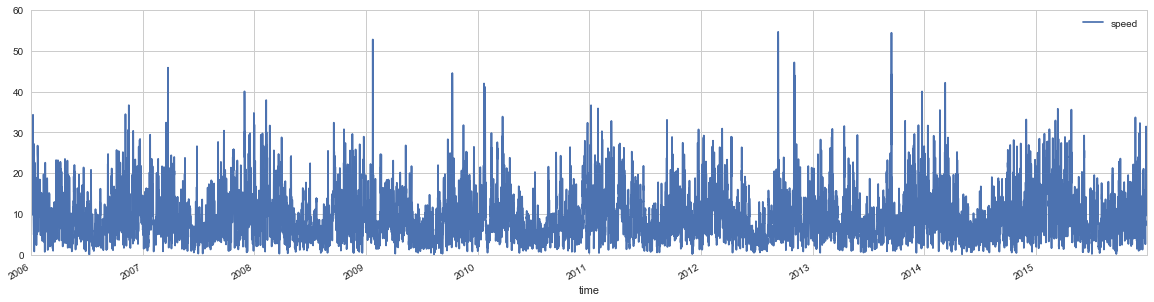

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

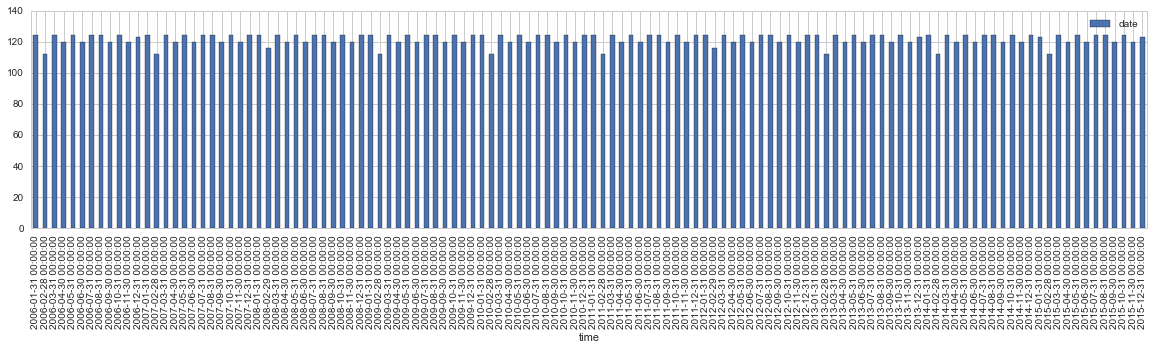

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


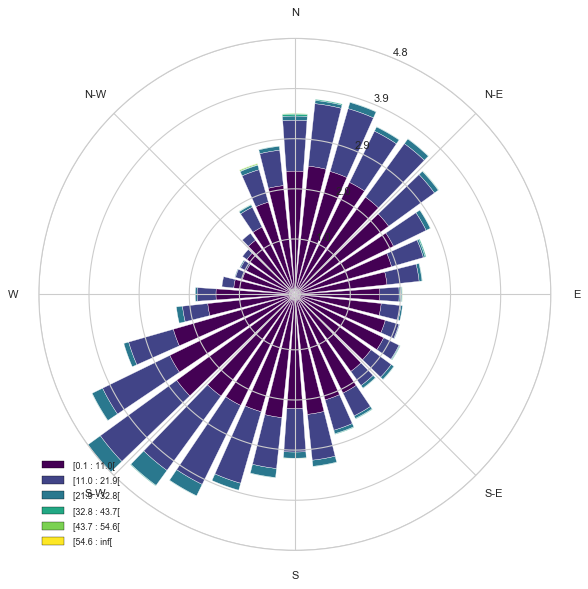

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtYlHX+//HnHESB4SQqaooHlDx04GCaeQwz22+lJSqo
i7XZmtVWmrWSpZW5pquVHdSs7GdLuqKUm66tB9ZWjdRgEstDlmiI4ImTOjPogHP//mCZBQ8IOjP3
zPB+XJfXNffcc8/9BvU1n/uez0GjKIqCEEI4mVbtAoQQDYOEjRDCJSRshBAuIWEjhHAJCRshhEtI
2AghXMJpYWOz2ZgxYwYJCQkkJSWRm5t72WvKyspITEwkJyenzscIITyT08ImPT0dq9VKamoqU6ZM
Yc6cOTX2//TTT4wdO5a8vLw6HyOE8FxOCxuj0Ui/fv0AiIqKYu/evTX2W61WFi5cSMeOHet8jBDC
c+md9cYmkwmDwWDf1ul0VFRUoNdXnjI2Nrbex1yJ0Wh0YNVCiPq40v/jq3Fa2BgMBsxms33bZrPV
GhrXewzU7wd2BaPRKDXVgTvWBO5Zl7vWVB9Ou4yKiYlh27ZtAGRnZxMZGemUY4QQnsFpLZvBgweT
kZFBYmIiiqIwe/Zs1q1bh8ViISEhoc7HCCG8g9PCRqvVMnPmzBrPRUREXPa6lJSUWo8RQngH6dQn
hHAJCRshhEtI2AghXELCRgjhEhI2QgiXkLChsvNgUVFRjT82m03tskQD9cgjj/Djjz8ClcN6YmNj
WbdunX1/UlISBw4cuOy4bdu2kZqayrFjxxg1alSdz9enTx/7+1YNinYGp3317UlKSkr4bG0W/oZA
AM6dLWVY/040bdrU/pqQkBC0WsnmhubFF19k9erVDn3PkSNHMm/evKvu79OnD1lZWdx2220YjUb6
9u3Lnj17ALhw4QL5+fl06dLlsuP69+8PwLFjxxxar6PI/57/8jcEEhAYQkBgCBqNhtWb95O25RfS
tvzCZ2uzKCkpUbtE0UDcddddZGVlAbB161ZGjhyJ2Wzm3Llz7N69m549e5KZmcno0aP5/e9/z0sv
vUR5eTlffvkl8+fPB6C4uJiJEycycuRIFi5cCEBycrK9h/62bdtITk526c8lLZur8DMEEBAYonYZ
QmXz5s2rtRXiDN26dePw4cMoikJmZibPP/88t9xyC9999x0HDx6kb9++TJ8+nRUrVhAaGsqCBQtY
s2ZNjXGEFouFefPm4efnx9ixYxk0aJBLf4YrkZaNEG5Gq9XSpUsXtm3bRvPmzfHx8SEqKooffvgB
o9FI7969OXXqFJMmTSIpKYmMjAzy8/NrvEeXLl0ICAhAp9Nx6623cuTIkRr71VguTsJGCDfUp08f
lixZYp/f6eabb2b//v3YbDZCQkJo2bIlixYtIiUlhYkTJ3LnnXfWOD4nJwez2UxFRQU//vgjnTt3
xsfHh9OnTwOwf/9+l/9MEjZCuKG77roLo9HIgAEDANDr9QQEBNCzZ0+0Wi0vv/wyEyZMIDExkRUr
Vlw2Q0JQUBCTJ08mMTGRIUOG0KlTJ0aOHMmyZct49NFHOXnypMt/JrlnI4Qbuummmzh48GCN5xYt
WmR/3LdvX/r27Vtj//Dhw+2P165de9l73nrrrTW+Qq+SkZEB1BwU7QzSshFCuISEjRDCJeQyqg5s
NhvFxcU1npNOfkLUj4RNHVjM51i9uZDQ5i0AMJvO8sjQHoSGhqpcmRCeQ8KmjqSTX8Nks9kc3nu8
obaKJWyEqMWl4+ZuVENuFTfYsKn+iVVcXIwKHSqFh6gaN+dKu3btYtKkSXTq1AlFUSgtLeWpp57i
//7v/674+oKCAn7++Wfi4uJcWmd9NNiwqf6JderEMQKCQgkMkssk4T7uvPNO3nnnHaCyL8xbb71F
hw4d6Nq162Wv3blzJ4cPH5awcVdVn1imc2fULkWIWjVp0oSEhAS+/vprPv/8c06cOMGpU6eIi4vj
2Wef5aOPPuL8+fNER0cTEBDABx98gKIomM1me0ipreHdpRLCQ4WGhrJ//36ioqJYunQpaWlprFy5
Ep1Ox4QJE3jggQcYNGgQv/76K/PmzSMlJYV7772XDRs2qF060MBbNkJ4koKCAqKjo/npp5/YuXMn
BoMBq9V62evCwsL4y1/+gp+fHydPniQmJkaFai8nYSPENZhNZ1V/L4vFwurVqxkxYgRlZWXMnDmT
3NxcVq1ahaIoaLVa+1S206dPZ/PmzRgMBqZOnarKdBJX4rSwsdlsvPbaaxw8eBAfHx9mzZpFu3bt
7Pu3bNnCwoUL0ev1xMfHM2rUKMrLy0lOTiY/Px+tVssbb7xxxVU01XZpj+KG2m+iIQgJCeGRoT0c
/p51sXPnTpKSktBqtZSWlvLMM8/QoUMHpkyZQnZ2Nj4+PrRr145Tp04RGRnJ4sWL6d69O0OHDmXs
2LH4+vrSrFkzTp065dD6r5fTwiY9PR2r1UpqairZ2dnMmTOHxYsXA1BeXs6bb75JWloavr6+jB49
mri4OLKzs6moqGDlypVkZGSwYMEC3n//fWeVeN2q9yhuyP0mGgKtVqvK322vXr3YsWOHfdtoNBIb
GwtceUR3WFgYGzduBOD+++93TZH15LSwMRqN9ol/oqKi2Lt3r31fTk4O4eHhBAUFARAbG0tmZiaR
kZFcvHgRm82GyWSqMc3htc5VX6WlpZw4cZZzpjJOnzqFTudDxcXKfXXd9vEtw2yykJ2dTXBw8A3X
5GxSU925Y13uWFN9OC1sTCYTBoPBvq3T6aioqECv12MymQgICLDv8/f3x2Qy4efnR35+Pr/73e8o
KSnhww8/rNO5qhK/PoqKijhU/EvlBOeKFZ3ehxZhrQHqtX3urC9RUZE1Pv2qfwq5C6mp7tyxLnet
qT6cdqPBYDBgNpvt2zabzd5SuXSf2WwmICCAZcuW0bdvXzZu3MhXX31FcnIyFy5ccFaJQggXclrY
xMTE2JeNyM7OrjFtYUREBLm5uZSWlmK1WsnKyiI6OprAwEB7iycoKIiKigouXrzorBKFEC7ktMuo
wYMHk5GRQWJiIoqiMHv2bNatW4fFYiEhIYHk5GTGjx+PoijEx8cTFhbGo48+yrRp0xgzZgzl5eVM
njwZPz8/Z5UohHAhp4WNVqtl5syZNZ6r/jV2XFzcZeM4/P39effdd51VkhBCRdI5RAjhEhI2lygt
Ps3BvUZ7b0whhGPIcIVLLJ6fzN4fvqNTl9t56s9/Jax1uNolCeEVpGVTTdHpE+zbvYNGPo059PMe
kp8cxr++XIbNJt+ICXGjJGyq+e6bdSiKwtCECYx76hUaN/Hl84/msvDNFziR/5va5Qnh0SRs/ktR
FLanf4W+USNuv6Mf0b3u5q9L/knvgfeTe/hn5s+YyJoVi6moKFe7VCE8koTNfx377Vfyj+YQ0ysO
P//KjoWBwU35U/J8/vDMq/gbAkn723vMeC6B/NxDKlcrhOeRsPmvzIxNAPS7Z9hl+7pH3Uny7E8Z
cO9wcnMO8O6s51i/+hOsVhlKIURdSdgAFysq2L3zGwKCQritR98rvsbX38CE5/9C8uxPCAppRvo/
/87LTw/n6OGDV3y9EKImCRvg4D4jpnOl9B5wP3p9o1pfe2tMH16Y+SF973mIgrzDLHlrmozfEqIO
JGyArO/+DVz5EupKGjfxJT7pGe7+3UiKTh9n8+bNzixPCK/Q4MPGbDrL/uydhLUOp0Pn7vU6dvCD
YwBYunSpM0oTwqs0+LDZtX0DFRXl9OhzLxqNpl7HtuvYhU5dbuebb77hl19+cVKFQniHBh8236av
RaPRENt70HUdP/C+eAAWLVrkyLKE8DoNOmxOnzjGwX1GIm6+jZDQFtf1HlE9B9CiRQuWLVuGyWRy
cIVCeI8GHTa

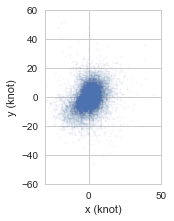

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAB6CAYAAAD6WhzgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEopJREFUeJzt3XlQFNf2B/DvsCkBFNCIeXFJEJFoyeICohE07kEUoylR
0UQTFUsrLlkgUZAnGEUTqywLFOKW4B6Fl1QZU1ETIYoQUXwJSIyDASWyyDKyKgNzfn/4ox8DQzMs
wyycTxVVMz13ps8dOPTte2/flhARgTGmkpG2A2BMl3GCMCaCE4QxEZwgjIngBGFMBCcIYyL0NkHk
cjm2bdsGDw8PeHh4YNeuXaivr++08gBQWVkJX19fyGSyFsuEhoZi2LBhSj/btm1rsfy9e/ewZMkS
uLi4wMfHB0lJSa1XthXvvfdesxgOHTrUYvm0tDTMmzcPzs7OmD9/Pv744w/htZ9++gmffvppm/av
UCgQGxuLqVOnws3NDQsXLsTNmzeVyhw/fhwzZsyAm5sbAgMD8fDhQ6XXr169ijlz5sDZ2Rlz585F
ampqm2LQGNJTO3fupGnTplF6ejpdu3aNJkyYQFFRUZ1WnogoPDycDhw4IFrG39+foqOjqaioSPip
qKhQWbampoa8vLwoJCSEpFIpRUVF0ciRIyknJ6f1CouYOHEiJSQkKMVQXV2tsmxBQQG5ubnR3r17
SSqVUlhYGHl4eNCTJ0+EMvPnz6fU1FS193/kyBFyd3enixcv0t9//02RkZHk6upKeXl5RER09uxZ
GjFiBJ04cYKys7MpIiKCJk+eLMSYlZVFI0aMoKioKMrJyaHdu3fTqFGjqLCwsAPfSufQywR5+vQp
ubi40KVLl4Rt8fHx5OnpSfX19R0uT0RUVFRErq6uJJPJRGNxd3enxMREteJOSEggT09Pqq2tFbYF
BATQzp071Xq/KhUVFeTo6EhSqVSt8vv27SM/Pz/huUKhoClTplBcXJxSnAEBAWrHMHv2bIqJiVHa
Nn36dDpy5Ijwenh4uNI+Z86cSWfOnCEioo0bN1JgYKDS6/PmzaOLFy+qHYOm6GUTKysrCzU1NXB3
dxe2jRkzBiUlJXjw4EGHywPA6dOn4ebmht69e7cYx+PHjyGTyfDqq6+qFfetW7fg5uYGU1NTYdvY
sWORnp6u1vtVkUqlMDExwaBBg9Qqn56ejrFjxwrPJRIJRo8erRTD5MmTkZ6ejrt376r1mSEhIZgz
Z06z7RUVFQCAhw8fYtSoUUr7HDZsGG7dugUAuH79OmbNmqX0enx8PKZOnarW/jVJLxOksLAQ5ubm
sLKyEra9+OKLAICCgoIOlweAK1euYOLEiaJxSKVSSCQSfPXVV/D29sabb76Jw4cPQ6FQqCxfVFSE
fv36KW3r27cvCgsLRffTWgyWlpYIDg7G66+/jrlz5yIhIaHF8urE0Lt3b4wcORKJiYlqxeDu7o7+
/fsLz69cuYKcnBx4enoKn9/0e3706BFKS0tRUVGB0tJSmJqaYt26dRg/fjwWLVrUoX8anUkvE6Sm
pgY9evRQ2mZmZgYAqK2t7XD5+vp63LlzBw4ODqJx3L9/H0ZGRhg0aBBiY2OxYsUKREVF4eDBg22K
W1UM6srOzsbTp0/h6emJgwcPws/PDyEhITh//nyHYnBwcEBGRkab45FKpQgKCsLs2bMxZswYAICv
ry8OHTqE33//HXV1dThz5gwyMzMhl8tRVVUFAIiIiBDqMHLkSLz77rvIy8tr8/47m4m2A2iPnj17
NvuFNjw3NzfvcHmZTIb6+nrY2NgI295//32lnpnz589j8eLF8PHxgbW1NQBg2LBhePLkCY4ePYpV
q1apHUfPnj1V1tPHxwePHj0Snqv6r/rRRx8hMDBQaAo6OTnh4cOHiIuLg4+PT7tjsLa2xv3791XG
1ZKMjAysXLkSQ4cOxfbt24XtgYGBKCgogL+/PwBg/Pjx8PPzQ0VFBUxMnv8Jzp49G0uWLAEADB8+
HCkpKfj222+xcePGNsXQ2fQyQfr374/q6mpUVlbC0tISwPPzAQCws7PrcHmJRAIASk2l7du34+nT
p8Lzfv36QSKRCMnRwMHBAcXFxaivr4exsbHSa3Z2dsJ+Gzx+/FhlDAAQGxuLuro6la81MDY2bnae
NGTIEFy5ckVleXVjqK+vh5GR+g2MGzduYPXq1XBxcUF0dLRSwvXo0QM7duxAaGgoampqYGtri/Xr
12PAgAGwtraGqalps6O1vb290j8HbdHLJpaTkxPMzc2V/qOnpaWhb9++Kk9W21rexsYGJiYmKCsr
E7bZ2dlh8ODBwo+JiQm2b9+O5cuXK703IyMDr7zySrPkAAA3Nzekp6cr/dGnpaXBzc1NZT1ffvll
pX2qsm7dOmzevFlpW2ZmJuzt7VWWd3NzQ1pamvCciITOg8bKysqE87TW/Pnnn1i1ahXGjh2LmJiY
ZkflL774AsePH4e5uTlsbW1RU1ODlJQUeHp6wsTEBC4uLsjMzFR6T3Z2NgYOHKjW/jVK291o7RUe
Hk5vvPEGpaWlUXJyMk2YMEFpzKKsrIzKysrULt/UggULmnVdNpWSkkJOTk4UExNDubm5lJCQQK6u
rvTdd98REVFdXR0VFRVRTU0NERFVVlbShAkTKDg4mKRSKUVHR5OzszM9ePCg3d9DQkICDR8+nM6e
PUu5ubl09OhRGjFiBN24cYOIiJ49e0ZFRUX07NkzIiLKz88nFxcX+vLLL0kqldK///1vGjduHJWX
lyt97rx58+jw4cNE9Hz8pqioiOrq6lTG4OfnR9OnT6e8vDyV40HHjh0jT09PSk1NJalUSitXrqSF
CxeSQqEgIqJffvmFRowYQadOnaKcnByKjIwkFxcXevjwYbu/l84iIdL8BVNNR1U7Q21tLb7++muk
pKTA1NQUXl5e8Pf3F5oF4eHhAJ53QapTvqn4+Hjcu3cPQUFBonH89ttviI+PR35+PmxsbODr64sp
U6YAeN50Wb9+PVavXg1vb28AQE5ODg4fPozc3FzY2dkhICAAzs7OHfouLl26hAsXLqC4uBh2dnZ4
++23ha7cO3fuICIiAlu2bMHw4cMBPD/KffPNNygsLMSgQYOwfPlypSNOdXU1Vq9ejV27duGll15C
YmIiYmJisHfv3mZHlYKCAmzatEllXD4+PliyZAkUCgXOnDmDxMREyOVyuLq64p133lHqVUxOTsa5
c+dQXFyMgQMHIiAgAE5OTh36Xtpi9OjRql/oiixMS0vrit10qoKCAnJxcaHHjx+3+zP0sd5ERKdO
naJly5YpbVu5cqVa34U+1lksZr08B+kKdnZ2mDdvHk6fPq3tULoUEeHkyZNYs2aNsO3WrVswMjJC
3759tRiZdnCCiNi0aRN++OEH0cmKhubHH3+Eo6Mjxo0bJ2xzdnbG/v37tRiV9uhlN29XsbKyanHA
zVDNmjVLadoHAGGsojviIwhjIjhBGBOh1rEzJiYGP//8M+RyORYtWgR3d3cEBwdDIpFg6NCh2Lp1
a5tGXRnTF63+VaempiI9PR0nT55EXFwcCgoKsGPHDmzYsAEnTpwAEeHy5ctdEStjXa7VBLl69Soc
HR2xdu1aBAYGYtKkScjMzBSurfDy8kJycrLGA2VMG1ptYpWVleHRo0c4cOAA8vLysGbNGhCRMKHP
wsJCuDBGjCZG0/VBd6y3IdW51QSxtraGvb09zMzMYG9vjx49eihd/FJVVYVevXq1uqMWh/IN2M2b
N7tdvfWxzmIJ3WoTa/To0fj1119BRCgsLERNTQ08PT2FVSeSkpKEC2MYMzStHkEmT56MGzduYMGC
BSAihIaGYsCAAQgJCcGePXtgb2+PGTNmdEWsjHU5tbp5P/nkk2bbjh071unBMKZrePCCMRGcIIyJ
4ARhTAQnCGM

Wall time: 10.4 s


## 2.3 Overview by Month

In [41]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl8FPX5x997H9nN7mZzkvsiIRAEFJBDQVBBRbHetd5t
vbW29WorxaNqrda7Vettq79aq1VRi8UqCioqN0kIue872d3sfc38/oi7EBMgkMlBzef1yivZ2Znv
fGcyn3me73PKRFEUmcAEJnBEQD7WE5jABCYwdEwQdgITOIIwQdgJTOAIwgRhJzCBIwgThJ3ABI4g
TBB2AhM4gjBB2O8BJjx3/zuYIOwoYMmSJRQUFPD73/9+0O+bm5spKCigoKCAnp4eSc/90UcfsXr1
6ujnJ554gpkzZ0p6DpfLxQknnMDatWslHXcCAzFB2FGCTCZj3bp1g3734Ycfjth5X375Zdrb20ds
fJfLxbXXXktLS8uInWMCezFB2FHCzJkzaWpqoqysbMB3a9eupaCgYAxmNTx8/fXXnHvuuZSXl4/1
VL43mCDsKGHKlCmkp6cPkKYtLS3s2rWL5cuXDzhm3bp1nH322cyYMYNFixbx6KOPEgqFot8vWbKE
Z599ltWrVzNnzhxmzZrFbbfdhsvlAuDiiy/m66+/Zv369RQUFNDU1BQ99oMPPmDZsmUUFxdz1lln
sXXr1uh3TU1NFBQU8MQTTxzwmq677jomT57Mc889d1j3ZAKHjgnCjiJOPvnkAWrxhx9+yFFHHUVy
cnK/7a+//jrXX38906dP58knn+Siiy7ihRde4Pbbb++33zPPPENvby8PP/wwN910E++//z5PPfUU
AKtXr6aoqIhZs2bx+uuvk5iYCIDX6+WRRx7hxhtv5LHHHsPr9XLDDTdEXwaJiYm8/vrrnHvuuQe8
nldffZXHHnuMuLi4Yd2XCQwdyrGewPcJy5cv5/nnn6e6uprc3FygTx0+5ZRT+u0XDod59NFHOe20
06IGo4ULF2I0Glm9ejU/+clPKCwsBCA5OZmHH34YmUzGwoUL+fTTT3nuueeYM2cOixYtwmAwoNfr
+cUvfsErr7wC9FmNH3zwQWbMmAFAKBTihhtuoKqqisLCQtRqdfS7A2Hy5MmS3ZsJDA0TEnYUUVxc
TEpKCv/5z38AaG1tZefOnSxbtqzffjU1NfT09AxQk0877TQANm/e3G9MmUwW/ZyQkAD0SVen0zno
PBQKBdOnT49+Tk1NBdjv/hMYP5gg7ChCJpP1U4s//PBDpk+fTkpKSr/9HA4HAFartd92o9GIWq2O
rlEBdDrdgHMoFAoWLlzI/fffP+g8NBoNcvnef33kb0EQDvPKJjBamCDsKOPkk0+mtLSUpqYmPvzw
wwHqMIDZbAagu7u73/be3l4CgUD0+wPh9ttv58svv8Rut0sz8QmMC0wQdpQxa9YsEhIS+Pvf/86O
HTsGqMMA2dnZWCyWAYEIH3zwQXSMg8FgMHDPPfdQV1fXz7I8gSMbE0anUYZcLuekk07ipZdeiq5p
vwuFQsH111/PPffcg8lkYunSpezZs4cnnniC5cuXD9nYs3DhQhISEti2bRs6nQ6/3z+k4wKBAGVl
ZSQnJw+wXk9gbDEhYccAJ598MsFgcFDfawQXXXQR9957L1999RVXX301r776KpdffjkPPfTQIZ3r
7rvvxuv10tXVRVVV1ZCO6ejo4Pzzz+eNN944pHNNYOQhm6jp9L+FpqYmLrnkEj7++OPoto0bN/Lj
H/+Y//73v6SlpY3h7CYwXEwQdgITOIIwoRJPYAJHECYIO4EJHEGYIOwEJnAEYcKt8z8AQRAIh8PR
yhKiKEb/lslk/X4UCkW/UMaxwMcff8yTTz6Jx+Nh4cKF3HHHHf2+37BhAzfffHPUpVRUVLTfqK3v
GyaMTuMYoigSDAYJBAIEg8Hoj9/vj24LhUKHHFKoUChQqVSoVCrUajVqtTr6WaVSodFoUCpH5l3e
2NjIhRdeyBtvvIHVauXSSy/lyiuvZPHixdF9/vSnPxETE8Nll102InM4kjFB2HECURQJBAJ4PB7c
bjdutxuPx4MgCMjl8uiPUqlEqVRGiabRaKJ/R0gml8sJh8Ns376dGTNmIJPJEEWRUChEIBDA7/cP
IH2E+IIgIIoiKpUKvV4fzfbR6/WSkPiFF16gvb2dX/3qVwC0t7ejVquxWCzRfa6++mp8Ph92u52U
lBRWr149EcDxLSZU4jFCKBTC6XQOIKdSqUSlUqHT6bBarZhMJlQq1bDOFQnuVygUaDQajEbjfvcV
RRGv14vD4cDtdtPV1UUwGEQQhH4kjomJwWAwHLJ6XV9fj1qt5sc//jEdHR0sWbKEm266qd8+JpOJ
Cy+8kOOPP57XXnuNX/7yl7z66quHfuH/g5iQsKMIv9+P3W7HZrPhdrujqqler8dkMmEymVAoFJKc
a18JK8WYgUAAm81Gb28vPp+PYDCITCbDZDJhNpuHPPc77riDzZs38+qrrxITE8O1117LihUrOOus
s/Z7zDHHHMMnn3xywBfN9wUTEnYEIYoiHo8Hm82G3W7H7/ejUqkwGAykpqYeUQ+gWq0mKSmJpKQk
oM/Q1dPTQ3d3Nw0NDYTDYWJiYoiLi8NkMqHRaAYdJz4+nnnz5kVTB5cuXcrOnTujhPX7/bz00ktc
ddVV0WNEURyxNfWRhom7IDFEUYyqkna7HUEQ0Gg0mM1mkpKShq3ejhfI5XLi4+OJj48HwO1209HR
QVtbG42NjWg0GiwWCwkJCajV6uhxJ5xwArfeeisOhwODwcDGjRtZsmRJ9HuNRsNbb71Ffn4+S5Ys
4c0332TGjBkD8n6/r5hQiSVCOBzGZrPR3t6O3+9Ho9FgtVpJTEzslyw+mvORUiU+FPj9ftrb27Hb
7QSDQUwmE4mJiRiNRmQyGf/85z956aWXCAaDzJs3j1WrVvHb3/6WJUuWsHTpUkpLS7nzzjvxeDxY
rVYeeOCBQbOavo+YIOww4fP56OjooKurC7lcjtlsJjU1dcwl6VgSdl+4XC6am5txu90olUqSkpKw
Wq0TKu5hYuKuHQZEUcRut9Pe3o7b7Uar1ZKZmUlcXNyYByWMNxgMBgoKCgiHw7S2ttLW1kZzczNx
cXEkJiai1+vHeopHFCYk7CFAFEV6enpobm4mHA5jMBhIT09Hq9WO9dQGYLxI2MFgs9loaWnB5/Nh
MBhIS0sjJiZmrKd1RGBCwg4BoijS29tLY2MjwWAQi8VCenr6uCPCkQKLxYLFYsHr9VJfX095eXl0
KTEeX37jCROEPQhcLheNjY14vV7MZjOZmZkTRJUIOp2OwsJCvF4vtbW1lJaWYrVamTRpUj/L8gT2
YoKw+4HX66WpqQmn04nRaKS4uHjMDUn/q9DpdBQVFeFyuairq6OkpITExESSk5MnjFPfwcTd+A5C
oRCNjY309PSg1+uZMmXKhA9wlGAwGJg2bRo9PT00NTXR2dlJSkoKSUlJE8a8bzFB2H1gs9mor69H
LpeTn59PbGzsWE/pe4m4uDji4uJoaWmhtbWVnp4ecnJyJta3TBAW6JOq9fX1OBwOEhISSE1NHZNg
hwn0x6RJk0hMTKSqqoqysjImTZr0vZe233vC2mw26urqUKlUE+qvhPjFL35BaWlpVCpef/31nHTS
SdHvS0tLueeee/B4POh0Ou66665og699oVQqKSwspKurK7pU+V5LW/F7imAwKFZVVYlbtmwRm5qa
REEQxnpKkiIUCombN28WQ6HQmJz/pJNOEm02236/P/XUU8Wvv/5aFEVR3Lhxo3j66acfdMxQKCSW
l5eLW7ZsEVtbW//n/mdDwbjR+yJNhD/99NN+25csWdKvEXEwGGTmzJn09PREt1188cWcffbZ0c8O
h4OZM2cSCAQ

Wall time: 18.1 s


In [42]:
df.describe()

lat           lon             x             y         speed  \
count  14604.0  1.460400e+04  14604.000000  14604.000000  14604.000000   
mean      65.0  3.430000e+02     -0.145603     -0.743417      9.329787   
std        0.0  4.388462e-11      6.994979      8.345507      5.665707   
min       65.0  3.430000e+02    -29.736288    -45.760813      0.055445   
25%       65.0  3.430000e+02     -4.458103     -6.028264      5.336187   
50%       65.0  3.430000e+02      0.117798     -1.102233      8.087832   
75%       65.0  3.430000e+02      4.244643      4.754201     12.061309   
max       65.0  3.430000e+02     44.501046     51.791948     54.627423   

                dir          date          HrMn  dir_windrose  
count  14604.000000  1.460400e+04  14604.000000  14604.000000  
mean     178.193420  2.010566e+07    900.164339    168.322603  
std      102.419825  2.871807e+04    670.806592    101.609916  
min        0.019061  2.006010e+07      0.000000      0.046123  
25%       79.653969  2.008070e+07    600.000000     73.817527  
50%      200.988842  2.010123e+07   1200.000000    177.725571  
75%      260.183129  2.013070e+07   1800.000000    239.220523  
max      359.953246  2.015123e+07   1800.000000    359.995452

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

[-21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15  16  17  18  19  20  21]


# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1.1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

1.9
Wall time: 0 ns


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    
points = FITTING_RANGE    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [48]:
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result, kde = fit_kde(df, config)
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 1849
[  2.30704313e-05   2.65354089e-05   2.97610622e-05   3.44272141e-05
   4.18848751e-05]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQJPddL/jJq86+7+mevkdiQELW+EKs1mYlX+Dn58FY
O1gKWQ8967Fo39qLWRYEsdbjGfl6j7B3F5AWW+t1hAwhhAV4vcAGa+yHAgcYoUEW6DCePqu6urru
+8jKY/+o+WX/KiuzKjMrs6erlZ8IhXq66pe/7KrMT37vD6OqqgofPnz4OKNgb/QJ+PDhw4eX8EnO
hw8fZxo+yfnw4eNMwyc5Hz58nGn4JOfDh48zDZ/kfPjwcabhk5wPHz7ONHyS8+HDx5mGT3I+fPg4
0/BJzocPH2caPsn58OHjTMMnOR8+fJxp+CTnw4ePMw2f5Hz48HGm4ZOcDx8+zjR8kvPhw8eZhk9y
Pnz4ONPwSc6HDx9nGj7J+fDh40zDJzkfPnycafgk58OHjzMNn+R8+PBxpuGTnA8fPs40fJLz4cPH
mYZPcj58+DjT4G/0Cfi48VBVFaIoQpIkcBwHQRDAsiwYhrnRp+bDx8BgVFVVb/RJ+LhxaDabKBaL
GB0dRavVAgAkEglMTk5idHQULMv6pOdjqOFbcq9jyLKMer2OdDqNaDQKSZIgCAJUVYWqqpBlGZIk
QRRFMAwDjuN80vMxdPBJ7nUIVVUhSRJkWQbDMJBlGVtbW5BlGTzPQ1EU1Go1BINB8PzxJUJIr9ls
gmVZcBwHjuPA87xPej5OLXx39XUGRVHQarVAvvbDw0PkcjmsrKwgEAhAFEUkk0kwDINWqwWe5xGJ
RBAOhxGJRMBxXMfxyHEYhtHIjuf5rvf58HGj4FtyrxMQ91OWZQCAJEmIx+NQFAWCIGB0dBSiKCIU
CkEQBIyPjyMajaLZbKJWq6FYLOLo6EgjPUJ8NJlJkgRVVdFsNn3S83Fq4JPc6wCKokCSJCiKAoZh
UC6XcXBwgKmpKYyNjWF/f7/j/QzDQFVVMAyDUCiEUCiEqakpqKqKRqOBer2OQqGAZDIJQRA0wutF
eizbrlZqtVoYGxvzSc/HicEnuTMOEkcjyYRkMolSqYTl5WXNUrMasWAYRiMzmvRqtRoKhQIODw8R
CAQ63FtCbqqqol6vI5VKaQkM8n/f0vPhJXySO6PQu6eiKCIWiyEQCGBzc1NLKAySLKBJD2hbjMTS
y+fzODw8RDAY1AiPrCGWot7S80nPhxfwSe4MQu+e5vN5JJNJzM3NYWpqqovY9JYcISG7YFlWi9dN
T09rpFer1ZDL5dBoNAAAmUxGI0fa0vNJz4cX8EnujIF2TxVFweHhIer1OtbX1xEKhbre72XZB016
AFCtVpFKpQAA2WwWzWYToVBIs/RCoZBPej5ch09yZwSqquLo6AiRSATBYBCNRgOxWAzRaBSbm5sa
eZitBbwlPKBNeizLYmZmBkDb4qzX66jVashkMhrpkZieVdILBAJ+jZ4PU/gkdwZAat/y+Tx4nke5
XEY6ncbi4iLGx8d7rjUiB6fuaj/o92JZFtFoFNFoFMBxBwbpwhBFUXNriaVHjqEnPVEUIcsyJicn
IQiCT3o+NPgkN+QgnQsExB3c3NxEIBCwdIzTUg/OcRxGRkYwMjIC4Jj0arUaUqkUWq1Wl6VHyIwk
PMLhMBqNRkdHhk96r2/4JDek0LdmVSoV1Ot1jI6OYnl52fJNbfa+00B8vUjv6OgIkiRppEeIXm/p
tVotn/Re5/BJbghBJxcA4OjoCPl8HqFQCBMTEwPfwKeVAPSkJ0mSRnqVSkUrmSGWXjAY9EnPh09y
wwR97Vur1UI8HgfDMNjc3EQikbB9TK/ibycBnucxOjqK0dFRBINB1Ot1jIyMaMXJsixr8bxIJNKR
oKBJjyQyCPH5pHe24JPckEBf+1YqlXBwcICZmRnMzMx0FNm6gWEkPpZlNdID2pZerVbT2tBoK09P
eoqiaAkcmvR4ngfP8z7pDTF8khsCyLKsDbRUVRWHh4col8tYXV3VatAAZ1YZ3adK/27YYPR38zyP
sbExjI2NAWhbvsS9LRQKUBSlw9KjLTia9FqtFsrlMubn533SG0L4JHeKoU8ukNq3UCiECxcu+AWx
OvQjHkEQIAhCB+kRSy+Xy0FV1Q5Lj5AesQiJe8swjG/pDRF8kjuloN1TAMjlcjg6OsL8/DwmJydd
q2+jY1SDHGcYQUZKjY+PQ1XVDksvl8sBAMLhsDZIlLZ4aUvPJ73TDZ/kTiHy+Tw4jkMwGISiKEgk
Emg0GqatWQSvF3LyAgzDIBAIIBAIdJBerVZDuVxGs9nEzs6OoaUH+KR3muGT3CkCcU8zmQzGxsYg
yzJisRhGR0f7tmYNgrNAjm6fP016giAgl8thfn4etVoN1WoVmUwGLMtqhBcOh01JD0CHPgbHcT7p
nSB8kjsloGvfSPa0Wq1aas0icIushpX0vCIOVVW1HtlAIICJiQlNxpHU6JE5eXQig7bgfNK7cfBJ
7gZDX/smyzKq1SpYlrXVmgU4J6dhJbUbCYZhEAwGEQwGMTk52UF65XJZIz16VLwZ6aXTaUxMTCAa
jWoTVnzScw8+yd1AmI0l53keExMTtgjOh3fQl9gYwYj0ms0m6vU6SqWSpo9Bu7eE9BqNhpa5FUUR
ALr0MXzScw6f5G4Q9K1ZyWQShUIB58+fR6lUcnRRD2KRZTIZlEolhEIhTZrQRxtOrWOij0GTnpEo
EJ1FJ987se71mrc+6dmHfyWfMPS1b61WC7FYDDzP48KFC9qopJNyO8kNVi6XMTc319ELWq/XO9wt
NxIfXrnFVqytQeBGP7CZKJAsy5o+Bm3p0WTmk55z+CR3gtC7p8ViEYlEArOzs5ientYu1EEsMjvr
arUaYrEYGIbBysqKptlApgqTPlAyujwYDGqkRw+0tIphvRG9IFBaH6NUKmFhYQGqqpqKAvmk5xw+
yZ0Q6LlvqqoikUigWq1ibW1NE4Ih8DqBoKoqstks0uk0lpaWkEgkDNu6yM1F9BqIlUcPtCSkR0/8
8GEPdPbWqigQsax90usPn+Q8hllrVjgcxubmpmFr1iAkR2I7ZpAkCQcHB5AkScveJhKJvtaK2RTf
Wq2GZDIJSZJMJ36cBLzMDnvtChsd34ooELGsaVEgmvQkSYIoikgkElhaWoIgCK9L0vNJzkPQjfVA
W7wllUphYWEBk5OTpuuskJXZul43O3FPx8bGsLy8rLmbTi54o9lutVoNtVoN+Xxe6wOlm9+9xrDe
uFZIVC8KRJNeP1EgEvcjZS60pScIQgc5nkX4JOcBSO3byy+/jAsXLgAAEokERFHExsYGgsFgz/Vu
163p3VPSoK5/zyAxQXriB90SRURqWJZFMBjULIxhyt7eCEuuH4xIz0gUKBwOd2VugU5L76yT3vBc
aUMCfWN9tVpFMpnE2NgYzp8/bylY72ZMTpZlxOPxDvfUaJ2boFui6O4A0sWxu7urlU/QmUQfzqEP
J9CkBwDb29vaqHi9KBBgTHocx2n1esNMej7JuQh97RtprjeznnrBDZIj7inRfbAiSzjI/r3OKxgM
YmxsDNVqFaurq5qrRTKJg2ZuvcRptOT6gZBeOBxGoVDAxsaGpoSWSqV6KqEBx9eyflT8MJKeT3Iu
gLinkiRp88fi8ThUVcXKyooWt7KKQd1VVVWRy+WQSqUcyRJ6fQHT5RNAZ3xJr79qdAMagWQohxFe
kig5th1RIFoJTZ/IaDabYBimqyPjNMMnuQFh1po1NTUFSZIcXQBOL3iSsIjFYpbjf6cB+viS0Q14
ozO3XpIQ4O1wAaNjG5EeGSBKf+bkc9eXCNGat7lcDhMTEwiHwxpZnibi80luAOhr35LJJEqlEpaX
lxGNRk+0cwE

## 4.1 Bootstrap GOF limit

In [50]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 12.7 s


In [51]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP8AAADXCAYAAADV94eRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE9dJREFUeJzt3XtQVOUfBvBnWUBh2UQdKA1FNDHyFmBXFS+ZopW3NC9E
UzRGlpaCghcGSOU23u+X0HQMS7LGTCvHC2IzOTWtqWEg44KraKJC6nKJ6/v7o3F/URJw9uwCvc/n
r93lnPd8ffd99pw9+zqvRgghQETScWjuAoioeTD8RJJi+IkkxfATSYrhJ5IUw08kKcfmLoDqN3z4
cFy9erXOa66urnj00UcRFRUFf3//ZqqM/gs0/J2/5Ro+fDimTJmCiRMnAgCEELh+/TpWrVqF7Oxs
HDt2DG5ubs1cJbVWvOxv4XQ6HTw8PODh4QFPT0/069cPycnJuH37Nn744YfmLo9aMYa/FXJ2dgYA
aLXaBre9ePEiQkND4e/vj6effhqLFy9GWVmZ5e87duxAUFAQAgICkJiYiFmzZmH9+vUAgAULFuC9
996r097w4cPx8ccfAwCqq6uxevVqDB8+HL1798azzz6LhIQE1NTUWPafN28eJk+ejCeffBLff/89
qqqqsGLFCgwcOBCBgYF48803kZeXp0q/UNMw/K1McXExEhIS4OHhgQEDBjS4fWRkJDp37owvv/wS
W7duxalTp7Bt2zYAwGeffYb169cjOjoae/fuxbVr15CZmdnoWlJTU/Hll18iOTkZhw8fRlRUFNLS
0nD8+HHLNgcPHkRISAh27doFf39/rFu3DidPnsSaNWuQnp4OHx8fhIaGwmw2N70zyCoMfwuXnJwM
f39/+Pv7o3///ggKCkJRURE++uijRn3fLygogLu7Ozp37oz+/ftj8+bNGDt2LADgk08+wdSpU/HC
Cy+gZ8+eSE5OhouLS6Nre+SRR5CUlIQnn3wSXl5eGD9+PHr06IHc3FzLNj4+Phg/fjz8/Pyg0Wiw
c+dOxMfH44knnkCPHj0QExMDNzc3HDhwoOmdQ1bh3f4WLjw8HGPHjkVlZSX27NmDI0eOYNasWejZ
s2ej9p89ezZSUlLwxRdfYNCgQXj++ecxevRoAIDRaERYWJhlWzc3N/Tq1avRtY0YMQI//vgjli9f
jvz8fOTm5uLKlSsYOXKkZZsuXbpYHl++fBmVlZUICwuDRqOxvF5RUcFL/2bA8Ldw7du3h7e3NwAg
Li4OxcXFmDlzJg4cOIBOnTo1uP/rr7+O4OBgHDt2DN999x2ioqLw3XffISkpCW3btkVtbW2d7e/d
TwBQJ6D3VFdXWx5v2LABu3btwssvv4yRI0ciMjISkZGRdbZv27at5fG9ewE7duxAx44d62zHXy3s
j5f9rUxcXBy0Wi3i4+Mb3LaiogIJCQmoqqpCSEgItmzZgtjYWBw6dAgA4Ovri7Nnz1q2r6ysxIUL
FyzPnZycUFpaanleWlqK4uJiy/Pt27cjOjoaCxYswPjx4+Hl5YVr166hvl+Pu3btCkdHRxQXF8Pb
2xve3t7o0qUL1q5dW6cOsg+Gv5Xp0KEDIiMjceLECRw9evRft23Tpg1Onz6NJUuWIDc3F0ajEUeO
HEG/fv0AAG+99RbS09Oxb98+5OXl4YMPPsDNmzct+/ft2xc//fQTMjMzkZeXh5iYGDg4/H/IPPjg
g8jMzITJZML58+fx/vvv486dO6isrLxvPTqdDtOmTUNCQoJlv/j4eGRkZDT6awyph+FvhSZNmgR/
f38kJiaivLz8X7dds2YNHBwcMH36dEyaNAnOzs5YsWIFAGDw4MGIjY3Fxo0bMXHiRLi4uMDPz8+y
77hx4/Diiy9i7ty5CAkJgZ+fHwICAix/T05ORkFBAV566SW8++678PLywqRJk3D+/Pl664mKisKo
UaOwaNEijB07Frm5uUhNTa1zb4DsgzP8qI6JEydi2LBhmD17dnOXQjbGG36tWHFxseUm2v24urpC
p9PZsSJqTRj+Vmz69OnIz8+v9+8zZszAvHnz7FgRtSa87CeSFG/4EUmK4SeSFMNPJCnFN/wmTJhg
mZLp5eWFpKQk1YoiIttTFP6KigoIIbB792616yEiO1F02Z+Tk4Py8nKEhYXhtddew5kzZ9Sui4hs
TNFPfRcuXMDZs2cxefJkXLp0CTNmzMC3334LR0dOGyBqLRSl1cfHB97e3tBoNPDx8YG7uztu3rxZ
738xNRgMVhVJRNYJDAz8x2uKwr9v3z7k5uYiPj4ehYWFKCkpgYeHR5MP3lIYDAbWZwV71Jebm4vw
5KNwa/+wam2W/H4VWxeMgK+vr2ptKmHr/qvv5Kso/JMmTcLChQsxbdo0aDQaJCYm8pKfqJVRlFhn
Z2esXLlS7VqIyI44yYdIUgw/kaQYfiJJMfxEkmL4iSTF8BNJiuEnkhTDTyQphp9IUgw/kaQYfiJJ
MfxEkmL4iSTF8BNJiuEnkhTDTyQphp9IUgw/kaQYfiJJMfxEkmL4iSTF8BNJiuEnkhTDTyQphp9I
UlaFv6ioCEOGDIHRaFSrHiKyE8Xhr6qqQmxsLNq2batmPURkJ4rDn5KSgqlTp8LT01PNeojIThQt
1PnFF1+gQ4cOGDx4MLZt29aofepbJrilYH3WsXV9JpPJJu1mZWXBbDbbpO2maI73V1H4P//8c2g0
Gpw6dQrZ2dmIjo7G5s2b4eHhUe8+sq8vbw3WB+j1euDgddXb7dOnD3x9fVVvtyls3X/1fbAoCn9a
WprlcWhoKOLj4/81+ETU8vCnPiJJKTrz/9Xu3bvVqIOI7IxnfiJJMfxEkmL4iSTF8BNJiuEnkhTD
TyQphp9IUgw/kaQYfiJJMfxEkmL4iSTF8BNJiuEnkhTDTyQphp9IUgw/kaQYfiJJMfxEkmL4iSTF
8BNJiuEnkhTDTyQphp9IUgw/kaQYfiJJKVqxp6amBjExMcjPz4dGo8EHH3zQ7IsdElHTKDrzZ2Rk
AAA+/fRTzJkzB6tXr1a1KCKyPUVn/hEjRmDo0KEAgGvXruGBBx5QsyZqhJqaGhiNRlXbAwCtVtvk
fU0m059LaKvU3v3k5+er0g79n+KFOh0dHREdHY0jR45g3bp1DW5f3xrhLUVrq89kMiEl7Rxc23mq
0n5RQTZc9B2Vt3fwurrt/U1RQTY6evmp0tZfZWVlwWw2q95uUzXH+LNqld6UlBTMmzcPr7zyCg4d
OgRXV9d6tw0MDLTmUDZlMBhaXX16vR6u7a7Drf3Dqhyj7E4hXNt5tuj2bKFPnz7Nfr/K1uOvvg8W
Rd/59+/fj61btwIAXFxcoNFo4ODAHw6IWhNFZ/6RI0di4cKFCAkJQXV1NRYtWoS2bduqXRsR2ZCi
8Lu6umLt2rVq10JEdsRrdSJJMfxEkmL4iSTF8BNJiuEnkhTDTyQphp9IUgw/kaQYfiJJMfxEkmL4
iSTF8BNJiuEnkhTDTyQphp9IUgw/kaQYfiJJMfxEkmL4iSTF8BNJiuEnkhTDTyQphp9IUgw/kaQU
LdpRVVWFRYsW4erVq6isrMTMmTPx3HPPqV0bEdmQovAfOHAA7u7uWL58OW7fvo3x48cz/EStjKLw
BwcHY9SoUQAAIYRqa7ATkf0oCr9OpwMAlJSU4L333sOcOXNULeq/pqamBkajUfH+JpMJer2+zmv5
+fnWlkUqU/o+3+/9vadHjx42O7kqCj8A/Pbbb3j33Xcxffp0vPTSSw1uX98a4S2FLeszmUxISTsH
13aeyhs5eL3O06KCbHT08rOyMsrKyoLZbFalLave57+9vwBQducGokP6wdvbW4Xq/klR+G/duoWw
sDDExsbimWeeadQ+gYGBSg5lFwaDwab16fV6uLa7Drf2D6vWZtmdQtXaklmfPn3g6+urSlu2eJ/V
qK++E5uin/q

## 4.2 Bivariate Empirical Limit

In [52]:
%%time
gofs_mean_set_bivar = []
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_bivar_set={}

for year_length in [5, 10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    kde_result_standard, _ = fit_kde(df_standard, config)
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years[str(start_year):str(start_year+year_length-1)], kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar=pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    gofs_bivar_set[year_length]=gofs_bivar
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=year_length)
        gofs_bivar.plot(y='K_S', ax=ax2, label=year_length)
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year')
plt_configure(ax=ax2, ylabel='K-S', xlabel='start year')
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAAC3CAYAAADzRqlZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXdglMXWh5/dTe89AVIgCaG3gLQAkSJNkA4SRBDEq5em
IiJ6pShXUVGv4gcKgiheC3AVBBWULiG0kAIJAZKQkN57NmV33++PkAVM25TdZJP3+UfZt8yZJL+d
mTNnzpEIgiAgIiLS4pE2twEiIiKaIYpVRERPEMUqIqIniGIVEdETRLGKiOgJolhFRPSEZhNrWFgY
8+fPr/L5yZMnmTFjBnPmzGHfvn0AqFQq1q1bx5w5c5g/fz7x8fG6NldEpNkxaI5Gd+7cyS+//IKp
qelDn5eXl/Puu+9y4MABTE1NmTt3LqNGjeLq1auUlZXx448/EhoayubNm9m+fXtzmC4i0mw0y8jq
7u7O1q1bq3weExODu7s71tbWGBkZ0b9/fy5fvkxwcDDDhw8HoG/fvly/fl3XJouINDvNMrKOGzeO
xMTEKp8XFhZiaWmp/re5uTmFhYUUFhZiYWGh/lwmk6FQKDAwqNn84ODgpjVaRKSJ6d+/f73ubxax
1oSFhQVFRUXqfxcVFWFpaVnlc5VKVatQK6nuhxEcHFzvH1JLRuxPw4jJjmdPyH5uZsZgIDXgcZ9R
TOs+HjND07ofricP9un7P27y3bEoNgS41vs9LUqsXl5exMfHk5ubi5mZGVeuXGHx4sVIJBJOnTrF
xIkTCQ0NxcfHp7lNFdFjDt34g+/CDyIgMNC1L0/1mY6LhaNO2r4ek9ngZ1uEWA8fPkxxcTFz5szh
tddeY/HixQiCwIwZM3B2duaxxx4jMDCQJ598EkEQeOedd5rbZBE9RBAEDkT8yv6IX7E3s2XZoIX0
cNLdF39ZuZKouGw6tbdq0PPNJlZXV1f11szkyZPVn48aNYpRo0Y9dK9UKuWtt97SqX0irQtBEPgu
/CCHov7A2dyBN0e+iJO5vU5tuHU3hzKFil5eDkBZvZ8XgyJEWj2CILAnZD+Hov6gnaUTG0et0rlQ
Aa7FZAHQ08uhQc+LYhVp1agEFTuDv+f326dws2rHxpEvY2dm0yy2XI/JRCKBnl4N+6JoEWtWEZH6
IggCEomkxmsJeclcTgrjYmIIcbmJdLJx441HV2BlbFHtM9qmcr3asZ0VlmZGDXqHKFYRvSPw7mW+
DjmAQqXEydweR3N79X/TCjO5khRGWlGF11UmkTKwQ19eGDgfcyOzZrP54fVqwxDFKqI3FJQWsiv4
B84nBGMsM8LBzI6E/BRic+4+dJ+pgQlD3fozoEMf+rXr0awiraSx61UQxSqiJ4SkXOfzS9+SU5JH
F3tPlg5agIulE4IgkFeST3pRFulFWVgYmdPDqTOGMsPmNvkhGrteBVGsbZbE/BR+jjyKf8fB9Hbp
1tzm1EiOPI/9Eb9yPOYvZFIZAb2n8kSXx5BKK3yjEokEG1NrbEyt8XHwbGZrq6dcKTR6vQqiWNsc
KpWKX2+d5IdrhyhXKTh/9worhixiiFvLCVlUqpSEpkZyIuYcV1OuoxJUuFt3YNmghXS0rX+YXnOT
lFVWsV71bvgUGESxtilSCzPYdvFrojJjsDK2YFaXMfx84yj/CdqFvLyUUZ5Dm9W+vJJ8zmZdYceR
/eTI8wDwtHVnlKcfIzsNaXFTW02JSysFaJRzCUSxtgkEQeDPmLPsDf2JUmUZg1z7saT/XKxMLOnt
3JV/n9nK55f3UqIoYaLPqLpfqAVisuP54NznZMtzMTM0Zaz3CEZ7DqOTrVuz2NOUxKWXIpFAD8/G
BWKIYm3lCILAruAf+CPmLOZGZvzjkafwcx+g3qP0tPNg46hVvH36E/aE7Ke4vIQZ3SfUuIepDc7G
XeSLK/9FoVQwwm4AS0bOx9ig4Wu7lkRZuZLEzFI6tbNu1HoVRLG2er6/dog/Ys7iYd2Btf7LsDOt
Gr3jat2Ot0av4q3Tn7Dv+mGyi3N4qu/0JjkuplQpCU+7gaHUAB97T4weEKFKpeK/4T9z+OZxzAxN
ecXvOVTJpa1GqAA37+agUEJP78aHN4pibcUcvHGMgzeO0c7SiTceXYGNSc2nPZwtHHl71Cv8++xW
jseeIzjlGot85zCwQ98GjbIlilJO3wni8M3jZBRV7DHKpDI623Wku1Nnujh48dutU4SlRtLe0plX
hz1PeysXgpNbV9KA69EVwRmNXa+CKNZWy7HbZ/gu/CD2Zra86b+yVqFWYmdmw+bHXuPgjWP8fOMY
HwbuoH/7Xiz2fRIHczuN2s0vKeBo9GmO3j5DYVkRhjJDxngNx8TAmMj0W9zMiiUqM0Z9f792PVk5
eBFmRk1/6LslUBkM0dj1KohibZWcjbvIrqs/YG1syZuPrtRYaACGMkNm9ZyEn/sAdgZ/T3DyNa6n
32JuryeY0HlkraPspcRQtl74ilJlGRZG5szsMZFx3v5YP/BFUVwmJyozhhsZt7EztWGct796z7S1
UVauJCo+Gxdbw0avV0EUa6vjUmIo2y59g7mhKf96dAXtLZ0b9J72Vi6se/RFzsZd5JvQA+wJ2U9c
biLPDZiHgVRW5f5z8Zf57OIeDGWGPNNvNiM9h2JiYAxAalYRVuZGmJkYYmZkim/7nvi279mofuoD
p68mUq5Q4eHUNOGOrfMrrY1yNu4iH53fiaHMkLUjluFh07gAAolEgn+nwXw4/k28bD04fSeId89u
pais+KH7TsYGsvXCV5gYGPOm/wom+IxUCzUls4h/vn+SrftCG2WLvhF6K53t/wvD3MSARzqbN8k7
RbG2Eo7ePs1nF/dgek8wTRl6Z2NqzfpRLzGgfW+upd1k3YktaqfRb7dO8vnlb7EwNmf9yJeqtPvD
nzcpV6gIuZmOUtU2SgHHJObyzp5LgIQ3Fg3CwappgjlEseo5giDwv4jf2H31R6xNrNgw6mWtxMia
GBjzit8/mNh5JAn5Kbxx/H12X/2RPSH7sTWxZuPIl6sEMCSkFXA6OAGAohIFd5LzmtyulkZqVhEb
v7xASZmSVfN8m8QLXIkoVj1GEAROZV3kx+uHcTSz4+1Rqxo99a0NqVTKQt/ZLOw3i7ySAo7ePo2D
mR0bR72Mq3W7Kvd/dywKlQB+vdsDjcvspw/kFZayYWcQOQWlPDulJ8P6dGjS94sOJj1m99UfuZx7
nQ5WLrzpv1Jn6Uom+ozCxcKRv+IvEdB7Ko7V5DO6k5zHubBkvN1sWPxETwLDkwmPzmSqv7dObNQ1
JWUK3t59kaSMImaM9OaJ4V5N3oYoVj3lVmYsx6LP4GBky8ZRq3SersS3fS982/eq8fp/j0YB8NT4
rjjamtLOwZyI2CyUKgGZVHehjLpAEAQ++SGEm/E5PNrflacndtdKO+I0WA+pTKsJMNbRr9nyCtXE
rbs5XIxIpVtHO3y7OAEVETzFJQruJLW+devPp6M5F5ZM9052rJjdD6mWvoxEseohYak3iMy4jW+7
nriZujS3OVWoHFXnT+imDqLodS9DwrVWtm4NuZnO179GYm9twmsLHsHQQHuSEsWqZ6gEFd+F/4wE
CXN7T2luc6oQEZvF1Zvp9PZ2eOiwdeX/65tYT1y+y/FL8SiVqirXUrOK+ODbK0ilUtYueARbSxOt
2iKuWfWMoIRg4nITGe4xEA8bVzJJa26T1AiCwLdHbwDw1PiHU8XYW5vSvnLdqlQhk7X8cSIzV85/
fggB4KfTMSya3IP+XZ2QSCSUlCl4Z88lCorLWT67L108NA/pbCg6/4nVVcX84MGDTJ48mYCAAPbv
3w9UFFletWoVTz75JAEBAcTExFT36hbDrcxYsuW5Tf5ehVLBD9cOI5PKmN1zUpO/v7Fci8nkekwW
A7o5061T1T/

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(2001, 2006)    0.035169  0.046551  1.713051e-08    0.045951     0.247594   
(1991, 1996)    0.012929  0.027305  6.138173e-09    0.026056     0.147594   

              R_square  
year_lim                
(2001, 2006)  0.967545  
(1991, 1996)  0.988982

Wall time: 29.6 s


## 4.3 Univariate GOF Limit

In [53]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x, density_dir):
    df_previous = df_all_years[str(start_year):str(end_year)]
    _, _, density_expected, y_ecdf_previous, density_dir_expected = empirical_marginal_distribution(df_previous, x)
    
    # 1. Speed
    r_square = sector_r_square(density, density_expected)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    
    # 2. Direction
    r_square_dir = sector_r_square(density_dir, density_dir_expected)
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s, 'r_square_dir': r_square_dir}

In [54]:
%%time
x = arange(0, df.speed.max() + 1)
fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
gofs_mean_set = []
gofs_univar_set={}

for year_length in [5, 7, 10]:
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    _, _, density, y_ecdf, density_dir = empirical_marginal_distribution(df_standard, x)
    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    if len(gofs)>0:
        gofs = pd.DataFrame(gofs).set_index(['year'])  
        gofs_univar_set[year_length]=gofs
        ax1.plot(gofs.r_square, label=year_length)
        ax2.plot(gofs.k_s, label=year_length)
        ax3.plot(gofs.r_square_dir, label=year_length)
        year_lim = end_year-year_length-5, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
plt.tight_layout()


plt_configure(ax=ax1, ylabel='$\ R^2$', tight='xtight', legend=True)
plt_configure(ax=ax2, ylabel='K-S', tight='xtight', legend=True)
plt_configure(ax=ax3, ylabel='$\ R^2$', tight='xtight', legend=True)
align_figures()
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOsAAACpCAYAAADKmsqyAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnWlglOXVsK+ZyUwyM9n3hJCFELawh0VEFlHEVigVMQoK
dcHWvtbWraVWQVq0te/X6utS962FuqBV3EVANgFZwh5IICvZ90ky+/Z8PyYz2SbJTDJJSHmuP5p5
tvse5jzn3Oec+xyJIAgCIiIilzzSwR6AiIiIZ4jCKiIyRBCFVURkiCAKq4jIEEEUVhGRIYIorCIi
Q4RBE9aTJ0+yatWqTp9/99133HTTTdxyyy1s2bIFALvdzvr167nllltYtWoVxcXFABQXF7NixQpW
rlzJE088gd1uB2DLli0sW7aMzMxMdu3aNXCTEhHpT4RB4LXXXhMWL14s3Hzzze0+N5vNwrXXXito
NBrBZDIJy5YtE2pqaoRt27YJa9euFQRBEI4fPy7ce++9giAIwi9+8Qvhhx9+EARBENatWyd8++23
QnV1tbB48WLBZDIJTU1Nrv8XERnqDIpmTUxM5IUXXuj0eX5+PomJiYSEhKBQKMjIyODIkSNkZWUx
Z84cACZPnsyZM2cAyM7OZsaMGQDMnTuXAwcOcOrUKaZMmYJCoSAoKIjExERycnIGbnIiIv2E32A8
dNGiRZSWlnb6XKvVEhQU5PpbrVaj1WrRarUEBga6PpfJZFitVgRBQCKRuM5tbm7u8h49kZWV1Zcp
iYh4TUZGhlfnD4qwdkVgYCA6nc71t06nIygoqNPndrsdPz8/pFJpu3ODg4O7vIcndPzysrKyvP5C
LyWG+vhhYOdQsuUjLv77PeKW3MCINXd5de2Zqhz+tPs5Fo2cx90Zt7Y71nYOWoOFFY9/xYaVCV6P
75LyBqemplJcXIxGo8FsNnP06FGmTJnC1KlT2bt3LwAnTpxg1KhRAIwbN45Dhw4BsHfvXqZNm8bE
iRPJysrCZDLR3NxMfn6+63wRka4wVlVT+uF/kIeGkrjiFq+vP1p2CoBpwyZ2e57eYOnV+OAS0ayf
f/45er2eW265hd///vfcfffdCILATTfdRExMDAsXLmT//v3ceuutCILAn//8ZwDWrl3LunXreOaZ
ZxgxYgSLFi1CJpOxatUqVq5ciSAIPPjgg/j7+w/yDEUudQrffBu72Uzqfffip1Z7da0gCBwtP4XS
L4D0qO4Vg844BIU1ISHBFZpZsmSJ6/MFCxawYMGCdudKpVL+9Kc/dbpHSkoKmzdv7vR5ZmYmmZmZ
Ph6xyH8r9UezqD90mOBxY4maN9fr60say6nW1TFreAZ+su5FStcHzXpJmcEiIgON3Wym8PW3QCpl
xC/ucTksveFoeYsJHN+9CQygN1q9vr8TUVhFLmvKPvkUY2UlcTf8GHVyUq/ukVV2CqlEypS49B7P
7YsZLAqryGWLobyc0o8+Rh4WSuKK3i2bNIZGLtQXMTZqJIH+Pa91RTNYRMRLbCYTOX/9G3azmRFr
7vLaqeQkq/w0ABkemMAgalYREa8pePUN9EXFRF53DRGzr+z1fVzr1R5CNk70ht6vWS+J0I2IyEBS
tX0H1Tu/Q5o0jD+Fn0H56e9Ijx5NevQoxkePIi4oxiNHk8lq5lRVDgnBccQGRnn07CEZuhERGQy0
BYXkv/oGMrWaD2b4YfezI5PKOFiSxcESR8ppuDKURSPncX3afJTygC7vdbrqHBabxWOtCn1bs4rC
KnLZYNXqyP3r3xAsFk4vSadMXs7tE25kyeiFVGirya46T3Z1Licqz/Le6U/5IncHS8YsZNHIeW6F
1pW15OF6FfoWuhGFVeSSoOHYcco//RyJTIY0IACZUolMqcTSqKG8vAK/wED8goKQBwXhHxONIjTU
q/sLgsCF51/EWFmJ5drpbA8oJj16FItHX4tEIiE+KIb4oBgWjpyD3mzg6wu7+CJ3B++e2srnOdu5
YfQ1XJU4nejASADsgp2s8tOE+AcxMjzZ43HojBb8ZN7HckEUVpFLgMYz2Zz7818RLO5NxMK933f6
TJ2STOjUKYRNnULQmNFI/br/KVd+8y31hw4TMHYUr8SUoZaruG/mz5BKOvtYVQolN6X/mB+lXc1X
F3bxZe4O3j/9Ge+f/oyE4Dgy4icQpY6g0dTM1SlXtttQ0hM6gwVVgNzj89siCusg0naL3+WKrrCI
c089DYLAuA3rCB4zGpvRiM1gwGYwcvb4cVKHDcPSrMWq1WJtbkZXUEhj9ll0hUWU/ecTZEolMYsW
knzHarffp6G8nKK3/4ksUM1nMwMwmTX8z7Q7iFSFdzs2lULJ8vQf86O0+Ry4mEVWxWlOV+Xwac63
rnO8Wa8C6I0W1KKwDg0Em43q3Xsoee8DVImJjFv/2GAPadAwVlaS/ceN2PR6Rj38IGFTJgMgUyoh
LMzx/5oGItxskbMZjTSeyUZz7AR1hw5TvvUzJBIJyXesbneeYLNx/tnnsZtM1CydwTlzLvNTZjFr
uOfb7tQKFQtHzmHhyDmYrGbOVOeSVX4ao8XIpNhxXs1ZZ7QSHty106o7RGH1MTajEWNVNcq4WKQK
RbtjmpOnKHr7X+gKCwEw1dSiv1iCKnH4YAx1UDFrGsnesBFLg4aUNXcRNfcqr66XBQQQPi2D8GkZ
DL/1Zk7//jHKPvkUeUgIw25c6jqv9KOP0Z6/gGrWNN7zO09MYBR3Tun9Jg9/PwUZ8RPIiJ/g9bVW
mx2T2SaawYONIAjU7N5D0TubsGg0IJWiHBaPOjkJdXIyTWfP0ZB1DCQSoq6ejzolmaK33qF6126S
f9a5cNx/M1a9gbN/egpjRSUJy5cRv+SGPt1PHhxM+h/Xc2rtHyh651/IQ4KJXnA1zRfyKPngQxQR
4RyfHY9QfpHbJ93YbTimP3GGbdRKUVgHDV1hEfmvvk7zuRykCgVR8+ZirK5GX1SMoaSU2n37AQiZ
MJ7kO39GYOoI7GYzJR98SM3uvSTdvhKJTObTMdmtVmxFxWj85Ej8ZEhkfkhkMvxUKgJiY3z+PG8o
+WALuvx8YhZeS+LtK31yT/+oKNI3rOP0o+u48MJLSP39ufju+wg2G8P/5x6eL/o3kapwr8IsvsYZ
tlEF+AHe94MThbUPmDWNlG75kIqvt4HdTsSsmSTfdQcB0dGAQ9uaqmvQFRXhp1YTnD7O5QCRKhRE
zb2Kyq+3oTl5irCpU3w2LpvBwLmnnsZy+gzZbo5LFQpUicNRJSejTkkmZHx6r3eceItZo6Hyq29Q
REQw4hdrfOpgUyUmMnbdH8het4Hc//07AHGLf8zRoCZMNjPLR85DJh28l1R7zWr2+npRWL1EsNnQ
nDxF1bc7qD98BMFmQzksnpR77nY5SJxIJBICYqIJiIl2e6/oBVdT+fU2qnfu8pmwWrU6zm58iuac
XKSpIxg2YzqCzYZgtSLYbA5valExuqJitHn5zoEy7MalJK68Fam8dyaap5R98il2s5mEm5f1y7OC
x4xm9NpHOPfU0yjj4xh++0qe3flnFDI514yY7fPneYMz1dDhDRaF1SfYDAZKP96KpbSMi+fzkMrl
SBUKLE1N1Ozeg6mmFgBVchKxi64jZuE1vfrhBaaNRJmQQN2hw1i1WvzaVHDsDZamJrI3bESXX0DU
vLk0zbmSxOnT3Z5rt1oxlJahKyig5IMPKft4K5qTpxj10G/Qh6tAgEh196ENb2mrVWOuvcan925L
+LQMpv7jOeTBIZyov0CVrpZrRlzl0Ra2/kTfIqyig8mHVHz5NaVbPgKg5MDBdsekAQHELFpIzMJr
OaVo4J3iQ6zQjic5zPtqdRKJhOgF8yn+12Zq9u0n7keLej1mc0MD2ev/iP5iCTELryX1lz/n2IkT
XZ4v9fNrcX4

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.018190  0.995289      0.744067
(1997, 2002)  0.009593  0.996696      0.780569
(1991, 1996)  0.011995  0.997627      0.900331

Wall time: 1.03 s


# 5. GMM by Expectation-maximization

In [55]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [56]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x   sig_y    corr
1  0.466   0.577   0.488  4.595   6.082   0.296
2  0.272   3.586   2.711  7.408  10.102  -0.039
3  0.262  -5.311  -6.525  7.081   6.748   0.279

GMM Plot Result
0.4659756927 [[ 0.57730837  0.48781873]] [ 4.1925556   6.36589496] 156.893835156
0.272176416507 [[ 3.58620645  2.71092246]] [  7.39592651  10.11086681] -176.450507082
0.261847890793 [[-5.31108153 -6.52507599]] [ 5.85879424  7.83319318] -49.9077483307


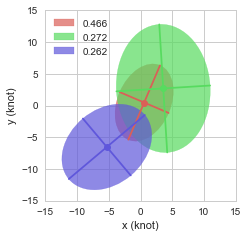

In [57]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [58]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWuQK2d5Lvp0S63LaDT3+yzNmtEsGxubBTYhGAzZGycO
7JzsvXZgHROvbXuXNyYV52w4MbmRUHaoxFxSIT5J5WAH4lx2mbCNwbkUBeeEEJzjFLWLgFccB+NF
vOYqjUYaXUZ3qaW+nB9aX8/XrW6pu9Wakcb9VLlgzai7P2m6H73f+z7v8zKyLMtw4cKFi1MK9qQX
4MKFCxf9hEtyLly4ONVwSc6FCxenGi7JuXDh4lTDJTkXLlycargk58KFi1MNl+RcuHBxquGSnAsX
Lk41XJJz4cLFqYZLci5cuDjVcEnOhQsXpxouyblw4eJUwyU5Fy5cnGq4JOfChYtTDZfkXLhwcarh
kpwLFy5ONVySc+HCxamGS3IuXLg41XBJzoULF6caLsm5cOHiVMMlORcuXJxquCTnwoWLUw2X5Fy4
cHGq4ZKcCxcuTjVcknPhwsWphvekF+Di5CHLMhqNBgRBgMfjAcdxYFkWDMOc9NJcuOgZjCzL8kkv
wsXJged5FAoFhMNhNJtNAEAikcDk5CTC4TBYlnVJz8VQw43kXsMQRRG1Wg3pdBqhUAiCIIDjOMiy
DFmWIYoiBEFAo9EAwzDweDwu6bkYOrgk9xqELMsQBAGiKIJhGIiiiI2NDYiiCK/XC0mSUK1W4ff7
4fUe3SKE9HieB8uy8Hg88Hg88Hq9Lum5GFi429XXGCRJQrPZBPmz7+/vI5fLYWVlBT6fD41GA8lk
EgzDoNlswuv1YmRkBMFgECMjI/B4PKrzkfMwDKOQndfrbXudCxcnBTeSe42AbD9FUQQACIKAeDwO
SZLAcRzC4TAajQYCgQA4jsP4+DhCoRB4nke1WkWhUEAqlVJIjxAfTWaCIECWZfA875Kei4GBS3Kv
AUiSBEEQIEkSGIZBqVTC3t4epqamMDY2ht3dXdXrGYaBLMtgGAaBQACBQABTU1OQZRn1eh21Wg35
fB7JZBIcxymE14n0WLalVmo2mxgbG3NJz8WxwSW5Uw6SRyPFhGQyiWKxiEgkokRqZjMWDMMoZEaT
XrVaRT6fx/7+Pnw+n2p7S8hNlmXUajUcHBwoBQzyv26k56KfcEnulEK7PW00GojFYvD5fFhfX1cK
Cr0UC2jSA1oRI4n0Dg8Psb+/D7/frxAeOYZEitpIzyU9F/2AS3KnENrt6eHhIZLJJObm5jA1NdVG
bNpIjpCQVbAsq+TrpqenFdKrVqvI5XKo1+sAgEwmo5AjHem5pOeiH3BJ7pSB3p5KkoT9/X3UajWs
ra0hEAi0vb6fsg+a9ACgUqng4OAAAJDNZsHzPAKBgBLpBQIBl/RcOA6X5E4JZFlGKpXCyMgI/H4/
6vU6YrEYQqEQ1tfXFfIwOhboL+EBLdJjWRYzMzMAWhFnrVZDtVpFJpNRSI/k9MySns/nczV6Lgzh
ktwpANG+HR4ewuv1olQqIZ1OY2lpCePj4x2P1SMHu9vVbtBei2VZhEIhhEIhAEcdGKQLo9FoKNta
EumRc2hJr9FoQBRFTE5OguM4l/RcKHBJbshBOhcIyHZwfX0dPp/P1DkGRQ/u8XgwOjqK0dFRAEek
V61WcXBwgGaz2RbpETIjBY9gMIh6va7qyHBJ77UNl+SGFNrWrHK5jFqthnA4jEgkYvqhNnrdIBBf
J9JLpVIQBEEhPUL02kiv2Wy6pPcah0tyQwi6uAAAqVQKh4eHCAQCmJiY6PkBHlQC0JKeIAgK6ZXL
ZUUyQyI9v9/vkp4Ll+SGCVrtW7PZRDweB8MwWF9fRyKRsHzOfuXfjgNerxfhcBjhcBh+vx+1Wg2j
o6OKOFkURSWfNzIyoipQ0KRHChmE+FzSO11wSW5IoNW+FYtF7O3tYWZmBjMzMyqRrRMYRuJjWVYh
PaAV6VWrVaUNjY7ytKQnSZJSwKFJz+v1wuv1uqQ3xHBJbgggiqJiaCnLMvb391EqlXD27FlFgwbY
i8roPlX6Z8MGvfft9XoxNjaGsbExAK3Il2xv8/k8JElSRXp0BEeTXrPZRKlUwvz8vEt6QwiX5AYY
2uIC0b4FAgGcO3fOFcRq0I14OI4Dx3Eq0iORXi6XgyzLqkiPkB6JCMn2lmEYN9IbIrgkN6Cgt6cA
kMvlkEqlMD8/j8nJScf0beQ8xWIRhUIBwWBQaeY/7SCWUuPj45BlWRXp5XI5AEAwGFSMROmIl470
XNIbbLgkN4A4PDyEx+OB3++HJElIJBKo1+uGrVkEdkiOkOj+/j7Gx8dRLpdRqVTAsiyazaaylTvt
USPDMPD5fPD5fCrSq1arKJVK4HkeW1tbupEe4JLeIMMluQEC2Z5mMhmMjY1BFEXEYjGEw+GurVl2
QJxJACAajSoESQTFHMehWCwilUqB4zjl4db6xg0CnI48adLjOA65XA7z8/OoVquoVCrIZDJgWVb1
mRiRHgDVfAyPx+OS3jHCJbkBAa19I9XTSqViqjWLwEokR6qzs7OzqNVq8Hg8EAQBAJR5DZOTk5ic
nFT5xtEWSiTKo3tMTxL9Ig5ZlpUeWZ/Ph4mJCWWMI9HoEZ88upBBR3Au6Z0cXJI7YWi1b6IoKttF
K61ZgDmSkyQJqVQKxWJRqc4eHBx0PI72jdNaKGkb67U9pqcVDMPA7/fD7/crXwSE9EqlkkJ6tFW8
Eeml02lMTEwgFAopDiun/fM7Trgkd4IwsiX3er2YmJiwRHBmQLanXq+3p+qs1kKJTPcizr90jylx
RRnmh1YrsdGDHunxPI9araZs+b1er2p7S0ivXq8rldtGowEAbfMxhvnzO2m4JHdC0LZmJZNJ5PN5
nDlzBsVi0dZN3SmSKxQKSCQSmJ2dxfT0dJsujjzI9P+aBcuybT2m1WoV1WoVyWQSgiAoiXptlXIY
YCffR8/HoElPbygQXUUnnwuJ7rUzb13Ssw6X5I4ZWu1bs9lURVfEKsnug6U9TpIkJJNJXfFwv+Dx
eHQ7D0qlEprNJjY3N5Uoj5Bfr+g3cTrRD2w0FEgURWU+hra445Je73BJ7hih3Z4aRVe9tGfRx/E8
r8x16LY97acujnQe+P1+NJtNLC8vK5FeJpMBwzAq0qMHWg8C+kGgdJ6zWCxiYWEBsiwbDgVySc8+
ButuOsWgfd9kWUYikUClUsHq6qoyCIbALsnRxxECNZrroD1O+2+yfeoHtCJcbZWSzl29FjR6dPXW
7FAgMh/DJb3ucEmuzzBqzQoGg1hfX9d9gHshOVEUkUgkUCqVdAm00zpP4kEwStjTuSsy25V+uPXW
3y/0+7PRO7+ZoUBExkMPBaJJTxAENBoNJBIJLC8vg+O41yTpuSTXR9CN9UBreMvBwQEWFhYwOTlp
eJzdSEoUReTzeYRCIUvV00G64Y1yV3oPt1ajN0jvwwrMkKheRZt8Lt2GApG8H4ma6UiP4zgVOZ5G
uCTXBxDt28svv4xz584BABKJBBqNBqLRKPx+f8fj7URyhUIB2WwWIyMjlpyB6TU7kRN0GnoaPTIH
gmj0SL8tx3F9ibpOIpLrBj3S0xsKFAwG2yq3gDrSO+2k55Kcw9A21lcqFSSTSYyNjeHMmTOmOgOs
kAypnpbLZYUErN6gw3RDGw2/yWazqFQq2NjYMDTKPM3Qfi406QHA5uZmR8G2Hul5PB5FrzfMn6FL
cg5Cq30jzfXLy8uKvY9ZmCE5unq6vr6OQqGAWq1ma+3a6w1KJNcNxBK9Xq+DYRiMj4+rPOOIUaae
Z5xZDGIk1w2E9ILBIPL5PKLRqBIBHxwcdJyEBhzdy1qr+GEkPZfkHADZngqCoPiPxeNxyLKMlZUV
RSRrFmYiOSI

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX9UVVXax79w4Sq/1CEVTEURMU3FMEeddFIpotXSpCAI
Eldqb8mYhjUKWWIp/hrTtWa5wlmj1TviOIo0K2utmakGLSddWkJIISjwCiiCgsR4AeXiufv9A8/h
3HPPr3u599xf+7PWXck5Z5/7HDpfnmfv/exn+xBCCCgUilvj62wDKBRK/6FCplA8ACpkCsUDoEKm
UDwAKmQKxQOgQqZQPAAqZArFSkwmE3Jzc5GamoqMjAzU19ebnT9x4gSSkpKQmpqKwsJC2TY1NTVI
S0vDiy++iJycHNy7dw8AUFhYiOeffx4pKSk4efKkslGEQqFYxZdffkmys7MJIYT8+OOPZOXKldw5
o9FInnzySdLe3k66u7vJ888/T1paWiTbZGZmku+//54QQkh2djb56quvyM2bN8nChQtJd3c3uX37
NvdvOfzs+7eKQvF8SkpK8Nvf/hYA8Mgjj+Dnn3/mztXW1iIiIgKDBw8GADz66KP44YcfUFZWJtpm
79690Ol0MBqNaGlpQXBwMMrLyxEbGwu9Xg+9Xo+IiAhUVVUhJiZG0iZNhdzT04MNGzagsbERRqMR
mZmZGD9+PHJycuDj44Po6Ghs2rQJvr7yEX9JSYlGFlPclUcffVTxmrKyYjDMENFzer0eU6dOFT3X
0dGB4OBg7medTod79+7Bz88PHR0dCAkJ4c4FBQWho6NDtk1jYyOWLVuG4OBgTJw4EadOnRK9hxya
Cvnzzz/HkCFDsGvXLrS3tyMxMRETJ05EVlYWZs2ahdzcXBQXFyM+Pl7xXkc39/UbDIYOhIQEy1zt
2Xj78wPmv4PU3AWq2jDMEIyM2CZ6rrFhg2S74OBgdHZ2cj+bTCb4+fmJnuvs7ERISIhsm5EjR+Kr
r77CsWPHsGPHDjz11FOi95BD08Gup59+Gm+88QYAgBACnU6HiooKzJw5EwDw+OOP48yZM1qaRKFY
zfTp03Hq1CkAQFlZGSZMmMCdi4qKQn19Pdrb22E0GnH+/HnExsZKtlm5ciXq6uoA9HpeX19fxMTE
oKSkBN3d3TAYDKitrTX7DjE09chBQUEAekOTNWvWICsrCzt37oSPjw933mAwqLqXwdAh+7O34e3P
D2j3O4iPj8fp06fx4osvghCCbdu24YsvvkBXVxdSU1ORk5ODFStWgBCCpKQkhIWFibYBgFdffRU5
OTnw9/dHQEAA8vLyMGzYMGRkZCA9PR2EEKxduxYDBgyQtUnzwa6mpiasWrUK6enpWLRoEXbt2sWd
6+zsxKBBg1Tdhx9Kento6e3PD2j7O/D19cXmzZvNjkVFRXH/jouLQ1xcnGIboNe7HzlyxOJ4SkoK
UlJS1Nuk+ko70NraiuXLl2PdunVITk4GADz88MM4d+4cAODUqVOYMWOGliZRKB6BpkL+05/+hNu3
byM/Px8ZGRnIyMhAVlYW9u7di9TUVPT09CAhIUFLkygUj0DT0Prdd9/Fu+++a3H80KFDWppBoXgc
NEWTQvEAqJApFA+ACplC8QCokCkUD4AKmULxAOjqJw+lpvWOquvGDw1wsCWuza271c42wS5QIXsQ
QvFGTY1QbvNTg9nP3ibsOswXPR6urRn9hgrZzalpvQOGAXTdd1QJVwi/Te1PDdwfA28TtLtDheym
8L3viKihisvc1MAXNeupqaDdAypkN4MvYFZ4aleMWQN7bypo94COWrsJNa13OBFHTY2wKYy2BU7Q
KgfPKM6BemQXR8wDa03U1Ajaf3ZxqJBdFFcQMB/WBlbQ3ixmk8mE9957D5cuXYJer0deXh7GjBnD
nT9x4gQ+/PBD+Pn5ISkpCSkpKZJtKisrsWXLFuh0Ouj1euzcuRNDhw5FXl4eSktLuWIc+fn5suMg
VMguCD+EthcV7e0AgMlDxIvNqYV6Z+Df//43jEYjjh49irKyMuzYsQP79u0D0Ftgcvv27SgqKkJA
QADS0tIQFxeH0tJS0TZbt27Fxo0bMWnSJBw5cgT79+/H22+/jYqKChw4cAChoaGqbKJCdiHsIWBW
sEKiJoSj9nKz6Hlrxe3t3tme5XD37NmD4cOHAwAYhsGAAQNgMplQX1+P3NxctLa2Ijk5mSvEIQUV
sgvQ3zD6itEIHU+gURPE0xnEjvPFbYugvdE727McLivi0tJSHDp0CH/961/R1dWFJUuWYNmyZWAY
BkuXLsWUKVMwceJESZuokJ1Mf7xwhQrxKsFvV3G5GYB1gvZG72zvcrj/+Mc/sG/fPvz5z39GaGgo
J96AgN7f5ezZs1FVVSUrZDr95ERsFXFFezsn4qgJ4RgxSl3BQiWiJoQjakK42f1Vt/WiaSp7lsM9
fvw4Dh06hIKCAowePRoAUFdXh7S0NDAMg56eHpSWlmLy5MmyNlGP7CRsETFfvI5E2J9W66G9JYnE
XuVwGYbB1q1bMWLECKxevRoA8Otf/xpr1qzB4sWLkZKSAn9/fyxevBjR0dGyNvkQQogWD29PSkpK
3HqnCWtFrCRgg8Fg1i8rN7TK3i8mZKiq7wV6+9CA9f3nWo3FLNxpQs2WMSUlJTgXvEX03KyOjaru
4SpQj+wk1IhYbR+4humCztBtdiw6crjk9eVXbnL/VhI13ztb23d2h37zf02POdsEu0CFrDFq+5Bq
wmi+55UTrhD+tWpEzdpg7WAYK2aK46GDXU5AyRsribjc0IpyQyuiI4cjOnI4RobZ3q1g78G/rxSc
oK0cCPOGATBnQz2yhqh5oeVEzIpMyfte6GoRPT4tcJhkG/ae1VduotzQKuudrQm1qVfWBipkjZHz
xraKuBod0HXdNTs2cZS5aKuutVgIXEzY0ZHDOTED4uG2LWKu+anBpfvK7o5ThHzhwgV88MEHKCgo
QH19vdUbnXsiUiKWEjBflBGhwYqFBeSELRS0Gu9s6yAYxTForpj9+/fj3XffRXd37yjr9u3bkZWV
hcOHD4MQguLiYq1N0gS5sNpWEU8cNcxCoGrht73QZemt+d8r1W929Hw2RT2ae+SIiAjs3bsX69ev
BwCLjc5Pnz6N+Ph4xfu42/7IDNNbkkesmgfDMBgxapDZuRqmCwAwMiyYO16N3meMCO0d3OJfX3rn
mio7ou8NNvt55OCBAICGtg6UGpoQDfOBs/ChAWi80YEf229gvC7Q4n7DRwSh/NotROr1st87fOyv
cKm2FQ9a3sJuuPo74Eg0F3JCQgKuXet76QghNm107m77I+u674iGvxXt7dDpdBYJHTqdzswTX+hq
gQ5+Fh74grEJDMNAp9NhUri8d65sbsH/6Xpf9mn6EWbnJoeEoOpaC/4PvX1tfrg9MSQE1Vdu4gq6
RcPsm7pONDCMYoh9U/cLQkIc0092h3fAkTi9M8rvD1uz0bk7UdMqX+FSLEQVihgw7+deMDbhgrEJ
k8KHYeygIEURA8Ck8GHch23PRxhui9kjFmbTENv5OF3I3rzRudh8LDs/zCIUMV/AQvE2kDrJjxC2
rZSg+d/NojTtZe38MsV+OF3I2dnZHr3RudLcMd+bCb2dmIgBmAm4gdShZeBNTqyTQ8MsPux1QkHz
/xhYI+b+eGWaHOIYnDL9NGrUKBQWFgIAIiMjPX6jc7GwWsp7sV5PrYgBIDIwBCHB0tNPrJgBoKKt
t02Ez1ju2KTwYahsbsEFY5NZ33niqGGouiaeXGILrpgccul2k+jxp9wsw8LpHtmbEXpjYegqJWK+
d+WLVA2slxZ6aDnPrNYrA+4XXvuZpop+3A0qZAciNcglfNmlQmo+fBEDMAubAeCe70+yHyH8kFv4
HUIxS9kkxFs

## Goodness-of-fit Statistics

In [59]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.964  0.028      0.022  1.978616e-08      0.047       0.267

In [60]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [61]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [62]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.572367357751791
     jac: array([  2.17073250e+00,  -2.38418579e-07,  -2.38418579e-07,
         2.38418579e-07,   4.76837158e-07,  -1.19209290e-06,
         2.17072821e+00,  -2.38418579e-07,   2.38418579e-07,
         2.38418579e-07,   2.38418579e-07,   7.15255737e-07,
         2.17073250e+00,   0.00000000e+00,  -2.38418579e-07,
        -2.38418579e-07,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1949
     nit: 96
    njev: 96
  status: 0
 success: True
       x: array([ 0.52072923, -1.37714638, -2.39453502,  8.30226381,  8.88727909,
        0.52260227,  0.38902811,  2.01277021,  2.29409491,  4.7658042 ,
        7.45100641, -0.13617505,  0.09024266, -4.08045322, -4.27145635,
        3.77850464,  3.2845288 , -0.22210608])

## 6.1 GMM Result

In [63]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.521  -1.377  -2.395  8.302  8.887   0.523
2  0.389   2.013   2.294  4.766  7.451  -0.136
3  0.090  -4.080  -4.271  3.779  3.285  -0.222

GMM Plot Result
0.520729228932 [[-1.37714638 -2.39453502]] [  5.92192976  10.62271443] 138.714616916
0.389028109343 [[ 2.01277021  2.29409491]] [ 4.69200888  7.49769557] -171.786948821
0.0902426617257 [[-4.08045322 -4.27145635]] [ 3.04475022  3.97425753] -118.835783754


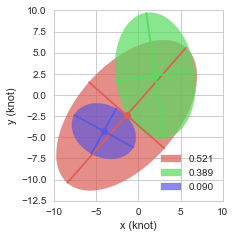

In [64]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [65]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.010      0.042  3.161032e-09      0.019       0.107

In [66]:
# Empirical Power
pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(2001, 2006)    0.035169  0.046551  1.713051e-08    0.045951     0.247594   
(1991, 1996)    0.012929  0.027305  6.138173e-09    0.026056     0.147594   

              R_square  
year_lim                
(2001, 2006)  0.967545  
(1991, 1996)  0.988982

In [67]:
%%time
# Solid is Empirical, Dash is against previous data
fig1, ax1 = plt.subplots(figsize=(3,2.5))
fig2, ax2 = plt.subplots(figsize=(3,2.5))
gofs_mean_set_bivar_previous = []
prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
for year_length in [10]:
    color = next(prop_cycle)

    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    gofs_bivar_previous=Parallel(n_jobs=-1)(delayed(gmm_gofs_in_previous)(df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)], gmm_pdf_result, config) 
       for sub_start_year in arange(start_year, end_year+1)) 
    gofs_bivar_previous=pd.DataFrame(gofs_bivar_previous, index=arange(start_year, end_year+1))    
    
    gofs_bivar_set[year_length].plot(y='R_square',ax=ax1, style='--', color=color, label='')
    gofs_bivar_set[year_length].plot(y='K_S',ax=ax2, style='--', color=color, label='')
    gofs_bivar_previous.plot(y='R_square', color=color, ax=ax1, label=year_length)
    gofs_bivar_previous.plot(y='K_S', color=color, ax=ax2, label=year_length)
    year_lim = end_year-year_length-5, end_year-year_length
    gofs_mean = gofs_bivar_previous.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set_bivar_previous.append(gofs_mean)
    
plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar_previous).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOUAAAC3CAYAAADtj5nqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXlAVWX6xz/3Xi77IgiiqCCLoKKAgCi5ZplamgumI2Zm
WuNkVlambVraVNPM6K+aKVNzKm1TM81yKRW1ADdUQDZlVVxYZF8u3OX8/iBJhQsXZOf9/JX3vOec
5+3yve85z/ssMkmSJAQCQZtB3toGCASC2xGiFAjaGEKUAkEbQ4hSIGhjCFEKBG0MIUqBoI3RaqKM
jo5m7ty5NT4/fPgwISEhzJo1i23btgGg0+lYuXIls2bNYu7cuWRkZLS0uQJBi2HUGjfduHEjP/74
I2ZmZrd9rlareffdd9mxYwdmZmbMnj2bsWPHcubMGSorK/nuu+84d+4c7733Hp988klrmC4QNDut
slI6Ozvz0Ucf1fg8JSUFZ2dnbGxsMDY2JiAggFOnThEVFcXIkSMB8PPz4/z58y1tskDQYrTKSjl+
/HgyMzNrfF5SUoKVlVX1vy0sLCgpKaGkpARLS8vqzxUKBRqNBiMj/eZHRUU1rdECQRMTEBBQ6+et
Ikp9WFpaUlpaWv3v0tJSrKysanyu0+nqFORN9E06KipK77GOjJh363HhUj5f7o1nxWNDsDQ3rnPR
aFPeV3d3dzIyMigoKKCyspLTp08zePBg/P39OXbsGADnzp3D09OzlS0VCAwnPu0Gr6+PIDY5l/j0
vHrHt4mVcs+ePZSVlTFr1ixWrFjBggULkCSJkJAQHB0dGTduHOHh4fzlL39BkiTeeeed1jZZIDCI
mOQc1nx2ArVGx7K5gQQN6F7vOa0myl69elVveUyePLn687FjxzJ27NjbxsrlclavXt2i9gkEd8vZ
pGze3nwCnQSvzBvC0IE9DDqvTayUAkFHxMHWjC7Wpjwd4kNAP0eDzxOiFAiaiV7drFi//D6URg1z
3bQpR49A0BHYF5HGJ99HU1qubrAgQYhSIGhS8otUfP5zPEfPZFKp0TbqGkKUAkET8tmPcZSpNDz2
0ABsrUwbdQ0hylbi1oD8jIwMZs+eTWhoKKtWrUKn07WydYLGEH0hh6NnM+nbuwvjh/Vp9HU6raNn
8544wqOvNOk1h/v25InJ3vWOuzMg/9133+X5559n6NChrFy5kkOHDjFu3LgmtU3QvEiSxIbdschl
8PQMXxRyWaOvJVbKVuDOgPy4uDiCgoIAGDVqFBEREa1lmqCRyGQyXn40kKemDsKjV5e7ulanXSmf
mOxt0KrWHNwZkC9JEjJZ1S+rhYUFxcXFrWKXoHGoNVqURgpceljj0sP6rq8nVso2gFz+59dQWlqK
tfXdf7GClkGSJN7+30n+ueU0FerGeVvvRIiyDTBgwABOnDgBwLFjxwgMDGxliwSGUFhSwYYfYjmT
mE1RaSXGjdiTrI1O+/jalli+fDlvvPEGa9euxc3NjfHjx7e2SYI6UFVq+P5wMruPJVNeoaWbrRlP
z/CtfgW5W4QoW4lbA/JdXV3ZunVrK1sk0Gh1KOQyZDIZV3NKOHr2Cl7Otng6d8HS3Lj63V8uk3Hw
ZAYmSiPmThzAhGAXlEaKJrNDiFIgAHQ6iX9tjcLc1IinZ/gSfTGHrw8kVh/vYW+BmYkR/3p2JMZK
BW8sGIaTvQWmJg2TUH6Riq8OJBLspn+MEKVAAHy5N57wmKt4u3VFkiSG+/akq40ZSZfyuZCRz8XL
+eQVqUjJLKRfHzvceto0+B4n467z4bazFJZUEuzWS+84IUpBp+fA8XS+D0vGyd6CVx8PQmmkQGmk
IMi7O0HeVUnJOp2EJEkoFA135qgqNHy2J479kekojeQ8OXUgUKB3vBCloFNzNimbj7+PwdrCmFVP
DsPawrjWcXK5DGi4Iyf5cgH/+iqKKzkl9OlhzUtzAnDpYV1njR4hSkGnplSlxsxYwWvzg3Cyt6z/
BAORJIkdhy/y1f5EtDqJqaPdmTuxP8bK+h1CQpSCBnGjsJzMrBJ8PR1a25S7QqeTkMtljPDtiZ9n
NyzNlE16/aNnr/Dl3gTsrE1ZOnswfp7dDD5XBA8IDEaSJN7ceJzXP43gVPz11jan0VzNLWHZR8c4
fPoyQJMLUqvV8c2BRIwUMv7xzIgGCRKEKAUNQCaT8fikAQB8sjOG8gpNK1vUMLQ6id3HUljyryNc
uFRAYkb95R4bQ1jUZa7mljIuyIXuXS0afL4QpaBeNFod+yPT0ekkAvo58sh9fcnJL79tH6+tk5ld
zCv//Z1Nu89jaqzg5bmB/G26T5PfR63R8c0vSSiN5My8v3H1iYUoBXUiSRIf74jmvzui+eFIMgCz
xnnRw96CH39LJSVTv2u/LXHhUj4J6XmM8HXi45fHMtKvZ5OFxd3KwZMZZOeXMzG4D/ZdzOo/oRaE
o0dQJ9sOXeDXk5fw6GXDg8NdATBRKng6xIfTCdk4OTSdx7KpKSqt5HxKLibAvQG9cbSzwNuta7Pd
r1Kt5buDFzAxVjBjbN9GX0eIUqCXsKjLbN2XSDdbM1YuGIbZLSFlfp7dqh0Yt+aDthUkSeKDb88S
k5zD0w92QyaTNasgAfZHpnOjUEXIvR7YWjeuPg+Ix1eBHgqKK/jP9mgszJSsWjhM7x9ZXOoNXvzg
GDn55S1sYd389HsaJ+Ov4+Vii6VZ8/+Zqyo0bD90ETMTBdPGeNzVtVpclPV1Zd61axeTJ08mNDSU
7du3A1BZWcmLL77IzJkzeeKJJ0hPT29pszsdXaxMePXxIbz2eBDO3fUnXV/LLeHi5QI+/SGmBa2r
m9QrhWzeE4e1hTFLZ/sjb4FV/OfwNApKKnh4lDs2liZ3da0WF+XBgweruzK/+OKLvPfee9XH8vLy
+PDDD9myZQtbt25lz549ZGZmsm3bNszNzdm2bRuvv/46a9asaWmzOxVFpZUABPRzZJCHfZ1j7xvi
zED3rpyIu05k7NWWMK9OVBUa3t9yGo1Wx9LZ/nS1aZyzpSGUqdR8H3YRCzMlU0ff3SoJrSDKuroy
Z2Zm4uXlRZcuXZDL5QwaNIjo6GiSk5MZNWoUAG5ubqSkpLS02Z2G3IJyFv79F7bsSzBovEwm4+kQ
X4wUctbvjKWkXN3MFtaNXC7Dz9OBh0e5Edjf8P4dd8OPv6VSXKZm2hj3JglEaHFHT11dmV1cXEhO
TiY3NxcLCwsiIyPp06cP/fv3JywsjPvvv5/o6GiysrLQarUoFHXHEdYV9NtZOz3XN+8fIvMor9BS
UZxDVFSZwdcdMcCSI7FFfPzNb9zn2/C0pvqQJImTF0pJy1Ix2N0Cr541V8CbDqchLlX/fetcm+v7
Lq/UsePQNcxM5PS2LGqS+7S4KOvqymxjY8Mrr7zCkiVL6NKlC97e3tja2jJmzBhSUlIIDQ3F398f
b2/vegUJopPzndQ37+TMAmLSM3F1smb+jJENql3qN1jCKyKN8cP6NKp/Rl2UqdR8+N05wmOq9kS7
O9oT+sc8issqsTI35vqNUv7x5Sn+FuKLp7Ptbec31/edV6TivS9OUaGWmD+pP/cMM3wbpE1lifj7
+xMWFsaDDz5YoyuzRqMhPj6er7/+GrVazfz581m6dCmxsbEEBwfz6quvEhsby9Wrrf/u0tGQJIn/
7YlDkmDB5IENLiaskMuYNKIqnb6wpIIfjiTz6MT+GDUi//BWLl0v4p3PT3ElpwRvt67MmdCPrn94
glOvFPLiB0cZ7tOTq7klJGcWcul6cQ1RNgeJ6Xm8+8VJ8ooqGOXXk8kj6ygl0EBaXJS1dWW+tZMz
wLRp0zAxMWH+/PnY2dkB8MEHH7B+/XqsrKz4+9//3tJmd3guXS/mfOoNAvs73nUGyNb9idV7dktn
+/+Ri9g4KtR

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  \
year_lim                                                                    
(1991, 1996)    0.035291  0.027107  9.151379e-09    0.029662     0.181063   

              R_square  
year_lim                
(1991, 1996)  0.983993

Wall time: 16 s


In [68]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQ7NZ9LvYBaPQ6Pfu+L/eSlEhTomSKVDG2RLoky+/5
1Y0svmuRoehQYmzRiVyiyyXTySPlWNT2nFCqOJZkmS95KdIqmhLjcjl2PW+SQ5mOtfCKok3qkvfO
0rP0Pr2vQAPIH30P5jQa6AbQ6JnpufiqWJw70wcH3Q18+K3fj1EURYELFy5cnFGwJ30CLly4cNFP
uCTnwoWLMw2X5Fy4cHGm4ZKcCxcuzjRcknPhwsWZhktyLly4ONNwSc6FCxdnGi7JuXDh4kzDJTkX
Llycabgk58KFizMNl+RcuHBxpuGSnAsXLs40XJJz4cLFmYZLci5cuDjTcEnOhQsXZxouyblw4eJM
wyU5Fy5cnGm4JOfChYszDZfkXLhwcabhkpwLFy7ONFySc+HCxZmGS3IuXLg403BJzoULF2caLsm5
cOHiTMMlORcuXJxpeE76BFycPBRFgSAIaDQa4DgOPM+DZVkwDHPSp+bCRc9gFEVRTvokXJwc6vU6
8vk8wuEwRFEEAESjUYyNjSEcDoNlWZf0XAw0XEvuOoYkSahWq0ilUgiFQmg0GuB5HoqiQFEUSJKE
RqMBQRDAMAw4jnNJz8XAwSW56xCKoqDRaECSJDAMA0mSsLm5CUmS4PF4IMsyKpUKfD4fPJ6jS4SQ
Xr1eB8uy4DgOHMfB4/G4pOfi1MJ1V68zyLIMURRBvvZYLIZMJoPl5WV4vV4IgoB4PA6GYSCKIjwe
D4LBIAKBAILBIDiOazkeOQ7DMCrZeTyette5cHFScC256wTE/ZQkCQDQaDSwv78PWZbB8zzC4TAE
QYDf7wfP8xgZGUEoFEK9XkelUkE+n0cikVBJjxAfTWaNRgOKoqBer7uk5+LUwCW56wCyLKPRaECW
ZTAMg2KxiIODA4yPj2N4eBi7u7str2cYBoqigGEY+P1++P1+jI+PQ1EU1Go1VKtV5HI5xONx8Dyv
El4n0mPZZrWSKIoYHh52Sc/FscEluTMOEkcjyYR4PI5CoYClpSXVUjMbsWAYRiUzmvQqlQpyuRxi
sRi8Xm+Le0vITVEUVKtVJJNJNYFB/u9aei76CZfkzii07qkgCNjb24PX68XGxoaaUOglWUCTHtC0
GImll81mEYvF4PP5VMIja4ilqLX0XNJz0Q+4JHcGoXVPs9ks4vE4pqenMT4+3kZsWkuOkJBVsCyr
xusmJiZU0qtUKshkMqjVagCAdDqtkiNt6bmk56IfcEnujIF2T2VZRiwWQ7VaxdraGvx+f9vr+1n2
QZMeAJTLZSSTSQDA4eEh6vU6/H6/aun5/X6X9Fw4DpfkzggURUEikUAwGITP50OtVsPe3h5CoRA2
NjZU8jBaC/SX8IAm6bEsi8nJSQBNi7NaraJSqSCdTqukR2J6ZknP6/W6NXouDOGS3BkAqX3LZrPw
eDwoFotIpVKYn5/HyMhIx7V65GDXXe0G7V4syyIUCiEUCgE46sAgXRiCIKhuLbH0yDG0pCcIAiRJ
wtjYGHied0nPhQqX5AYcpHOBgLiDGxsb8Hq9po5xWurBOY7D0NAQhoaGAByRXqVSQTKZhCiKbZYe
ITOS8AgEAqjVai0dGS7pXd9wSW5AoW3NKpVKqFarCIfDWFpaMn1TG73uNBBfJ9JLJBJoNBoq6RGi
11p6oii6pHedwyW5AQSdXACARCKBbDYLv9+P0dHRnm/g00oAWtJrNBoq6ZVKJbVkhlh6Pp/PJT0X
LskNErS1b6IoYn9/HwzDYGNjA9Fo1PIx+xV/Ow54PB6Ew2GEw2H4fD5Uq1UMDQ2pxcmSJKnxvGAw
2JKgoEmPJDII8bmkd7bgktyAQFv7VigUcHBwgMnJSUxOTrYU2TqBQSQ+lmVV0gOall6lUlHb0Ggr
T0t6siyrCRya9DweDzwej0t6AwyX5AYAkiSpgpaKoiAWi6FYLGJlZUWtQQPsWWV0nyr9u0GD3vv2
eDwYHh7G8PAwgKblS9zbXC4HWZZbLD3agqNJTxRFFItFzMzMuKQ3gHBJ7hRDm1wgtW9+vx/nzp1z
C2I16EY8PM+D5/kW0iOWXiaTgaIoLZYeIT1iERL3lmEY19IbILgkd0pBu6cAkMlkkEgkMDMzg7Gx
Mcfq2+gYVS/HGUQQSamRkREoitJi6WUyGQBAIBBQhURpi5e29FzSO91wSe4UIpvNguM4+Hw+yLKM
aDSKWq1m2JpFcL2QUz/AMAy8Xi+8Xm8L6VUqFRSLRdTrdWxvb+taeoBLeqcZLsmdIhD3NJ1OY3h4
GJIkYW9vD+FwuGtrVi9gGEa9QWm580GC0+ROkx7P88hkMpiZmUGlUkG5XEY6nQbLsirhBQIBQ9ID
0DIfg+M4l/SOEYN5RZ9B0LVvJHtaLpdNtWYR2LXkFEXBzs5OS1bR6/VCFEXwPG/5eCeFfhGHoijq
Z+L1ejE6OqqOcSQ1ekQnj05k0BacS3onB5fkThja2jdJklAul8GyrKXWLMAeyRUKBQBAOBzG4uIi
RFFEMpmEIAiIRCLgOE69afVmPFyvYBgGPp8PPp8PY2NjLaRXLBZV0qOl4o1IL5VKYXR0FKFQSFVY
cUnPObgkd4IwkiX3eDwYHR21RHBWQVRL8vk8GIbBxMQEJEmC1+tVe0LHx8dRr9dRrVZRKBSQSCQ6
yp2fVWhLbPSgR3raz87j8bS4t4T0arWamrkVBAEA2uZjuKRnHy7JnRC0rVnxeBy5XA6Li4soFAq2
LmqzlhxRCfZ4PNjY2MCVK1fUG1n7fzLjgdy4RASTVv4l1gotjXSWYCcEoPfZGQ0ForPo5Hsn1r12
5q1LetbhktwxQ1v7JoqiSjjnzp1TpZLs3ljd1ul1Slg5PrHgtMq/Wj04rTQS/f77ATPWVi9woh/Y
aCiQJEnqfAza0qPJzCU9+3BJ7hihdU/z+Tyi0SimpqYwMTGhXqi9lIIYraPdU22nRKd1naBV/tVT
CaED8YOKfhAo/cAoFAqYnZ2FoiiGQ4Fc0rMPl+SOCbTum6IoiEajKJfLWF1dVQfBENglOaN1WvdU
WyaivSFISYlVdFIJIb2jAJDL5drqzK5n0Nlbs0OByHwMl/S6wyW5PsOoNSsQCGBjY0M3cN8LyWnJ
yax72g9rhVYJAZozHuLxOGq1mtpRQGcfeylX6WcRdL9dYb3jmxkKROKh9FAgmvQajQYEQUA0GsXC
wgJ4nr8uSc8luT6CbqwHmsNbkskkZmdnMTY2ZrjOriVFkyM9Y1XPPdWuOw6QG4y4ZqSjoFQqIZVK
tdzYJPtoBYN645ohUW1ogCa9bkOBSNyPlLnQlh7P8y3keBbhklwfQGrfXnvtNZw7dw4AEI1GIQgC
1tfX4fP5Oq7vtT2rm3tqdM5OxATNgu4o0BbX0uUq2kD8SeAkLLlu0CM9vaFAgUCgLXMLtFp6Z530
XJJzGNrGeuKiDQ8PY3Fx0VSJRS/uar1ex+bmZlsyo9u6k4Zendn1WK5iF9qhQDTpAcDW1lbHzLce
6XEcp9brnYZrxC5cknMQ2to30ly/sLCgyvuYhVWSUxQFhUIB1WoVq6urlrOZ2v1OutHfarlKP62t
02jJdQMhvUAggFwuh/X1dXUSGuloMZqEBhxdy1qp+EEkPZfkHABxTxuNhqo/tr+/D0VRsLy8rGYb
zcKqJUfcU1mWEQ6HLROcXnb1tKFTuUoymUS9XlddLa3q72nHcRC0laFA9CQ0bSKjXq+DYZi2jozT
DJfkeoRRa9b4+DgajYatC8DKBU+yp1NTU2BZVnVPzjq0N20ikYAsyxAEoUXqXE/11yr6TUJAf8UF
9I6tR3pEQJS

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAAC3CAYAAAAo/QN7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX9UVVXax79w4Sq/1CEVTEURMU3FMEeddFIpotXSpCAI
Eldqb8mYhjUKWWIp/hrTtWa5wlmj1TviOIo0K2utmakGLSddWkJIISjwCiiCgsR4AeXiufv9A8/h
3HPPr3u599xf+7PWXck5Z5/7HDpfnmfv/exn+xBCCCgUilvj62wDKBRK/6FCplA8ACpkCsUDoEKm
UDwAKmQKxQOgQqZQPAAqZArFSkwmE3Jzc5GamoqMjAzU19ebnT9x4gSSkpKQmpqKwsJC2TY1NTVI
S0vDiy++iJycHNy7dw8AUFhYiOeffx4pKSk4efKkslGEQqFYxZdffkmys7MJIYT8+OOPZOXKldw5
o9FInnzySdLe3k66u7vJ888/T1paWiTbZGZmku+//54QQkh2djb56quvyM2bN8nChQtJd3c3uX37
NvdvOfzs+7eKQvF8SkpK8Nvf/hYA8Mgjj+Dnn3/mztXW1iIiIgKDBw8GADz66KP44YcfUFZWJtpm
79690Ol0MBqNaGlpQXBwMMrLyxEbGwu9Xg+9Xo+IiAhUVVUhJiZG0iZNhdzT04MNGzagsbERRqMR
mZmZGD9+PHJycuDj44Po6Ghs2rQJvr7yEX9JSYlGFlPclUcffVTxmrKyYjDMENFzer0eU6dOFT3X
0dGB4OBg7medTod79+7Bz88PHR0dCAkJ4c4FBQWho6NDtk1jYyOWLVuG4OBgTJw4EadOnRK9hxya
Cvnzzz/HkCFDsGvXLrS3tyMxMRETJ05EVlYWZs2ahdzcXBQXFyM+Pl7xXkc39/UbDIYOhIQEy1zt
2Xj78wPmv4PU3AWq2jDMEIyM2CZ6rrFhg2S74OBgdHZ2cj+bTCb4+fmJnuvs7ERISIhsm5EjR+Kr
r77CsWPHsGPHDjz11FOi95BD08Gup59+Gm+88QYAgBACnU6HiooKzJw5EwDw+OOP48yZM1qaRKFY
zfTp03Hq1CkAQFlZGSZMmMCdi4qKQn19Pdrb22E0GnH+/HnExsZKtlm5ciXq6uoA9HpeX19fxMTE
oKSkBN3d3TAYDKitrTX7DjE09chBQUEAekOTNWvWICsrCzt37oSPjw933mAwqLqXwdAh+7O34e3P
D2j3O4iPj8fp06fx4osvghCCbdu24YsvvkBXVxdSU1ORk5ODFStWgBCCpKQkhIWFibYBgFdffRU5
OTnw9/dHQEAA8vLyMGzYMGRkZCA9PR2EEKxduxYDBgyQtUnzwa6mpiasWrUK6enpWLRoEXbt2sWd
6+zsxKBBg1Tdhx9Kento6e3PD2j7O/D19cXmzZvNjkVFRXH/jouLQ1xcnGIboNe7HzlyxOJ4SkoK
UlJS1Nuk+ko70NraiuXLl2PdunVITk4GADz88MM4d+4cAODUqVOYMWOGliZRKB6BpkL+05/+hNu3
byM/Px8ZGRnIyMhAVlYW9u7di9TUVPT09CAhIUFLkygUj0DT0Prdd9/Fu+++a3H80KFDWppBoXgc
NEWTQvEAqJApFA+ACplC8QCokCkUD4AKmULxAOjqJw+lpvWOquvGDw1wsCWuza271c42wS5QIXsQ
QvFGTY1QbvNTg9nP3ibsOswXPR6urRn9hgrZzalpvQOGAXTdd1QJVwi/Te1PDdwfA28TtLtDheym
8L3viKihisvc1MAXNeupqaDdAypkN4MvYFZ4aleMWQN7bypo94COWrsJNa13OBFHTY2wKYy2BU7Q
KgfPKM6BemQXR8wDa03U1Ajaf3ZxqJBdFFcQMB/WBlbQ3ixmk8mE9957D5cuXYJer0deXh7GjBnD
nT9x4gQ+/PBD+Pn5ISkpCSkpKZJtKisrsWXLFuh0Ouj1euzcuRNDhw5FXl4eSktLuWIc+fn5suMg
VMguCD+EthcV7e0AgMlDxIvNqYV6Z+Df//43jEYjjh49irKyMuzYsQP79u0D0Ftgcvv27SgqKkJA
QADS0tIQFxeH0tJS0TZbt27Fxo0bMWnSJBw5cgT79+/H22+/jYqKChw4cAChoaGqbKJCdiHsIWBW
sEKiJoSj9nKz6Hlrxe3t3tme5XD37NmD4cOHAwAYhsGAAQNgMplQX1+P3NxctLa2Ijk5mSvEIQUV
sgvQ3zD6itEIHU+gURPE0xnEjvPFbYugvdE727McLivi0tJSHDp0CH/961/R1dWFJUuWYNmyZWAY
BkuXLsWUKVMwceJESZuokJ1Mf7xwhQrxKsFvV3G5GYB1gvZG72zvcrj/+Mc/sG/fPvz5z39GaGgo
J96AgN7f5ezZs1FVVSUrZDr95ERsFXFFezsn4qgJ4RgxSl3BQiWiJoQjakK42f1Vt/WiaSp7lsM9
fvw4Dh06hIKCAowePRoAUFdXh7S0NDAMg56eHpSWlmLy5MmyNlGP7CRsETFfvI5E2J9W66G9JYnE
XuVwGYbB1q1bMWLECKxevRoA8Otf/xpr1qzB4sWLkZKSAn9/fyxevBjR0dGyNvkQQogWD29PSkpK
3HqnCWtFrCRgg8Fg1i8rN7TK3i8mZKiq7wV6+9CA9f3nWo3FLNxpQs2WMSUlJTgXvEX03KyOjaru
4SpQj+wk1IhYbR+4humCztBtdiw6crjk9eVXbnL/VhI13ztb23d2h37zf02POdsEu0CFrDFq+5Bq
wmi+55UTrhD+tWpEzdpg7WAYK2aK46GDXU5AyRsribjc0IpyQyuiI4cjOnI4RobZ3q1g78G/rxSc
oK0cCPOGATBnQz2yhqh5oeVEzIpMyfte6GoRPT4tcJhkG/ae1VduotzQKuudrQm1qVfWBipkjZHz
xraKuBod0HXdNTs2cZS5aKuutVgIXEzY0ZHDOTED4uG2LWKu+anBpfvK7o5ThHzhwgV88MEHKCgo
QH19vdUbnXsiUiKWEjBflBGhwYqFBeSELRS0Gu9s6yAYxTForpj9+/fj3XffRXd37yjr9u3bkZWV
hcOHD4MQguLiYq1N0gS5sNpWEU8cNcxCoGrht73QZemt+d8r1W929Hw2RT2ae+SIiAjs3bsX69ev
BwCLjc5Pnz6N+Ph4xfu42/7IDNNbkkesmgfDMBgxapDZuRqmCwAwMiyYO16N3meMCO0d3OJfX3rn
mio7ou8NNvt55OCBAICGtg6UGpoQDfOBs/ChAWi80YEf229gvC7Q4n7DRwSh/NotROr1st87fOyv
cKm2FQ9a3sJuuPo74Eg0F3JCQgKuXet76QghNm107m77I+u674iGvxXt7dDpdBYJHTqdzswTX+hq
gQ5+Fh74grEJDMNAp9NhUri8d65sbsH/6Xpf9mn6EWbnJoeEoOpaC/4PvX1tfrg9MSQE1Vdu4gq6
RcPsm7pONDCMYoh9U/cLQkIc0092h3fAkTi9M8rvD1uz0bk7UdMqX+FSLEQVihgw7+deMDbhgrEJ
k8KHYeygIEURA8Ck8GHch23PRxhui9kjFmbTENv5OF3I3rzRudh8LDs/zCIUMV/AQvE2kDrJjxC2
rZSg+d/NojTtZe38MsV+OF3I2dnZHr3RudLcMd+bCb2dmIgBmAm4gdShZeBNTqyTQ8MsPux1QkHz
/xhYI+b+eGWaHOIYnDL9NGrUKBQWFgIAIiMjPX6jc7GwWsp7sV5PrYgBIDIwBCHB0tNPrJgBoKKt
t02Ez1ju2KTwYahsbsEFY5NZ33niqGGouiaeXGILrpgccul2k+jxp9wsw8LpHtmbEXpjYegqJWK+
d+WLVA2slxZ6aDnPrNYrA+4XXvuZpop+3A0qZAciNcglfNmlQmo+fBEDMAubAeCe70+yHyH8kFv4
HUIxS9kkxFs

## 6.3 Univariate Goodness-of-fit

In [69]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

Speed Distribution Comparison
(0.98391384656978254, 0.96034420554867328, 0.98013845104452058)
Wall time: 34.6 s


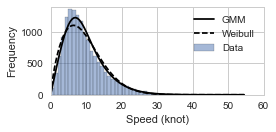

In [70]:
%%time
x = arange(0, max_speed, 0.5)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [71]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlclXXe//HXWdkOOwpuoKC4pMZiuKWmaJqljZmildYv
5zZqZhpLfaiVjSmjNtZMM1bebTNNtmmmc2e5lEtauHIQzQ0VDcUFBEE5IOu5fn8QRxgNWc7FOcDn
+Y+e6zrnOh9Q3ny363w1iqIoCCGEHWkdXYAQovmRYBFC2J0EixDC7iRYhBB2J8EihLA7CRYhhN2p
GiwHDx5kypQpNx3ftm0b48ePJy4ujtWrV6tZghDCAfRqXfi9997jq6++ws3Nrdrx0tJSlixZwpo1
a3Bzc2Py5MkMGzaMgIAAtUoRQjQy1VoswcHBLF++/KbjaWlpBAcH4+3tjdFoJDo6mv3796tVhhDC
AVRrsYwcOZKMjIybjlssFjw9PW2PPTw8sFgst72e2Wy2a31CiNqLjo6u0/NVC5ZfYzKZKCgosD0u
KCioFjQ1qesXpzaz2ex0NUHt6kpOzeLbPWdI3JMELq3QGVw5fWAjP217FxRr7d5Io8Fg9MDNKwAX
Dz/0Rjd0Bhdc3HwwunthdPPC4OKO3uiG3uCGzuCKzuiKTu+CzuCCTmdAo9VVvRyKcvOftymh/q8B
FBrhferymv+qqa7vp0GDQa/FoNcS5O9O2wATs6f0qfmFt1GfX+qNHixhYWGkp6eTl5eHu7s7SUlJ
TJs2rbHLaHGSU7PYsu8sPx1L48ShXWScTOJyegqlxYUEhsVQXJBLXmbaTaHiYvLD0z8Yk29b3L0D
cfNqjbt3K1w9AjC6e6HR3Lo3fdMPxi/Hb/WzoQG0Wg1WRUF3iz/LrcqNH7gqfzb4NdZGep+6vMZ6
69fU+v10Fd9pLw8jALExwbX+P2JPjRYs69evp7CwkLi4OObOncu0adNQFIXx48cTGBjYWGW0OMmp
WXyx5QQnz+WRnXGEHZ/Mvek5mWn70Gj1eLcOwyeoM96tQ/Fq1QnPgA7o9C7VQqLq/+iqIXHbHyqr
gl6vhV+uU1auoNdrcHPRo9dp0Woqnvtrf5aVWSkpswIKRoPOLq8pKi7G1cVF9fepy2tuVVNd389o
0BHWzpvYmGCiurZW9z/Yr1A1WNq3b2+bTh4zZozt+LBhwxg2bJiab93imY9n8sa7X7Jj0yoMbl7o
jW6cO7qzyjM0+LbtRquQCPzb34FPUBd0BpcqZ7mRFtxocVSGg16noaxcwWDQ/tJEr/mHqvIHxhn+
01dyxq6sM9ZUH43eFRLqMh/P5E//WM+u7z4j9+KJaud0Blfadh1EUOe+tO4Uid7o8avX+e8AcXe7
0bKoTzg0lx8YUTsSLM3I6q0nmP3Hpzh75PtqxwOC7yS413ACQ2PQG11u2a3RaDQVg38acHPR42rU
O1XrQjQtEizNwMYdKWzYlc6Wb74g48QeoKJ1EtJ7FJ0i7sPdOxCqzCpoNRp0Wk211ojJzSghIuxG
gqUJMx/PZN7LS9m67m00aCgvK8bg6kl43wl0vPM+9C7uFU/UgF6rRUFBg0aCRKhOgqUJSk7N4l9r
d/PZWy+Qc/4oABqtji794giLftAWKJWzOTqtBq1WQ5dgXybEhkuQNEDltP2lnAKC/D0YLsF8SxIs
TUjl1PHuXYn8+MUCykuLAAgMvYtesdNx9WwFVJ36rRg36dbRTwLFDpJTs1i54ajt8cVsi+1xfb+3
e/fuZcaMGXTu3BlFUcjLy+OZZ55h9OjRt3z+hQsXOH78uNPPqkqwNAFV16Lk52WSsuUdykuL0Bvd
ibxvBkGdY2wDscovf2rR4O6qZ9zQzkyMDXf0l9AsbNl39pbHt+4726DQ7tevH3/7298ASExM5PXX
X6dTp0507979pufu2bOH06dPS7CIhqn8LXkx28Lx3V9wYt86SovyCQy7i4hRf8ToYqp4YrVxFOgq
rRS7u5RTcOvjV259vD5cXV2Ji4tjw4YNfPzxx1y6dImsrCyGDRvGs88+y7vvvktRURGRkZF4enry
5ptvoigKBQUFtkByBhIsTiw5NYvlq1O4mn+dbR/N5GpmGmi09BoeT0ivkWi0FcvWKgOlchwlIlhD
3AMDHVx98xPk78HF7JtvmA3y+/X1QPXh7+/Pt99+y6hRo5gwYQLFxcUMHjyY5557junTp3P69Gli
Y2P55JNPWLZsGYGBgfzv//4vmzZt4umnn7ZrLfUlweKkVm89wbrtp7iWn8+Oj56jIO8iGq2OvuNe
olXHSODmQKlsocid4OoYHhNcbYylkr3vx7lw4QKRkZH89NNP7NmzB5PJRElJyU3PCwwM5M9//jPu
7u5kZmYSFRVl1zoaQoLFCSWnZrFu+ymKiorY/q8/cD3/Mjq9C3c/ugzvgBB0Ws0tA0Woq/J7vHXf
WS5dKSDIz8Pu0/WFhYV88cUXPPzww1y/fp2FCxeSnp7O6tWrURQFrVaL1Vpxo+j8+fP57rvvMJlM
zJkzB2fae1CCxclUdn/yC66za9WLXM+/jN7oxj1PvImbyb9iYFYCxWGiura2+/d8z549TJkyBa1W
S15eHn/4wx/o1KkTM2fOJCUlBaPRSEhICFlZWYSHh7NixQruuOMOxo4dy6OPPoqbmxsBAQFkZWXZ
ta6GkGBxIpUDtdfyr3Ng4xvkXkzFw7ctAyYuws0UgIKCv5crv58YIYHSTPTt25fdu3fbHle9p+qr
r7666fmBgYFs3rwZgPvvv79xiqwHCRYnUdlSuWYpZueql8k+ewi/dt3pO/5PGAxutg/vkVARTYFs
/+EEKlsq+QUlJG9+i+yzh9Boddz14FwMBjcUFAx6LeOGdpZQEU2CtFgc7MaYSgknzd/w88GKZm6f
+5/HzcMHnVaLl4dRWiqiSZFgcaCqLZUr51M5tOUdAMKixxDcYzBooENrE1NG95BQEU2KBIuDVG2p
FFry+HHNAkDBt004PYc+CYCXu1FCRTRJEiwOULWloihWkjf8jdIiC37tujNg/Evo9XppqYgmTQZv
HaDyZjaDXsuJvevIPJNMYKcoBk1ejIubl7RUWphz587x7LPPMnHiRBISEpg+fTonT55k+fLldO/e
nczMTNtzc3JyuOOOO1i7di0ZGRl07dqVd999t9r14uPjb7m1cWOSFksjS07N4sCJLEpLrVy9fIbD
O/+NRqOl+8BJ0lJxsNmzZ/PFF1/Y9ZoTJkxg2bJlv3r++vXrPP300yxatIjIyEjMZjMGg4GFCxcS
ExNDx44d2bhxI0888QQAGzZsoE2bNrbXBwcHs3nzZqZPnw5Abm4u6enpDt+yWFosjcj2eR4KWMtL
2b12CSgKLu7eeLfuJC2VFmj79u3069ePyMhI27HevXvz0UcfATB69Gg2bdpU7flDhw61Pfb19cXf
35+0tDQANm7cyKhRoxqp+l8nLZZGVNkF8vIw8MOOTyjIuwjAgHFz6NQ+QELFwZYtW1Zj60INGRkZ
BAffuInx9ddfR6fTkZWVRZ8+fejZsydubm6cO3cOq9VKUFAQLi4u1a5x//3388033/Dss8+ydetW
nn/+eZKSkhr16/hv0mJpJJVdoHOZFs79nMbxxM8BCL5jKIEde0motFBBQUHV9jifOXMmK1euxNvb
m/LycuBGcKxfv77a/lyVhg8fzrZt28jIyKBVq1a4uro2Wv2/RoKlEVTtAimKwr5vlqMoVgxGN+6L
+yOR4fa/sU00DbGxsezevZuUlBTbsfT0dC5duoRGU/F5OyNHjmTr1q0kJSXRt2/fm67h4eFBp06d
WLZsGQ888ECj1V4T1bpCVquVBQsWkJqaitFoJCEhgZCQENv5r776in/9619otVrGjx/PI488olYp
Dle1C3Rg9zZ

0.0370327022847 0.0372421143762
8.5 3.5
Wall time: 45.2 s


Direction Distribution Comparison


0.95646549377636536

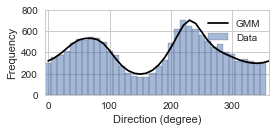

In [72]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 375, 10), density=True)

plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
sector_r_square(density*10, y[:-1])

In [73]:
pd.DataFrame(gofs_mean_set).set_index('year_lim')

k_s  r_square  r_square_dir
year_lim                                      
(2001, 2006)  0.018190  0.995289      0.744067
(1997, 2002)  0.009593  0.996696      0.780569
(1991, 1996)  0.011995  0.997627      0.900331

In [74]:
fig1, ax1 = plt.subplots(figsize=(2.8,2.5))
fig2, ax2 = plt.subplots(figsize=(2.8,2.5))
fig3, ax3 = plt.subplots(figsize=(2.8,2.5))
prop_cycle = iter(mpl.rcParams['axes.color_cycle'])
gofs_mean_set = []

x = bins = arange(0, df['speed'].max() + 1)
_, _, density_speed_expected_gmm, y_cdf_gmm, density_dir_expected = gmm_marginal_distribution(f, x)
_, _, density_expected_weibull, y_cdf_weibull = fit_weibull(df.speed, x, weibull_params)
    
for year_length in [10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    gofs = []
    for sub_start_year in arange(start_year, end_year+1):
        df_previous = df_all_years[str(sub_start_year):str(sub_start_year+year_length-1)]
        
        _, _, density_speed, y_ecdf_previous, density_dir = empirical_marginal_distribution(df_previous, x) 

        r_square_speed = sector_r_square(density_speed, density_speed_expected_gmm)
        r_square_speed_weibull = sector_r_square(density_speed, density_expected_weibull)

        k_s_speed = (np.abs(y_ecdf_previous - y_cdf_gmm)).max()
        k_s_speed_weibull = (np.abs(y_ecdf_previous - y_cdf_weibull)).max()
        
        r_square_dir = sector_r_square(density_dir*10, density_dir_expected[:-1])
        gofs.append({'year': sub_start_year, 
                     'r_square': r_square_speed, 'k_s': k_s_speed, 'r_square_dir': r_square_dir,
                      'r_square_weibulll': r_square_speed_weibull, 'k_s_weibulll': k_s_speed_weibull})

    gofs=pd.DataFrame(gofs).set_index(['year'])  
    year_lim = end_year-year_length-5, end_year-year_length
    gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
    gofs_mean['year_lim']=year_lim
    gofs_mean_set.append(gofs_mean)

    color = next(prop_cycle)
    # GMM agains previous data
    gofs.plot(y='r_square', ax=ax1, label=year_length, color=color)
    gofs.plot(y='k_s', ax=ax2, color=color, label=year_length)
    gofs.plot(y='r_square_dir', ax=ax3, label=year_length, color=color)
    # Empricial agains previous data
    ax1.plot(gofs_univar_set[year_length].r_square, label='', color=color, linestyle='--')
    ax2.plot(gofs_univar_set[year_length].k_s, label='', color=color, linestyle='--')
    ax3.plot(gofs_univar_set[year_length].r_square_dir, label='', color=color, linestyle='--')
    color = next(prop_cycle)
    gofs.plot(y='r_square_weibulll', ax=ax1, label=year_length, color=color)
    gofs.plot(y='k_s_weibulll', ax=ax2, color=color, label=year_length)
    
    plt_configure(ax=ax1, ylabel='$\ R^2$', xlabel='start year', legend=True)
    plt_configure(ax=ax2, ylabel='K-S', xlabel='start year', legend=True)
    plt_configure(ax=ax3, ylabel='$\ R^2$', xlabel='start year', legend=True)

align_figures()
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANkAAAC3CAYAAACfQPtcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXdcVFf6h5+ZgRl6BxUBRRBsKIJRsWs0dhN7wGCMxl2z
0SS2aHazlphN22yK7ppEo5vE/KJRY+yxd2yIggVBugIK0jsMM+f3B5GVCFJkhuJ9PslH5tx7z3kP
zPee9p73yIQQAgkJCZ0hb2gDJCSaO5LIJCR0jCQyCQkdI4lMQkLHSCKTkNAxksgkJHRMg4ksLCyM
wMDAR9KPHTvGxIkTmTp1Klu3bgVAq9WybNkypk6dSmBgIAkJCfo2V0Kizhg0RKHr169n9+7dGBsb
V0hXq9V8+OGHbN++HWNjY/z9/RkyZAiXL1+mpKSEn3/+mdDQUD766CO++uqrhjBdQqLWNEhL5uLi
wpo1ax5Jj4mJwcXFBUtLS5RKJb6+vgQHBxMSEkL//v0B8Pb25vr16/o2WUKizjRISzZ8+HASExMf
Sc/Ly8Pc3Lz8s6mpKXl5eeTl5WFmZlaerlAoKC0txcCgavNDQkLq12gJiRrg6+v7SFqDiKwqzMzM
yM/PL/+cn5+Pubn5I+larfaxAntAZRUOCQmpNL250RzrmZyWR2mpFplMhlwuQyaDyJvhDO7fE4Cc
/BKEECjkMlRKBQYKOTKZrE5lFas1RN/JwtbSiJa2poTdus+735wtv25uoqS7pz3jB7nj7mQFVP1i
b1Qic3NzIyEhgaysLExMTLh06RKzZs1CJpNx/PhxRo0aRWhoKB4eHnq3TQiBRiswUMgp1Wi5GZ+B
0kCOoYECQwM5SkMFFqZKjFUG5BeqOR2aRGZuMZm5RZioDBjh15aWtqZ6t7spIYTgblo+scnZxCXn
EJuUjZmJIQsDyl4WH30fTFxyToVnHG0MGVw2kuDdr4MqXFfIZXRoa8NHr/cD4MstV9AKQbvWlrRz
tMTV0QIzEyUA6lIt16LTuB6bxvWYdKLuZFKqEQQM74D/c564OVvh59WKDm2s6dzOFndnaxTymgm4
UYhsz549FBQUMHXqVJYuXcqsWbMQQjBx4kRatGjBsGHDCAoK4sUXX0QIwQcffFCnch74Qms0Ws5f
vwcykAEymYwStYbW9ma4O1tRUKTm213XyStUk5VbTHpOEZk5RUwZ6sGLwzzJLSjhr2uDHsn/pZEd
mDrUk8LiUv6zPazCtV9PRPOXSd0Y3rttnWyvilKNltz8EqwtjABY+0sYkQmZpGXmodx/CJkM3J2s
+OuMsrf9+xsvkJJRgNKw7AWhNJDjaG/GnAldAQi7dR8DAzkO1ibYWKhQKPQ3bF/2zTlCo+5XSGvn
aFn+c79urenQ1gYhQKsVaLUCTVFW+XVvDwda2Zmi0QhK1BqKSjS0tDUpvx51J5OEe7kcu3SnPO2Z
Ti1YNqs36lINKzecR6sVyGXQzsmKTq42eLnZAmBmbFj+O6wtDSYyJyen8in6sWPHlqcPGTKEIUOG
VLhXLpfz3nvv1akcjVYQEpHC/qA4Orna4mZd1hX46IfgR+59YaAb7s5WyGQyDl+8/XvZMqzNVbRt
ZYGFadlbT2Wo4MVhnqhLNZSUailRa1CXarG3KvuDWpmrWBDgg7W5CitzI+KTs9l1KoYubnYAxCZl
k5JRQM/OLWv8NvwjqRkFbDpwkzOhSbRtZcHn8wcBEJeUTWJKLiaqsi4Vf9hkkZNfwv2sQtTqMtuh
4i3/+SWMu2llXXNDAzk9OrZgSA9nendpVa1NaVmFxN/NwcJUiaWZCktTJUaq/33FSjVaCopKKS7R
kJVXxIXr9wiNus9Hr/fDQCGni5stpiaGeLpY087RkraOFliaqcqfnzL00R7Mw120mWM7P9a+LxcM
Ijktn7jkbGKTsom7m4NLi7I5ABMjQ2Y/34VWdqZ0bGuDiZFhtfWtKbLmutUlJCSE2CxzDpyLJzWz
EIC+XR0Z1kVO127dOXAuHoHg9/8wNJDj1toSzzY25d0WU2NDzEyUdRZCVXzw3UXOXbuLoYEcW0sj
7KyMaWVryhtTuwOQW1CCqZFhmUj+QF6hmm1HbrHnTCzqUi1ODmZ4t7fnz7+3RDn5JZgaGxJ65XK1
YzIhBKUaLRqtwEhZJoaD5xO4m5bH/axC4pKzuZOSx8DuTix6qSyvy5GpONqZEpmQyY24dG7EprNo
mi+ujpYcDb7NF1uuVChDaajg0zf64+poyW9n41j7y9UK11VKBf+cV3a9LjSmsWdVtjSK7qKu+GH/
TVRKBcN7t2FUH1fatbYkJCQEQwM5Y/u3q/I5mUyGo71ZldeflJdGdMDSTEVMYhZpWYVcj0kvfxEA
fLH5CrduZ+LtaY+vpwPeHg5YmZe90Q9fSGDHiWjsrY0JHNmRgd2dKojxQWtbE2QyWdmY8qG04b3b
VLgn4W4OD+YOEu7lsHzduQrXVUoFd9PycXW0xM3JiumjOpKdV0JOfjHZ+SXk5BWXt5SOdmb4ebVC
ZajAWGWAl7sdz3RsUaG1a44069r96QUvhvRwxtS4/pr++sClpQWvT+pW/lldqiW3oKT8s52VEbfu
wImQRE6ElC11/GViV0b2cWVUX1cUChkjerdFaajQua1tWlmU/2ysMmDCIHfuZeTj6VI2AeDmZIXB
7+O2tq0saPvQ/X+km4c93TzsdW5zY6NZi+xxrVVjwtBAjs3vExcAr03sxpwJXYm/m0NIRCpXIlM5
fPE2w3u3RWWoYFx/twax08HahFeqGfdIPEqzFllTRiaT4epoiaujJZOGtG9ocySeAMkLX0JCx0gi
k5DQMZLIJCR0jCQyCQkdI4lMQkLHSCKTkNAxksgkJHSMJDIJCR0jiUxCQsdIIpOQ0DF6F1l14d12
7tzJ2LFjCQgIYNu2bQCUlJSwcOFCpkyZwsyZM4mPj9e32RISdUbvvotHjhypMrxbRkYGq1evZseO
HVhYWDBjxgz8/Pw4ceIEJiYmbN26ldjYWFatWsWGDRv0bbqERJ3Qu8geF94tMTERT09PrKzKApN4
eXkRFhZGdHQ0AwYMAKBdu3bExMTo22wJiTqjd5E9LrxbmzZtiI6OJi0tDVNTU86dO0fbtm3p2LEj
x48fZ+jQoYSFhZGSkoJGo0GhePx+qqqiBz0t4eKkejYO9C6yx4V3s7S05J133mHevHlYWVnRuXNn
rK2tGTRoEDExMQQEBODj40Pnzp2rFRhIIeGkeuqXqsSu94kPHx8fTp06BfBIeLfS0lLCw8P56aef
+PLLL4mNjcXHx4dr167h5+fH5s2bGTFiBM7Ozvo2W0Kizui9JassvNvDIeEAxo8fj0ql4pVXXsHG
xgaAL7/8kq+//hpzc3P+8Y9/6NtsCYk6o3eRVRbezc3tf9vp586dy9y5cytct7Gx4bvvvtOHeRIS
9Y60GC0hoWMkkUlI6BhJZA2AEIK9Z2I5cfnRk20kmh9StCo9I4Rgw+4b7DpVtqAek5jFK2M6Vxot
+GmjVKMlNikbNyereo/a3JBIItMjQgg27ikTmHOLsgX5nSdjSMkoYEGAT3mo7KeVdTuv8dvZeBys
jRnZx5VhPV0qxMJvqkjdRT3xQGA7T5YJ7B+v9eWTuf3xcrPj3LW7vPvVWbJyixvazAYjOjGLA+fi
sTJXkZ1fwvf7wnll1SE+33yZqDuZDW3eE/F0vzr1xMMCc3Iw4x9z+mJtXhYxeOWf/Fiz9QrHQxJZ
tPoUy1/tjXML82pybF4IIVj36zWEgIUBPrg7W3Ms+Db7guI4dukOxy7doW0rCzq62uDpYo2HizWt
7c2aTBdbElktEUIQHpeBk4NZjboyQgj+uze8XGAfvNa3/CwxKAvRPd/fh5a2pmw+FMniNadZ8Wpv
OrS10WU1GhU

k_s  k_s_weibulll  r_square  r_square_dir  \
year_lim                                                       
(1991, 1996)  0.043657      0.043695  0.977909      0.895959   

              r_square_weibulll  
year_lim                         
(1991, 1996)           0.952509

## 6.4 Sectoral Comaprison

In [75]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.915215002242
Wall time: 13.1 s


In [76]:
# Turn to parrallel would run 50% faster
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

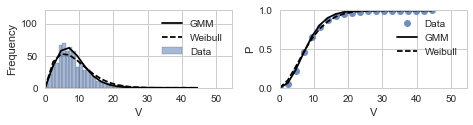

5.0 (-5.0 - 15.0) degree
data size: 649 weight 0.04443987948507258
GMM Weibull
R square 0.964393389322 0.932061299861
max diff: 0.032189914396 0.0580064156225 speed value: 11.7170329432 4.68681317726 y gmm 0.813391763394
 


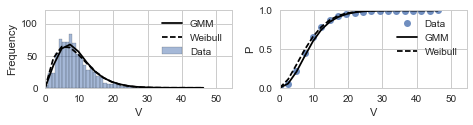

25.0 (15.0 - 35.0) degree
data size: 792 weight 0.054231717337715694
GMM Weibull
R square 0.956701647002 0.939620820551
max diff: 0.0557798424019 0.0842407036859 speed value: 9.74301415569 4.87150707785 y gmm 0.604573692952
 


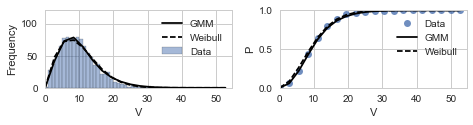

45.0 (35.0 - 55.0) degree
data size: 1020 weight 0.06984387838948233
GMM Weibull
R square 0.98906997693 0.984302389569
max diff: 0.0238545782207 0.0442056315888 speed value: 13.8829294642 5.5531717857 y gmm 0.773204245309
 


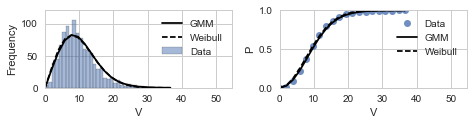

65.0 (55.0 - 75.0) degree
data size: 1065 weight 0.07292522596548891
GMM Weibull
R square 0.953319048412 0.953466975608
max diff: 0.0388763156058 0.0326420988764 speed value: 13.5037362943 3.85821036979 y gmm 0.759245750122
 


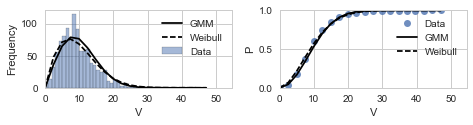

85.0 (75.0 - 95.0) degree
data size: 1038 weight 0.07107641741988496
GMM Weibull
R square 0.926209199366 0.919452896789
max diff: 0.0770647224749 0.0421425093587 speed value: 9.92317608322 4.96158804161 y gmm 0.531798475984
 


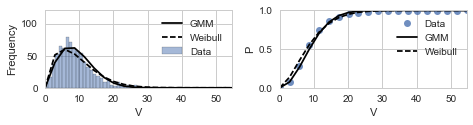

105.0 (95.0 - 115.0) degree
data size: 786 weight 0.05382087099424815
GMM Weibull
R square 0.96278822062 0.942139735302
max diff: 0.0529468291315 0.0683633442829 speed value: 8.62538250276 5.75025500184 y gmm 0.499216020741
 


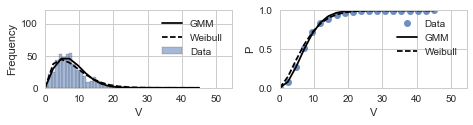

125.0 (115.0 - 135.0) degree
data size: 484 weight 0.033141605039715145
GMM Weibull
R square 0.950162576461 0.928092472286
max diff: 0.0344339498092 0.0885567813167 speed value: 14.2326047561 4.74420158535 y gmm 0.92699593328
 


145.0 (135.0 - 155.0) degree
data size: 347 weight 0.023760613530539577
GMM Weibull
R square 0.899597307993 0.935354909909
max diff: 0.0949523836 0.0392688322181 speed value: 7.39904424962 8.87885309954 y gmm 0.608217645218
 


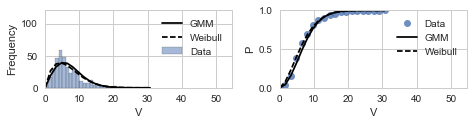

165.0 (155.0 - 175.0) degree
data size: 374 weight 0.025609422076143522
GMM Weibull
R square 0.865636087051 0.887150759159
max diff: 0.0914489382586 0.072151773702 speed value: 6.46635305013 3.23317652507 y gmm 0.486091168693
 


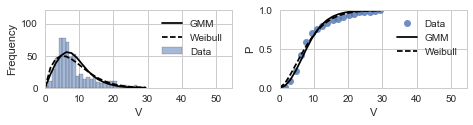

185.0 (175.0 - 195.0) degree
data size: 602 weight 0.04122158312791016
GMM Weibull
R square 0.780837540269 0.764706996972
max diff: 0.0966247924572 0.0825333901373 speed value: 7.74131945467 3.09652778187 y gmm 0.499720722493
 


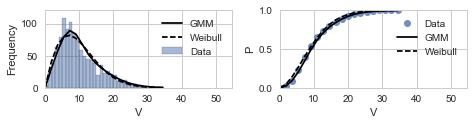

205.0 (195.0 - 215.0) degree
data size: 1112 weight 0.07614352232265133
GMM Weibull
R square 0.943485343124 0.925592066926
max diff: 0.0562563140593 0.0512389924492 speed value: 9.06629748275 3.6265189931 y gmm 0.489606995293
 


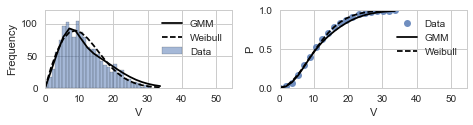

225.0 (215.0 - 235.0) degree
data size: 1357 weight 0.09291974801424267
GMM Weibull
R square 0.950974614759 0.943503225374
max diff: 0.0524432981617 0.0221289931523 speed value: 15.946685673 10.631123782 y gmm 0.731639236842
 


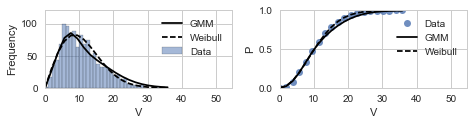

245.0 (235.0 - 255.0) degree
data size: 1179 weight 0.08073130649137222
GMM Weibull
R square 0.947802198593 0.940467372237
max diff: 0.0528262348588 0.0260652738344 speed value: 15.0961647661 9.43510297882 y gmm 0.73852236565
 


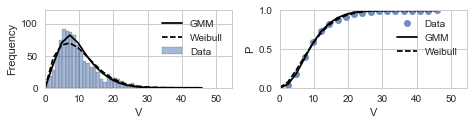

265.0 (255.0 - 275.0) degree
data size: 960 weight 0.0657354149548069
GMM Weibull
R square 0.962786586298 0.919235600897
max diff: 0.0324034272149 0.0495486398799 speed value: 19.3049497557 4.82623743892 y gmm 0.949070093882
 


285.0 (275.0 - 295.0) degree
data size: 878 weight 0.06012051492741714
GMM Weibull
R square 0.948690847352 0.913397928949
max diff: 0.0349370360068 0.0439703844493 speed value: 17.7463153406 8.8731576703 y gmm 0.96204409751
 


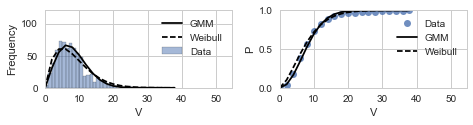

305.0 (295.0 - 315.0) degree
data size: 702 weight 0.04806902218570255
GMM Weibull
R square 0.950349587197 0.930257269569
max diff: 0.0387796134538 0.0918159707451 speed value: 9.97373088457 3.98949235383 y gmm 0.696263121589
 


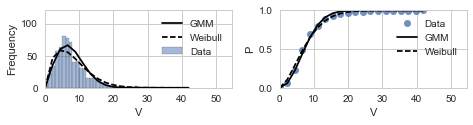

325.0 (315.0 - 335.0) degree
data size: 661 weight 0.04526157217200767
GMM Weibull
R square 0.945758684674 0.908330825582
max diff: 0.0416038121942 0.0619737078721 speed value: 6.62679879627 4.41786586418 y gmm 0.442511165113
 


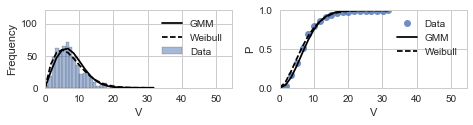

345.0 (335.0 - 355.0) degree
data size: 598 weight 0.04094768556559847
GMM Weibull
R square 0.939329448423 0.942612382962
max diff: 0.069003994312 0.0602196606218 speed value: 8.35648275183 5.0138896511 y gmm 0.621631457193
 
Wall time: 54.4 s


In [77]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [78]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.942212171996389 0.9277805679725324


0.05123064054528323 0.05205387342362237


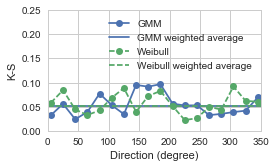

In [79]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

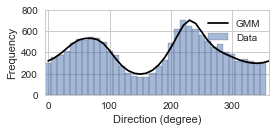

In [80]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.5 Insufficient-fit Sector Investigation

### (1) Data Variability, by Bootstrap (Resampling)

In [81]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [82]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

In [83]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


185.0 (175.0 - 195.0) Degree Speed Distribution
0.120140915145 7.5 0.477865729373


### (2) Time Variability

In [84]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log


185.0 (175.0 - 195.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXmYHFW99ltVvcxMz9KzT2Yy2RMCAhcICMhyVeCKKI88
yhIQhIgi+XBBLyKgLLKJ5LqgFwKKqHC5gCioUYH7AWG5gU/DEkiQhJCNbNPLTE/vS23fH5NTOV1T
1V1VXT1Tkznv8/Aw6Zk+/auqrvPWb3t/nKqqKhgYGBgYGBgqgp9sAxgYGBgYGKYCGGEyMDAwMDBY
ACNMBgYGBgYGC2CEycDAwMDAYAGMMBkYGBgYGCyAESYDAwMDA4MFMMJkYGBgYGCwAEaYDAwMDAwM
FsAIk4GBgYGBwQIYYTIwMDAwMFgAI0wGBgYGBgYLYITJwMDAwMBgAYwwGRgYGBgYLIARJgMDAwMD
gwUwwmRgYGBgYLAARpgMDAwMDBOGnTt34utf/zrOPfdcfOELX8Bll12GzZs34+c//zkOPvhgRCIR
7W+Hh4fxoQ99CE888QR27dqFgw46CL/4xS/K1rv88stx0UUXTYjtjDAZGBgYGCYE+Xwey5cvx7Jl
y/C73/0ODz74IL761a/i5ptvBgDMmTMHTz31lPb3f/vb3zBjxgzt37NmzcIzzzyj/TuRSGDHjh0T
Zr9vwj6JgYGBgcEz+Pa3v43HH3/c1TXPOeccrFixwvT3q1evxnHHHYcjjzxSe+3www/Hgw8+iP/8
z//EGWecgaeffhqXXHKJ9vcf+9jHtL9tb29HOBzGli1bMH/+fDz11FM4/fTT8dprr7l6HGZgHiYD
AwMDw4Rg165dmDVrlvbv5cuX46KLLsLpp5+OoaEhdHV1obGxETt37sSOHTvQ19eHYDBYtsanPvUp
/PWvfwUAPPfcczj11FMnzH7mYTIwMDBMQ6xYsaKiN1gP9PX1YcOGDdq/V65cCQA499xzIcsygP2E
KEkSzjzzTKxZs6ZsjVNPPRWf//zn8dnPfhbd3d1oaGiYMPuZh8nAwMDAMCE45ZRT8Oqrr2LdunXa
azt27MDQ0BA4jgMAfOITn8Bzzz2H1157Dccee+y4NUKhEObOnYsVK1bg05/+9ITZDjDCZGBgYGCY
IIRCIaxcuRK//e1vceGFF2Lp0qW47rrrcO2116K/vx8A0NLSgr6+PhxyyCHgeWOKOvPMM/H666/j
+OOPn0jzwamqqk7oJzIwMDAwMExBMA+TgYGBgYHBAhhhMjAwMDAwWACrkmWYllAUBZIkoVQqQRAE
8DwPQRAgCIJWfMDAwMBAgxEmw7SCoiiIRCJob2/X/q2qKlRVRTabRTqdRn9/P3ieB8dxjEgZGBg0
MMJkmBZQFAWyLENRFOzduxfhcBiKokAURfj9fo0MCYGSnjBSE8dxnEagjEgZGKYnGGEyHNAgoVe6
GFxVVcRiMYyMjIDjOMiyjEAgAJ7nIUkSstksAoEAfD5fGRlaJVKfz6f9m4GB4cABK/phOCAhyzJK
pRJKpZJGbpIkaZMQSqUS5s6di7lz52LevHno6elBMBiEqqpIJBL44IMPsGXLFnzwwQcYGhpCIpFA
NpvVyJcQJbCfSCVJQrFY1EK7mUwGuVwO+XwexWIRsiyDdXExTGdcfPHFePvttwGM3YNLlizB/fff
r/3+oosuwrvvvjvufS+99BIee+wx7Nq1C+eee67lzzvhhBO0dbds2VKj9czDZDjAIMuyFnolpCZJ
EuLxOBKJBFpbW8HzPGbMmAFBELSin8bGRqiqimKxiJkzZ2prFYtFlEolFItFZDIZjYCDwSACgQAC
gYD2czWPtFgsAgB4ntc8UBLWZR4pw3TACSecgNdeew2HH344Xn/9dZx44ol48cUX8aUvfQnFYhG7
d+/G4sWLx73v5JNPBjCmRTuZYITJcEDAiChFUUQ8Hsfo6Cja2towf/58BAIBpNPpspCqGQRBQFNT
E5qamspeJ9W1hEwzmQyKxSI4jisjUPKzPs9JE6koiprHSvKixWJRey8jUoZ6Ys6c8a+dfz7wgx84
+/327ZU/7yMf+QjuuecefPGLX8SLL76Ic845B//xH/+BdDqNd955Bx/+8Iexdu1a/OQnP4EgCBgc
HMTNN9+MVatWYevWrVi6dClGRkZw+eWXY3h4GB/96EdxxRVX4JprrsEZZ5yBk08+GS+99BL+9re/
4Y477rB3MiyAESbDlIYRUZZKJcTjcSSTSYTDYSxYsAB+v7/qWhzHWQqZ+nw++Hy+MiIlJEhItFAo
IJVKoVQqgeM4jURpMiVESod2JUnC0NAQWltbEQqFNC9UX2zEiJRhKuKQQw7B1q1boaoq1q5di299
61s4/vjj8corr2DTpk048cQTcf311+O///u/0dnZiZ/+9Kd48skn4fPtp6pcLocVK1agqakJn//8
53HKKadMmP2MMBmmHFRVLat6pYkyFoshlUqhvb0dCxcuLLvRCKwSox1wHKcRaSgUKrOV5DZLpRLy
+TxGR0e1UDBNouT/ZD2io6koChRF0dajf68vNqIJmIGhGqp5hLX+Xg+e57F48WK89NJL6O7uRiAQ
wMknn4wXXngBGzduxOc//3lcf/31uPLKKwEAhUIBH/nIRzB79mxtjcWLF6OlpQUAcNhhh2Hbtm1l
n1HPOgFGmAxTBmZEWSwWEYvFkE6n0dHRYUqUBGaEWS8i9fv94zxcVVUhiqJWmJTL5TQiBcbCvvl8
vswj1XuVVoiUzpEyMHgBJ5xwAu677z586lOfAgAsWbIE99xzD4CxAdF9fX2455570NLSgueeew5N
TU3Yu3ev9v4tW7Ygm80iGAzi7bffxnnnnYdXX30VsVgMAPDPf/6zbrYzwmTwPAhRjoyMYHR0FLNm
zdKIMhqNIpPJWCJKPSbTEyP5TuJREqiqil27dqGhoQE8z2uFRqIowufzGYZ29V4lTaSEgI2IVF+k
xMAwEfjIRz6C733ve7jzzjsBAIFAAC0tLTj44IPB8zy++93v4rLLLoOqqgiFQrjzzjvLCLOtrQ3f
/OY3MTIygjPOOAMLFizAOeecg+uuuw6rVq3CHKPEq0tg00oYPAuSFyTtGJlMBsPDw+jr60MsFkMm
k0FnZyc6OzshCILldTdv3ozBwUE0NDRohAIAxWIRe/furesNZwW7d+9GW1sbmpubtddUVdW8Ubpy
V5Ik+P3+caFdWozBCGYeqc/nY2IMDAwmYB4mg+egJ0o6R5nP57F9+3Z0dnaiv7/fFlES1CP0Wm+Q
wqFgMKjlbwBoakWEREmhESFSvUdKiNSKR0oEHEKhEFM1YmAAI0wGD8GMKHO5HGKxGHK5HHiex8KF
C2vOyU1UDrPe4HleI1IaiqKUeaMkP0pUjfStL0YFQ+l0Go2NjWVhbhLOZfKADNMRjDAZJh2ViDIa
jaJQKKC7uxudnZ2IRCI1k+V02Nx5nkdDQwMaGhrKXqcVkIrFInK5HIrFIhRFGeeNkl5R/fnSywOS
z2M6uwwHOhhhMkwazIgym80iGo2iVCqhu7sbs2bNAs/zyOfzrniAE1kl6xT1soOoGjU2Npa9ToiU
FmMoFArI5XJIJpPjyLSSGAMTrGc4UMEIk2HCYUSUAJDJZBCNRiFJErq7uxEOh8s2VrcIjV7HSyQ5
mTAi0r1796KxsRGBQMBU1UhfbMSIlOFABiNMhgkDLVIO7A/1pdNpRKNRyLKMnp4etLW1mW6c9SQ3
Rp7lUFXVUB7QqqqRXY8UGB/aZZNfGLwERpgMdYcsy0gkElqbBCGmVCqFWCwGRVHQ09OD1tbWihtj
PTxML8Lr5FBN1YiEdguFApLJZEVVIz0ZGgnWK4qCaDSKmTNnMsF6hkkFI0yGuoGo8siyjB07duBD
H/oQACCZTGq

### (3) Adjacent Sector Variability

In [85]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [86]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


185.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuYHFWdPv5WVd9muuc+0zOZWzKTCyFiFAOECJsVBCMI
6+/xkayiEd0Vla+rgrsisgussooSZMPP/XmDRZaAYlhwQU1w1yCEjXwRREDuYXKdyUx3T9+m73X9
/TE5leqa6mtVV/f0nPd5eJj0zKlzqqvqvPW5vR9GURQFFBQUFBQUFEXB1nsBFBQUFBQUiwGUMCko
KCgoKMoAJUwKCgoKCooyQAmTgoKCgoKiDFDCpKCgoKCgKAOUMCkoKCgoKMoAJUwKCgoKCooyQAmT
goKCgoKiDFDCpKCgoKCgKAOUMCkoKCgoKMoAJUwKCgoKCooyQAmTgoKCgoKiDFDCpKCgoKCgKAOU
MCkoKCgoKMoAJUwKCgoKCooyQAmTgoKCgsI2HDt2DF/84hexdetWfOITn8BnPvMZHDhwAN/73vdw
6qmnIhAIqH8bDofxtre9DQ8//DAmJydxyimn4Mc//nHe8T73uc9h27ZttqydEiYFBQUFhS3IZDK4
6qqr8KlPfQq7du3Cvffei7/7u7/DN77xDQDAihUrsGfPHvXvd+/ejWXLlqn/Hh0dxW9+8xv139Fo
FEeOHLFt/Q7bZqKgoKCgaBh85StfwYMPPmjpMS+77DJs37694O9/97vf4eyzz8bpp5+ufrZ+/Xrc
e++9+Ld/+zdcfPHFeOyxx/DJT35S/fvzzjtP/duuri50dnZiYmICK1euxJ49e/D+978fzz33nKXn
UQjUwqSgoKCgsAWTk5MYHR1V/33VVVdh27ZteP/734+ZmRn09vaipaUFx44dw5EjRzAwMAC32513
jA984AP49a9/DQDYu3cvLrjgAtvWTy1MCgoKiiWI7du3F7UGa4GBgQG8/PLL6r9/8IMfAAC2bt0K
SZIAnCREURRx6aWXYv/+/XnHuOCCC/Cxj30MH/rQh9DX1wePx2Pb+qmFSUFBQUFhC9773vfi6aef
xgsvvKB+duTIEczMzIBhGADAli1bsHfvXjz33HPYuHHjgmN4vV6MjY1h+/btuOSSS2xbO0AJk4KC
goLCJni9XvzgBz/Af/zHf+DjH/84PvKRj+D666/H1772NQwODgIA2traMDAwgHXr1oFljSnq0ksv
xR//+Eds2rTJzuWDURRFsXVGCgoKCgqKRQhqYVJQUFBQUJQBSpgUFBQUFBRlgGbJUixJyLIMURTB
8zw4jgPLsuA4DhzHqckHFBQUFFpQwqRYUpBlGYFAAF1dXeq/FUWBoihIpVJIJBIYHBwEy7JgGIYS
KQUFhQpKmBRLArIsQ5IkyLKM6elpdHZ2QpZlCIIAp9OpkiEhUFITRnLiGIZRCZQSKQXF0gQlTIqm
BnG9apPBFUVBKBRCJBIBwzCQJAkulwssy0IURaRSKbhcLjgcjjwyLJdIHQ6H+m8KCormAU36oWhK
SJIEnufB87xKbqIoqp0QeJ7H2NgYxsbGMD4+Dr/fD7fbDUVREI1GcfToUUxMTODo0aOYmZlBNBpF
KpVSyZcQJXCSSEVRRC6XU127yWQS6XQamUwGuVwOkiSBVnFRLGVcccUVeOmllwDMP4MbNmzAXXfd
pf5+27ZteO211xaM27dvH37+859jcnISW7duLXu+c845Rz3uxMSEydVTC5OiySBJkup6JaQmiiJm
Z2cRjUbR3t4OlmWxbNkycBynJv20tLRAURTkcjkMDw+rx8rlcuB5HrlcDslkUiVgt9sNl8sFl8ul
/lzKIs3lchBFEdFoFMuWLQPDMKpbl1qkFEsB55xzDp577jmsX78ef/zjH3HuuefiySefxKc//Wnk
cjlMTU1h7dq1C8Zt3rwZwLwWbT1BCZOiKWBElIIgYHZ2FrFYDB0dHVi5ciVcLhcSiUSeS7UQOI5D
a2srWltb8z4n2bWETJPJJHK5HBiGySNQ8rM2zkmSiwiRCoKgWqwkLqr9mRIpRS2xYsXCzz76UeCW
W6r7/eHDxed797vfje9///v4m7/5Gzz55JO47LLLcNtttyGRSOCVV17BWWedhWeffRb/+q//Co7j
MDIygm984xv45S9/iYMHD+IjH/kIIpEIPve5zyEcDuM973kPPv/5z+O6667DxRdfjM2bN2Pfvn3Y
vXs3vv3tb1f2ZZQBSpgUixpGRMnzPGZnZxGPx9HZ2YlVq1bB6XSWPBbDMGW5TB0OBxwORx6REmuS
kGg2m8Xc3Bx4ngfDMCqJchynJiARctSSqSiK6s+ESLXESYmUYjFj3bp1OHjwIBRFwbPPPosvf/nL
2LRpE37/+9/jjTfewLnnnosbbrgBP/3pT9HT04MdO3bgF7/4BRyOk1SVTqexfft2tLa24mMf+xje
+9732rZ+SpgUiw6EcBRFWUCUoVAIc3Nz6OrqwurVq/MeNIJyibESMAyjEqnX61U/JyRIiDSTyUCW
ZRw8eBAcx+VZpOT/hAy1mbuyLKvHI/OxLLsg2Ug7joKiFEpZhGZ/rwfLsli7di327duHvr4+uFwu
bN68GU888QRef/11fOxjH8MNN9yAq6++GgCQzWbx7ne/G8uXL1ePsXbtWrS1tQEA3v72t+PQoUN5
c9QyT4ASJsWiASHITCaDgwcP4pRTTgHDMMjlcgiFQkgkEuju7i5IlASFCLNWROp0OlULl+d5TE1N
YcWKFRAEQU1MSqfTiMVi4HkeDodjQXxUS6QExYg0lUqhpaUFHo9HtUgpKBoB55xzDn70ox/hAx/4
AABgw4YN+P73vw9gvkH0wMAAvv/976OtrQ179+5Fa2srpqen1fETExNIpVJwu9146aWX8Nd//dd4
+umnEQqFAACvvvpqzdZOCZOi4UGIUlseQpJogsEgkslkWUSpRz0sMULKJN7pcrnyfq8oCgRByIuP
8jwPQRDgcDgWWKMul2uBVSnLMsLhMLq6ugpapBzHLUhSoqCwA+9+97vxT//0T7j11lsBAC6XC21t
bTj11FPBsiz+8R//EZ/5zGegKAq8Xi9uvfXWPMLs6OjANddcg0gkgosvvhirVq3CZZddhuuvvx6/
/OUvscIo8GoRaLcSioYFiQsS9yvZ3FOpFA4fPgyWZdHT04Oenh5wHFf2cQ8cOICRkRF4PB7wPK9+
nsvlMD09XdMHThAEHDt2DOPj4xWNUxRFtUa1mbuiKMLpdC5w7QYCAXR3d+e5h/XHAxYSqcPhoGIM
FBQFQC1MioaDEVEyDINMJoNQKIRUKgUAWLNmTUVESVAL12utQRKH3G63Gr8BoKoVERIliUaCICAQ
CKClpSWPTImqUSHXLnmB0BIpVTWioJgHJUyKhkEhokyn0wiFQshkMujt7cXg4CDeeOONqshSO5ce
i5FIWZZViVSLY8eOwefzgWVZ8DyvxkeJqpG+9MUoYYgQqfY7Ie5c8rfEtUyJlGIpgBImRd1RjCiD
wSCy2Sz6+vowMjIClmXVkotqUe/N3S5SdrlcC1yyWgWkXC6HdDqNXC4HWZYN46NGcU5SQypJEiYm
JrB69eoFGbvUIqVoRlDCpKgbChFlKpVCMBgEz/Po6+vD6OioYZanNq5ZCezMkjWawy4YzUVUjVpa
WvI+J0SqTzZSFMWw9EVvZVLBeoqlAEqYFLZDURTEYjEAQEtLi7p5JpNJBINBiKKIvr4+dHZ2Gm6s
2k3aLGEuRjdsLVCISIupGjmdTvVaGqkaAeUL1lMipVgMoIRJYRu0IuXxeBwOhwMtLS1IJBIIBoOQ
JAl+vx8dHR0lN85a1UxS8sxHMVWjTCaDmZmZgqpGRhap/hjkZwIjMQaqakTRKKCESVFzEGUeskES
CyObzeLgwYO

# 7. Result Variability & Cross-Validation

In [87]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

1.9 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.505  -0.888  -1.863  8.504  9.951   0.495
2  0.263  -1.364  -4.234  5.631  4.003  -0.015
3  0.232   2.076   5.256  4.568  4.729  -0.174

GMM Plot Result
0.504678650854 [[-0.88791021 -1.86263659]] [  6.46038622  11.38456016] 143.844705448
0.263029780286 [[-1.36410707 -4.23434685]] [ 4.00161555  5.63192491] -91.241053125
0.23229156886 [[ 2.07570882  5.25630231]] [ 4.21714609  5.04432388] -140.614305627


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.008      0.037  2.843849e-09      0.018       0.101

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.012      0.038  3.590766e-09      0.020       0.114

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.502  -1.465  -2.746  8.490  8.685   0.521
2  0.415   2.076   2.188  4.706  7.720  -0.101
3  0.083  -4.572  -4.117  3.305  3.084  -0.160

GMM Plot Result
0.501915098252 [[-1.46542816 -2.74647858]] [  5.94386261  10.59107658] 136.247965601
0.415457050712 [[ 2.0757034   2.18833669]] [ 4.66844228  7.74300231] -174.480237738
0.0826278510361 [[-4.57150655 -4.11664992]] [ 2.90555888  3.46248588] -123.24853695


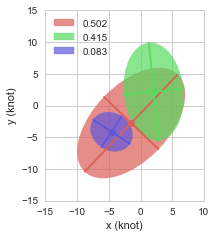

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.009      0.043  3.084208e-09      0.018       0.105

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.010      0.041  3.539757e-09      0.020       0.113

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.510  -1.157  -2.631  8.491  8.592   0.527
2  0.427   1.426   1.934  4.715  7.772  -0.043
3  0.063  -5.263  -3.676  2.835  3.317  -0.056

GMM Plot Result
0.510247212272 [[-1.15716024 -2.63051404]] [  5.87268213  10.55577798] 135.644512886
0.426558093571 [[ 1.4261282   1.93393724]] [ 4.70848618  7.77581775] -177.62739474
0.0631946941568 [[-5.26319744 -3.6761941 ]] [ 2.81871495  3.33048469] -170.173837262


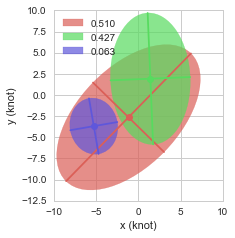

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.010      0.069  3.705696e-09      0.021       0.116

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.013      0.059  3.791704e-09      0.021       0.117

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.565   1.630   3.389  5.651  6.411   0.119
2  0.312  -3.345  -7.816  8.320  6.136   0.304
3  0.123  -2.837  -4.015  5.222  3.077  -0.060

GMM Plot Result
0.564520957188 [[ 1.63009833  3.38941169]] [ 5.49805412  6.5427699 ] 158.391588176
0.312395012307 [[-3.34515434 -7.81633176]] [ 5.59432042  8.6927724 ] -67.7439649655
0.123084030504 [[-2.83672891 -4.01517737]] [ 3.0684213   5.22731387] -93.1141333673


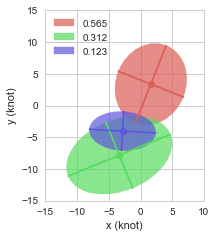

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.022      0.037  3.296320e-09      0.019       0.109

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.024      0.038  3.778294e-09      0.021       0.117

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.535  -0.909  -1.962  8.518  8.935   0.550
2  0.380   1.763   2.044  4.617  7.660  -0.141
3  0.086  -4.628  -4.172  3.400  3.207  -0.073

GMM Plot Result
0.534613410235 [[-0.90889568 -1.96220866]] [  5.84307052  10.87365694] 137.482117363
0.379718946421 [[ 1.76283214  2.04370138]] [ 4.54546204  7.70288228] -172.531835236
0.0856676433438 [[-4.62803207 -4.17211014]] [ 3.14756019  3.45560355] -115.619123989


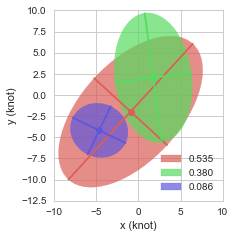

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.008      0.050  3.018742e-09      0.018       0.104

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.007      0.053  3.544822e-09      0.020       0.113

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.532  -0.685  -2.959  8.396  8.849   0.476
2  0.301   1.811   4.709  4.864  5.644  -0.061
3  0.167  -2.088  -4.490  5.177  3.589  -0.207

GMM Plot Result
0.531953655109 [[-0.68514717 -2.95947583]] [  6.23244106  10.48576268] 138.158355258
0.301237008989 [[ 1.81111359  4.7086058 ]] [ 4.82929004  5.67391287] -168.81878292
0.166809335902 [[-2.08797309 -4.48973227]] [ 3.448231    5.27169327] -104.472189421


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.011      0.043  2.992938e-09      0.018       0.104

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.013      0.038  3.523761e-09      0.020       0.113

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.466   1.987   1.849  4.834  7.656  -0.029
2  0.451  -1.824  -3.006  8.638  8.957   0.539
3  0.082  -4.456  -4.112  3.192  3.513  -0.185

GMM Plot Result
0.466477695914 [[ 1.98688362  1.84903659]] [ 4.83081154  7.65805764] -178.286947642
0.451491991727 [[-1.82420192 -3.00559506]] [  5.96613435  10.91978434] 136.926483909
0.0820303123592 [[-4.45622725 -4.11198842]] [ 2.98755679  3.68796571] -148.692500449


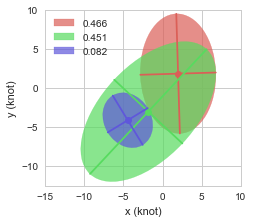

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.011      0.056  3.080266e-09      0.018       0.105

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.009      0.048  3.551817e-09      0.020       0.113

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.493   1.614   1.932  4.830  7.814  -0.016
2  0.440  -1.796  -3.222  8.836  8.763   0.521
3  0.067  -5.145  -3.850  3.064  3.381  -0.013

GMM Plot Result
0.493396803836 [[ 1.61413137  1.93154722]] [ 4.82921312  7.8149728 ] -179.056396472
0.439632417335 [[-1.79555232 -3.22242429]] [  6.08732291  10.85391249] -45.4581737223
0.0669707788293 [[-5.14483879 -3.85033688]] [ 3.06270931  3.38215314] -176.325338178


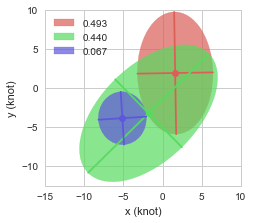

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.009      0.041  4.057969e-09      0.022       0.121

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.009      0.041  3.977507e-09      0.021       0.120

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.478  -0.936  -3.046  8.671  8.998   0.514
2  0.318   1.852   4.680  4.750  5.634  -0.075
3  0.204  -1.899  -4.460  5.276  3.867  -0.208

GMM Plot Result
0.478041743499 [[-0.93593882 -3.04617374]] [  6.15431177  10.87607767] 137.06124425
0.31776986099 [[ 1.8522639  4.6796031]] [ 4.70552866  5.67089675] -168.192193371
0.204188395511 [[-1.89867235 -4.46035747]] [ 3.69869486  5.39554464] -106.699513265


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.014      0.050  3.236276e-09      0.019       0.108

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.013      0.050  3.662645e-09      0.020       0.115

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.488  -1.598  -2.603  8.322  8.817   0.521
2  0.402   1.970   2.173  4.876  7.578  -0.109
3  0.109  -4.357  -4.349  3.928  3.491  -0.113

GMM Plot Result
0.488259578752 [[-1.59794429 -2.60339798]] [  5.91804659  10.58126245] 138.165261492
0.402247997691 [[ 1.96957099  2.17324933]] [ 4.8268469  7.6092069] -173.254775055
0.109492423557 [[-4.35702688 -4.34882947]] [ 3.40030449  4.00670853] -111.864109945


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.008      0.019  3.770041e-09      0.020       0.116

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.020      0.039  4.094256e-09      0.021       0.121

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.444  -1.151  -4.491  8.804  8.520   0.453
2  0.382   1.637   4.519  5.022  5.998   0.054
3  0.174  -2.570  -4.363  5.313  3.566  -0.092

GMM Plot Result
0.443963062468 [[-1.15071058 -4.4913272 ]] [  6.40208351  10.44546378] -47.0717982977
0.382476818342 [[ 1.63673035  4.51859755]] [ 4.99786956  6.01804673] 171.50728781
0.17356011919 [[-2.57017987 -4.36268154]] [ 3.53882461  5.33163648] -96.3321704777


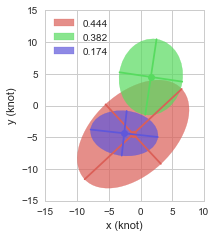

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.995  0.013      0.026  3.040502e-09      0.018       0.105

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.014      0.028  3.365367e-09      0.019       0.110

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.571  -0.789  -1.378  8.011  9.140   0.500
2  0.217   2.226   5.211  4.577  5.171  -0.271
3  0.212  -0.806  -4.400  5.551  4.010  -0.155

GMM Plot Result
0.571436720093 [[-0.78929141 -1.3779898 ]] [  6.00094186  10.56953198] 142.410801459
0.216987252608 [[ 2.22609844  5.21114926]] [ 4.10092005  5.5563853 ] -147.175523701
0.211576027299 [[-0.80612492 -4.40042552]] [ 3.91287559  5.61989329] -102.587300615


R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.994  0.012      0.093  3.127302e-09      0.019       0.106

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.993  0.011      0.080  3.944825e-09      0.021       0.119


Wall time: 34 s


In [88]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(12))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [89]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of train/test dataset 10953.0 3651.0
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.066765  0.022791  1.509617e-08    0.040530     0.232658  0.973156
1    0.052900  0.019082  1.575871e-08    0.041437     0.237901  0.971879
2    0.047652  0.020504  1.661174e-08    0.042969     0.244593  0.970138
3    0.062337  0.019888  1.548375e-08    0.042825     0.236008  0.971882

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.057236  0.029287  1.449560e-08    0.040983     0.229042  0.973369
1    0.069806  0.022152  1.947360e-08    0.048230     0.264827  0.964646
2    0.118970  0.020264  1.682165e-08    0.042971     0.245116  0.970097
3    0.056842  0.036563  2.527711e-08    0.048757     0.300982  0.956618

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.061211  0.021819  6.463439e-09    0.026759     0.152466  0.988374
1    0.165391  0.026374  6.684182e-09    0.027502     0.154932  0.988160
2    0.116356  0.028216  7.364110e-09    0.028499     0.162755  0.986695
3    0.043552  0.022225  6.628182e-09    0.027471     0.154281  0.988066

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.052359  0.024397  1.003944e-08    0.034022     0.189748  0.982168
1    0.111208  0.027146  1.015046e-08    0.033210     0.191223  0.981108
2    0.135970  0.028550  9.114434e-09    0.030876     0.180755  0.984049
3    0.132243  0.020289  1.031823e-08    0.032756     0.192798  0.981749

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036352  0.010676  3.122505e-09    0.018692     0.105991  0.994388
1    0.039834  0.016909  3.448054e-09    0.019952     0.111270  0.993817
2    0.030233  0.016937  3.123742e-09    0.018259     0.105958  0.994410
3    0.041634  0.008460  2.890694e-09    0.017940     0.101916  0.994805

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.071970  0.009630  5.650112e-09    0.025195     0.142273  0.989935
1    0.053546  0.022677  5.655704e-09    0.023544     0.142763  0.989862
2    0.068422  0.021466  8.515996e-09    0.031734     0.174935  0.984686
3    0.072484  0.015537  6.611966e-09    0.026803     0.154200  0.988222

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.017306  0.005021  1.194104e-09    0.011426     0.065484  0.997855
1    0.012875  0.004480  1.031060e-09    0.010767     0.060877  0.998133
2    0.013454  0.004117  1.026038e-09    0.010838     0.060695  0.998173
3    0.035770  0.019520  1.515378e-09    0.012998     0.073859  0.997286

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.015432  0.006459  2.843060e-09    0.018170     0.101201  0.994926
1    0.032535  0.010381  4.228562e-09    0.021171     0.123255  0.992626
2    0.041468  0.009147  3.765530e-09    0.019792     0.116505  0.993104
3    0.035497  0.021537  2.709016e-09    0.017541     0.098428  0.995115

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.004855  0.008896  4.305455e-10    0.007110     0.039337  0.999220
1    0.005978  0.011267  6.473840e-10    0.008396     0.048268  0.998838
2    0.005551  0.007399  4.544664e-10    0.006978     0.040435  0.999193
3    0.006601  0.008136  4.421451e-10    0.007089     0.039815  0.999207

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.015137  0.020369  5.228093e-09    0.022618     0.137068  0.990925
1    0.013725  0.025876  4.768695e-09    0.024035     0.130650  0.991502
2    0.015514  0.028812  4.823857e-09    0.023945     0.131465  0.991106
3    0.015322  0.014379  3.708098e-09    0.019596     0.115862  0.993368

Wall time: 1min 24s


In [90]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.057414  0.020566  1.573759e-08    0.041940     0.237790  0.971764
2    0.096627  0.024658  6.784978e-09    0.027558     0.156108  0.987824
3    0.037013  0.013246  3.146249e-09    0.018711     0.106284  0.994355
4    0.019851  0.008285  1.191645e-09    0.011507     0.065229  0.997862
5    0.005746  0.008925  4.936353e-10    0.007393     0.041964  0.999114

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.075713  0.027066  1.901699e-08    0.045235     0.259992  0.966183
2    0.107945  0.025095  9.905643e-09    0.032716     0.188631  0.982269
3    0.066605  0.017327  6.608445e-09    0.026819     0.153543  0.988176
4    0.031233  0.011881  3.386542e-09    0.019169     0.109847  0.993943
5    0.014924  0.022359  4.632186e-09    0.022549     0.128761  0.991725

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


K_S


Chi_square


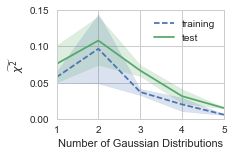

In [91]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [92]:
# for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
#     display(fig)
# for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
#             fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
#     display(fig)

In [93]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

65N17W
